# **Credit Risk Prediction**

# Author: Francesco Theodore Budiman

# **Business Understanding**


**Context**

Home Credit saat ini sedang menggunakan berbagai macam metode statistik dan Machine Learning untuk membuat prediksi skor kredit. Sekarang, kami meminta anda untuk membuka potensi maksimal dari data kami. Dengan melakukannya, kita dapat memastikan pelanggan yang mampu melakukan pelunasan tidak ditolak ketika melakukan pengajuan pinjaman, dan pinjaman dapat diberikan dengan principal, maturity, dan repayment calendar yang akan memotivsi pelanggan untuk sukses. Evaluasi akan dilakukan dengan mengecek seberapa dalam pemahaman analisa yang anda kerjakan.

**Problem Statement**

Home Credit saat ini menghadapi tantangan tingginya kredit macet, dengan tingkat NPL mencapai 8.1% yang berdampak pada kerugian finansial sekitar 13.8 miliar rupiah. Kondisi ini menuntut adanya pendekatan yang lebih tepat dalam mengelola risiko, terutama untuk mengurangi potensi gagal bayar tanpa menghambat kesempatan bagi calon debitur yang sebenarnya layak menerima kredit. Melalui analisis ini, fokus kami adalah membantu perusahaan mencapai keseimbangan tersebut dengan mengidentifikasi pola risiko secara akurat sehingga keputusan kredit dapat dilakukan dengan lebih cepat, tepat, dan berorientasi pada kesehatan portofolio jangka panjang.

**Goals**

Tujuan dari analisis ini adalah untuk mengidentifikasi karakteristik debitur yang memiliki risiko tinggi maupun berpotensi baik, sehingga pola-pola penting dalam perilaku pembayaran dapat dipahami secara lebih mendalam. Dengan model prediksi yang dibangun, kami berupaya mengestimasi probabilitas gagal bayar secara akurat, agar hasilnya dapat digunakan sebagai dasar pengambilan keputusan kredit yang lebih cepat, tepat, dan terukur. Pada akhirnya, penerapan model ini diharapkan mampu mendukung proses manajemen risiko kredit secara keseluruhan, termasuk membantu menurunkan tingkat Non-Performing Loan (NPL) dari 8.1% menjadi sekitar 5% dalam satu tahun ke depan.

# Library

In [ ]:
# 1. Data Manipulation & Utilities

import pandas as pd
import numpy as np
from scipy import stats

# 2. Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

# 3. Data Preprocessing & Feature Engineering

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
# from sklearn.base import BaseEstimator, TransformerMixin  # (optional for custom transformer)

# 4. Feature Selection

from sklearn.feature_selection import SelectKBest, chi2

# 5. Machine Learning Models

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier # Added MLPClassifier
from xgboost import XGBClassifier

# 6. Model Evaluation & Metrics

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    roc_auc_score,
    roc_curve
)
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import ConfusionMatrixDisplay

# 7. Handling Imbalanced Data

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# 8. Utility & Configuration

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Pandas display settings
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 130)
pd.set_option("display.max_colwidth", 200)

# (Optional) Model Saving

import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Rakamin - Data Scientist Home Credit/Final Project Data Scientist/application_train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Rakamin - Data Scientist Home Credit/Final Project Data Scientist/application_test.csv")
bureau = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Rakamin - Data Scientist Home Credit/Final Project Data Scientist/bureau.csv")
previous_application = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Rakamin - Data Scientist Home Credit/Final Project Data Scientist/previous_application.csv")

In [ ]:
train

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

In [ ]:
bureau

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0            215354       5714462        Closed      currency 1         -497   
1            215354       5714463        Active      currency 1         -208   
2            215354       5714464        Active      currency 1         -203   
3            215354       5714465        Active      currency 1         -203   
4            215354       5714466        Active      currency 1         -629   
...             ...           ...           ...             ...          ...   
1716423      259355       5057750        Active      currency 1          -44   
1716424      100044       5057754        Closed      currency 1        -2648   
1716425      100044       5057762        Closed      currency 1        -1809   
1716426      246829       5057770        Closed      currency 1        -1878   
1716427      246829       5057778        Closed      currency 1         -463   

         CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                         0               -153.0             -153.0   
1                         0               1075.0                NaN   
2                         0                528.0                NaN   
3                         0                  NaN                NaN   
4                         0               1197.0                NaN   
...                     ...                  ...                ...   
1716423                   0                -30.0                NaN   
1716424                   0              -2433.0            -2493.0   
1716425                   0              -1628.0             -970.0   
1716426                   0              -1513.0            -1513.0   
1716427                   0                  NaN             -387.0   

         AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                           NaN                   0        91323.00   
1                           NaN                   0       225000.00   
2                           NaN                   0       464323.50   
3                           NaN                   0        90000.00   
4                       77674.5                   0      2700000.00   
...                         ...                 ...             ...   
1716423                     0.0                   0        11250.00   
1716424                  5476.5                   0        38130.84   
1716425                     NaN                   0        15570.00   
1716426                     NaN                   0        36000.00   
1716427                     NaN                   0        22500.00   

         AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                        0.0                   NaN                     0.0   
1                   171342.0                   NaN                     0.0   
2                        NaN                   NaN                     0.0   
3                        NaN                   NaN                     0.0   
4                        NaN                   NaN                     0.0   
...                      ...                   ...                     ...   
1716423              11250.0                   0.0                     0.0   
1716424                  0.0                   0.0                     0.0   
1716425                  NaN                   NaN                     0.0   
1716426                  0.0                   0.0                     0.0   
1716427                  0.0                   NaN                     0.0   

             CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0        Consumer credit                -131          NaN  
1            Credit card                 -20          NaN  
2        Consumer credit                 -16          NaN  
3            Credit card                 -16          NaN  
4        Consumer credit                 -21          NaN  
...                  ...                 ... 

In [ ]:
bureau.isnull().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [ ]:
previous_application

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0                17145.0     17145.0               0.0          17145.0   
1               607500.0    679671.0               NaN         607500.0   
2               112500.0    136444.5               NaN         112500.0   
3               450000.0    470790.0               NaN         450000.0   
4               337500.0    404055.0               NaN         337500.0   
...                  ...         ...               ...              ...   
1670209         267295.5    311400.0               0.0         267295.5   
1670210          87750.0     64291.5           29250.0          87750.0   
1670211         105237.0    102523.5           10525.5         105237.0   
1670212         180000.0    191880.0               NaN         180000.0   
1670213         360000.0    360000.0               NaN         360000.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                         SATURDAY                       15   
1                         THURSDAY                       11   
2                          TUESDAY                       11   
3                           MONDAY                        7   
4                         THURSDAY                        9   
...                            ...                      ...   
1670209                  WEDNESDAY                       12   
1670210                    TUESDAY                       15   
1670211                     MONDAY                       12   
1670212                  WEDNESDAY                        9   
1670213                     SUNDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
0                                 Y                       1   
1                                 Y                       1   
2                                 Y                       1   
3                                 Y                       1   
4                                 Y                       1   
...                             ...                     ...   
1670209                           Y                       1   
1670210                           Y                       1   
1670211                           Y                       1   
1670212                           Y                       1   
1670213                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
0                 0.000000               0.182832                  0.867336   
1                      NaN                    NaN                       NaN   
2                      NaN                    NaN                       NaN   
3                      NaN                    NaN                       NaN   
4                      NaN                    NaN                       NaN   
...                    ...                    ...                       ...   
1670209           0.000000                    NaN                       NaN   
1670210           0.340554                    NaN                       NaN   
1670211           0.101401                    NaN                       NaN   

Kita mengekstrak kolom identifier yang digunakan sebagai key untuk join dengan tabel lain, yaitu `SK_ID_CURR` dan `SK_ID_BUREAU`. Selain itu, kita juga mengambil fitur yang diperkirakan cukup berpengaruh, yaitu `DAYS_CREDIT`, yang menunjukkan berapa lama sebelum pengajuan kredit di Home Credit peminjam membuka kredit di biro kredit.

Sebenarnya ada fitur lain yang kemungkinan lebih signifikan, seperti `AMT_CREDIT_SUM_DEBT` (sisa kredit) atau `AMT_SUM_DEBT`. Namun, kolom ini memiliki cukup banyak missing value yang sulit ditangani dengan aman. Nilai NaN pada kolom ini tidak selalu berarti peminjam belum membayar kreditnya—bisa saja seluruh kredit sebenarnya sudah dilunasi tetapi datanya belum lengkap, belum dilaporkan, atau memang tidak tersedia. Situasi ini berpotensi menimbulkan kesalahan interpretasi jika langsung digunakan dalam model.

In [ ]:
bureau = bureau[['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'DAYS_CREDIT']]

In [ ]:
bureau

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE  DAYS_CREDIT
0            215354       5714462        Closed         -497
1            215354       5714463        Active         -208
2            215354       5714464        Active         -203
3            215354       5714465        Active         -203
4            215354       5714466        Active         -629
...             ...           ...           ...          ...
1716423      259355       5057750        Active          -44
1716424      100044       5057754        Closed        -2648
1716425      100044       5057762        Closed        -1809
1716426      246829       5057770        Closed        -1878
1716427      246829       5057778        Closed         -463

[1716428 rows x 4 columns]

In [ ]:
bureau.isnull().sum()

SK_ID_CURR       0
SK_ID_BUREAU     0
CREDIT_ACTIVE    0
DAYS_CREDIT      0
dtype: int64

# Data Integration

Pada dataframe application terdapat yang menarik yaitu NAME_CONTRACT_STATUS. Kita dapat menganalisis karakteristik peminjam yang pengajuannya banyak diterima/tidak diterima dan membandingkannya dengan tingkat pengembalian kredit.

In [ ]:
# Ekstrak kolom ID peminjam (SK_ID_PREV) dan (SK_ID_CURR) untuk key join table dan kolom NAME_CONTRACT_STATUS

previous_application = previous_application[['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_STATUS']]

train_with_previous_application = pd.merge(train, previous_application, on='SK_ID_CURR', how='left')

In [ ]:
train_with_previous_application

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0            100002       1         Cash loans           M            N   
1            100003       0         Cash loans           F            N   
2            100003       0         Cash loans           F            N   
3            100003       0         Cash loans           F            N   
4            100004       0    Revolving loans           M            Y   
...             ...     ...                ...         ...          ...   
1430150      456255       0         Cash loans           F            N   
1430151      456255       0         Cash loans           F            N   
1430152      456255       0         Cash loans           F            N   
1430153      456255       0         Cash loans           F            N   
1430154      456255       0         Cash loans           F            N   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                     Y             0          202500.0    406597.5   
1                     N             0          270000.0   1293502.5   
2                     N             0          270000.0   1293502.5   
3                     N             0          270000.0   1293502.5   
4                     Y             0           67500.0    135000.0   
...                 ...           ...               ...         ...   
1430150               N             0          157500.0    675000.0   
1430151               N             0          157500.0    675000.0   
1430152               N             0          157500.0    675000.0   
1430153               N             0          157500.0    675000.0   
1430154               N             0          157500.0    675000.0   

         AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0            24700.5         351000.0   Unaccompanied               Working   
1            35698.5        1129500.0          Family         State servant   
2            35698.5        1129500.0          Family         State servant   
3            35698.5        1129500.0          Family         State servant   
4             6750.0         135000.0   Unaccompanied               Working   
...              ...              ...             ...                   ...   
1430150      49117.5         675000.0   Unaccompanied  Commercial associate   
1430151      49117.5         675000.0   Unaccompanied  Commercial associate   
1430152      49117.5         675000.0   Unaccompanied  Commercial associate   
1430153      49117.5         675000.0   Unaccompanied  Commercial associate   
1430154      49117.5         675000.0   Unaccompanied  Commercial associate   

                   NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0        Secondary / secondary special  Single / not married   
1                     Higher education               Married   
2                     Higher education               Married   
3                     Higher education               Married   
4        Secondary / secondary special  Single / not married   
...                                ...                   ...   
1430150               Higher education               Married   
1430151               Higher education               Married   
1430152               Higher education               Married   
1430153               Higher education               Married   
1430154               Higher education               Married   

         NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0        House / apartment                    0.018801       -9461   
1        House / apartment                    0.003541      -16765   
2        House / apartment                    0.003541      -16765   
3        House / apartment                    0.003541      -16765   
4        House / apartment                    0.010032      -19046   
...                    ...                         ...         ...   
1430150  House / apartment                    0

Pada dataframe `bureau` terdapat kolom `AMT_SUM_DEBT` yang menunjukkan jumlah sisa kredit peminjam pada lembaga kredit di luar Home Credit. Informasi ini penting karena dapat membantu memprediksi kemampuan dan kemungkinan peminjam untuk melunasi pinjaman baru.

In [ ]:
bureau = bureau.groupby('SK_ID_CURR')['DAYS_CREDIT'].mean()

bureau = bureau.reset_index()

bureau = bureau.rename(columns={'DAYS_CREDIT': 'AVG_DAYS_CREDIT'})

In [ ]:
bureau

SK_ID_CURR  AVG_DAYS_CREDIT
0           100001      -735.000000
1           100002      -874.000000
2           100003     -1400.750000
3           100004      -867.000000
4           100005      -190.666667
...            ...              ...
305806      456249     -1667.076923
305807      456250      -862.000000
305808      456253      -867.500000
305809      456254     -1104.000000
305810      456255     -1089.454545

[305811 rows x 2 columns]

In [ ]:
train = pd.merge(train, bureau, on = 'SK_ID_CURR', how = 'left')

train

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

In [ ]:
train.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE                           0
FLAG_EMAIL                           0
OCCUPATION_TYPE                  96391
CNT_FAM_MEMBERS                      2
REGION_RATING_CLIENT                 0
REGION_RATING_CLIENT_W_CITY          0
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
REG_REGION_NOT_LIVE_REGION           0
REG_REGION_NOT_WORK_REGION           0
LIVE_REGION_NOT_WORK_REGION          0
REG_CITY_NOT_LIVE_CITY               0
REG_CITY_NOT_WORK_CITY               0
LIVE_CITY_NOT_WORK_CITY              0
ORGANIZATION_TYPE                    0
EXT_SOURCE_1                    173378
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BUILD_MODE                204488
COMMONAREA_MODE                 214865
ELEVATORS_MODE                  163891
ENTRANCES_MODE                  154828
FLOORSMAX_MODE                  153020
FLOORSMIN_MODE                  208642
LANDAREA_MODE                   182590
LIVINGAPARTMENTS_MODE           210199
LIVINGAREA_MODE                 154350
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAREA_MODE              169682
APARTMENTS_MEDI                 156061
BASEMENTAREA_MEDI               179943
YEARS_BEGINEXPLUATATION_MEDI    150007
YEARS_BUILD_MEDI                204488
COMMONAREA_MEDI                 214865
ELEVATORS_MEDI                  163891
ENTRANCES_MEDI                  154828
FLOORSMAX_MEDI                  153020
FLOORSMIN_MEDI                  208642
LANDAREA_MEDI                   182590
LIVINGAPARTMENTS_MEDI           210199
LIVINGAREA_MEDI                 154350
NONLIVINGAPARTMENTS_MEDI        213514
NONLIVINGAREA_MEDI              169682
FONDKAPREMONT_MODE              210295
HOUSETYPE_MODE                  154297
TOTALAREA_MODE                  148431
WALLSMATERIAL_MODE              156341
EMERGENCYSTATE_MODE             145755
OBS_30_CNT_SOCIAL_CIRCLE          1021
DEF_30_CNT_SOCIAL_CIRCLE          1021
OBS_60_CNT_SOCIAL_CIRCLE          1021
DEF_60_CNT_SOCIAL_CIRCLE          1021
DAYS_LAST_PHONE_CHANGE               1
FLAG_DOCUMENT_2                      0
FLAG_DOCUMENT_3                      0
FLAG_DOCUMENT_4                      0
FLAG_DOCUMENT_5                      0
FLAG_DOCUMENT_6                      0
FLAG_DOCUMENT_7                      0
FLAG_DOCUMENT_8       

# Data Understanding, Analysis

1. application_{train|test}.csv

Dataset utama yang berisi data setiap pengajuan kredit, di mana satu baris mewakili satu pengajuan pinjaman.

2. bureau.csv

Berisi daftar riwayat kredit nasabah di lembaga keuangan lain sebelum mengajukan pinjaman ke Home Credit.

3. bureau_balance.csv

Menampilkan riwayat bulanan dari setiap kredit nasabah yang tercatat di Credit Bureau.

4. POS_CASH_balance.csv

Menyimpan riwayat bulanan pinjaman POS atau pinjaman tunai yang pernah diambil nasabah di Home Credit.

5. credit_card_balance.csv

Berisi riwayat bulanan penggunaan dan pembayaran kartu kredit Home Credit yang pernah dimiliki nasabah.

6. previous_application.csv

Berisi daftar seluruh pengajuan pinjaman sebelumnya yang pernah diajukan nasabah ke Home Credit.

7. installments_payments.csv

Mencatat setiap pembayaran angsuran, termasuk pembayaran yang berhasil maupun yang terlewat, dari kredit Home Credit sebelumnya.

Saya mengambil beberapa dataset yang terdapat kolom yang diperkirakan memiliki pengaruh yang cukup signifikan terhadap hasil prediksi

In [ ]:
train

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

## Add Column EDUCATION_LEVEL

In [ ]:
train['NAME_EDUCATION_TYPE'].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

Kolom NAME_EDUCATION_TYPE
---  -------------------------------  ---------------------------------------------------------------------------------------------------
Num | Kategori                           | Definisi                                                                                          
------|----------------------------------|------------------------------------------------------------------------------------------------------
1     | `Academic Degree`             | Pendidikan akademik tingkat lanjut (S2/Magister atau S3/Doktor).                       
2     | `Higher Education`                 | Pendidikan tinggi setara diploma, sarjana (S1), atau pendidikan tinggi formal lainnya yang sudah diselesaikan.dilanjutkan.                 
3    | `Incomplete Higher`      | Pendidikan tinggi yang belum selesai (misalnya pernah kuliah namun tidak menyelesaikan gelar).            
4     | `Secondary/special`                 | Pendidikan menengah atas atau pendidikan kejuruan spesialis setingkat SMA/SMK.
5     | `Lower Secondary`                 | Pendidikan menengah pertama/setingkat SMP.

In [ ]:
import pandas as pd

# asumsi dataframe bernama train

# buat fungsi mapping
def map_education(x):
    if x in ['Academic degree', 'Higher education']:
        return 'Higher Education'
    else:
        return 'Lower Education'

# buat kolom baru
train['EDUCATION_LEVEL'] = train['NAME_EDUCATION_TYPE'].apply(map_education)

# cek hasil
train[['NAME_EDUCATION_TYPE', 'EDUCATION_LEVEL']].head(10)

NAME_EDUCATION_TYPE   EDUCATION_LEVEL
0  Secondary / secondary special   Lower Education
1               Higher education  Higher Education
2  Secondary / secondary special   Lower Education
3  Secondary / secondary special   Lower Education
4  Secondary / secondary special   Lower Education
5  Secondary / secondary special   Lower Education
6               Higher education  Higher Education
7               Higher education  Higher Education
8  Secondary / secondary special   Lower Education
9  Secondary / secondary special   Lower Education

In [ ]:
train

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

## Loan Default Risk Distribution Analysis by Borrower Features

Dengan memahami karakteristik peminjam pada setiap variabel, kita dapat mengetahui kelompok pelanggan mana yang sebaiknya diberikan pinjaman, dan kelompok mana yang sebaiknya ditolak.

Selanjutnya, dianalisis pula dari riwayat pinjaman sebelumnya bagaimana status pengajuan pinjaman.

Pada riwayat pengajuan pinjaman sebelumnya datanya lebih banyak karena 1 peminjam sebelumnya bisa pernah meminjam beberapa kali.

Kolom NAME_CONTRACT_STATUS
---  -------------------------------  ---------------------------------------------------------------------------------------------------
Num | Kategori                           | Definisi                                                                                          
------|----------------------------------|------------------------------------------------------------------------------------------------------
1     | `Approved`             | Kontrak kredit telah disetujui oleh lembaga pemberi kredit dan debitur. Pinjaman bisa ditarik atau telah aktif, dan peminjam memenuhi persyaratan untuk melanjutkan.                                    
2     | `Canceled`                 | Kontrak kredit awalnya disetujui, tetapi kemudian dibatalkan sebelum pencairan pinjaman. Tidak ada penggunaan pinjaman karena kontrak tidak dilanjutkan.                 
3    | `Refused`      | Permohonan kredit ditolak oleh lembaga pemberi kredit. Peminjam tidak memenuhi kriteria, sehingga kontrak tidak pernah benar-benar disetujui.             
4     | `Unused Offer`                 | Kredit telah disetujui (ada komitmen fasilitas kredit), tetapi peminjam belum mengambil (menarik) dana apa pun dari fasilitas tersebut — sehingga tetap tidak digunakan (“unused”).                                               

### OVERALL

In [ ]:
# Hitung jumlah masing-masing TARGET
target_counts = train['TARGET'].value_counts()

# Hitung persentasenya
target_percent = (target_counts / target_counts.sum()) * 100

# Gabungkan jadi satu DataFrame
result_overall_target = pd.DataFrame({'count': target_counts, 'percentage': target_percent})

result_overall_target

count  percentage
TARGET                    
0       282686   91.927118
1        24825    8.072882

91.93% peminjam tidak mengalami kredit macet/melunaskan kredit tepat waktu.

/tmp/ipython-input-2179635885.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=result_overall_target.index, y='count', data=result_overall_target, palette='viridis')


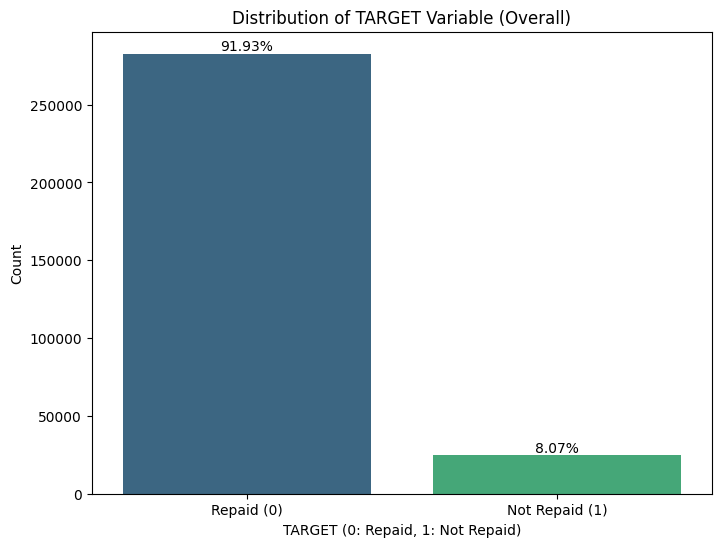

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=result_overall_target.index, y='count', data=result_overall_target, palette='viridis')

# Menambahkan label persentase di atas setiap batang
for index, row in result_overall_target.iterrows():
    plt.text(index, row['count'], f"{row['percentage']:.2f}%", color='black', ha="center", va='bottom')

plt.title('Distribution of TARGET Variable (Overall)')
plt.xlabel('TARGET (0: Repaid, 1: Not Repaid)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Repaid (0)', 'Not Repaid (1)'])
plt.show()

In [ ]:
# Hitung total per TARGET
total_per_type = train_with_previous_application.groupby('TARGET')['NAME_CONTRACT_STATUS'].count()

# Hitung count NAME_CONTRACT_STATUS per TARGET
count_by_type = train_with_previous_application.groupby(['TARGET', 'NAME_CONTRACT_STATUS'])['NAME_CONTRACT_STATUS'].count()

# Hitung persentase
percentage = (count_by_type / count_by_type.groupby(level=0).sum()) * 100

# Gabungkan count dan persentase menjadi dataframe
result_target_ncs = count_by_type.to_frame('count').join(percentage.to_frame('percentage'))
result_target_ncs

count  percentage
TARGET NAME_CONTRACT_STATUS                    
0      Approved              818856   63.411291
       Canceled              235641   18.247775
       Refused               215952   16.723081
       Unused offer           20892    1.617853
1      Approved               67243   54.955051
       Canceled               23800   19.450801
       Refused                29438   24.058516
       Unused offer            1879    1.535633

Dari kedua data tersebut, terlihat bahwa dari 91,93% peminjam yang tidak mengalami kredit macet, hanya 63,41% yang disetujui pengajuannya dan juga mencairkan. Sementara itu, 8,07% peminjam yang pernah mengalami kredit macet justru memiliki tingkat persetujuan dan pencairan cukup tinggi, yaitu 54,96%. Hal ini menjadi tantangan besar bagi Home Credit untuk menganalisis secara lebih spesifik dan mendalam karakteristik pelanggan yang berpotensi tidak atau terlambat melunasi kreditnya.

### NAME_CONTRACT_TYPE

In [ ]:
# Hitung total per NAME_CONTRACT_TYPE
total_per_type = train.groupby('NAME_CONTRACT_TYPE')['TARGET'].count()

# Hitung count TARGET per NAME_CONTRACT_TYPE
count_by_type = train.groupby(['NAME_CONTRACT_TYPE', 'TARGET'])['TARGET'].count()

# Hitung persentase
percentage = (count_by_type / count_by_type.groupby(level=0).sum()) * 100

# Gabungkan count dan persentase menjadi dataframe
result_name_contract_type_target = count_by_type.to_frame('count').join(percentage.to_frame('percentage'))
result_name_contract_type_target

count  percentage
NAME_CONTRACT_TYPE TARGET                    
Cash loans         0       255011   91.654087
                   1        23221    8.345913
Revolving loans    0        27675   94.521671
                   1         1604    5.478329

Peminjam tipe 'Revolving Loans' memiliki tingkat kesulitan pembayaran yang lebih tinggi dibandingkan 'Cash Loans', meskipun perbedaannya tidak begitu signifikan.

In [ ]:
# Hitung total per NAME_CONTRACT_TYPE
total_per_type = train_with_previous_application.groupby('NAME_CONTRACT_TYPE')['NAME_CONTRACT_STATUS'].count()

# Hitung count NAME_CONTRACT_STATUS per NAME_CONTRACT_TYPE
count_by_type = train_with_previous_application.groupby(['NAME_CONTRACT_TYPE', 'NAME_CONTRACT_STATUS'])['NAME_CONTRACT_STATUS'].count()

# Hitung persentase
percentage = (count_by_type / count_by_type.groupby(level=0).sum()) * 100

# Gabungkan count dan persentase menjadi dataframe
result_name_contract_type_ncs = count_by_type.to_frame('count').join(percentage.to_frame('percentage'))
result_name_contract_type_ncs

count  percentage
NAME_CONTRACT_TYPE NAME_CONTRACT_STATUS                    
Cash loans         Approved              816571   62.471244
                   Canceled              241552   18.479782
                   Refused               228351   17.469848
                   Unused offer           20641    1.579127
Revolving loans    Approved               69528   65.231832
                   Canceled               17889   16.783630
                   Refused                17039   15.986152
                   Unused offer            2130    1.998386

### EDUCATION_TYPE

In [ ]:
# Hitung total per NAME_EDUCATION_TYPE
total_per_type = train.groupby('NAME_EDUCATION_TYPE')['TARGET'].count()

# Hitung count TARGET per NAME_EDUCATION_TYPE
count_by_type = train.groupby(['NAME_EDUCATION_TYPE', 'TARGET'])['TARGET'].count()

# Hitung persentase
percentage = (count_by_type / count_by_type.groupby(level=0).sum()) * 100

# Gabungkan count dan persentase menjadi dataframe
result_education_type_target = count_by_type.to_frame('count').join(percentage.to_frame('percentage'))
result_education_type_target

count  percentage
NAME_EDUCATION_TYPE           TARGET                    
Academic degree               0          161   98.170732
                              1            3    1.829268
Higher education              0        70854   94.644885
                              1         4009    5.355115
Incomplete higher             0         9405   91.515034
                              1          872    8.484966
Lower secondary               0         3399   89.072327
                              1          417   10.927673
Secondary / secondary special 0       198867   91.060071
                              1        19524    8.939929

Peminjam dengan latar belakang pendidikan yang lebih rendah atau tidak menyelesaikan jenjang pendidikan terakhir memiliki tingkat kesulitan pengembalian yang lebih tinggi.

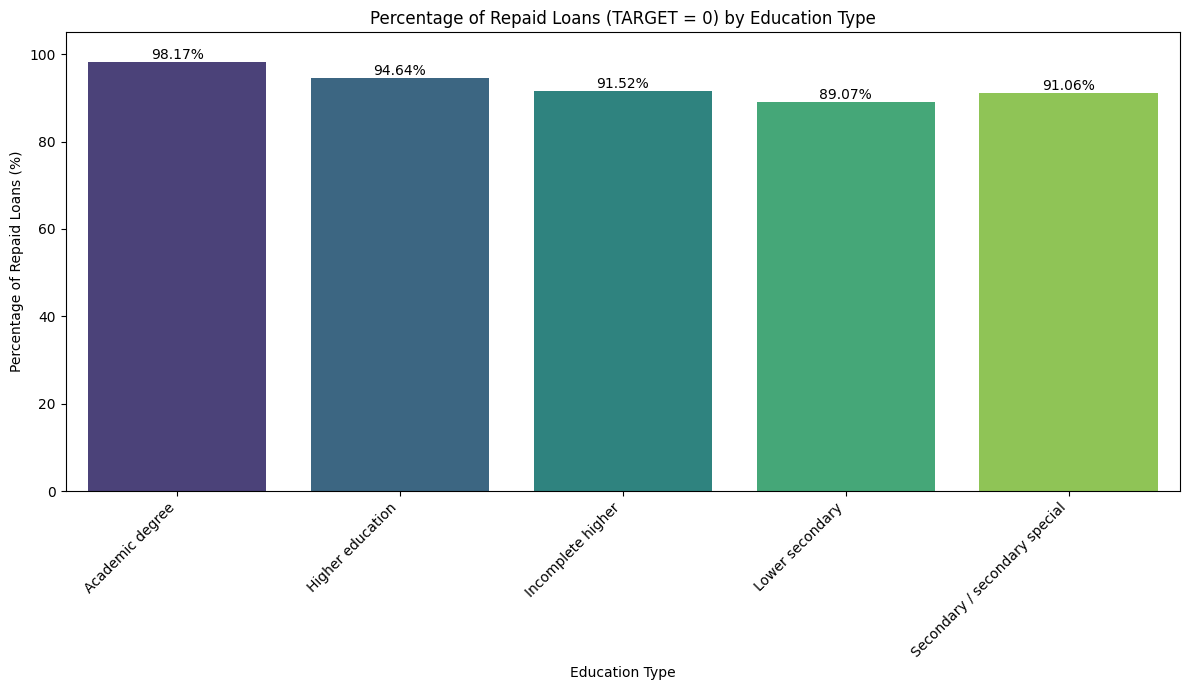

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for TARGET = 0
repaid_education_percentage = result_education_type_target.loc[(slice(None), 0), :].reset_index()
repaid_education_percentage = repaid_education_percentage.drop('TARGET', axis=1)

plt.figure(figsize=(12, 7))
sns.barplot(x='NAME_EDUCATION_TYPE', y='percentage', data=repaid_education_percentage, palette='viridis', hue='NAME_EDUCATION_TYPE', legend=False)

# Add percentage labels on top of each bar
for index, row in repaid_education_percentage.iterrows():
    plt.text(index, row['percentage'], f"{row['percentage']:.2f}%", color='black', ha="center", va='bottom')

plt.title('Percentage of Repaid Loans (TARGET = 0) by Education Type')
plt.xlabel('Education Type')
plt.ylabel('Percentage of Repaid Loans (%)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 105) # Adjust y-axis limit to make space for labels
plt.tight_layout()
plt.show()

In [ ]:
# Hitung total per NAME_EDUCATION_TYPE
total_per_type = train_with_previous_application.groupby('NAME_EDUCATION_TYPE')['NAME_CONTRACT_STATUS'].count()

# Hitung count NAME_CONTACT_STATUS per NAME_EDUCATION_TYPE
count_by_type = train_with_previous_application.groupby(['NAME_EDUCATION_TYPE', 'NAME_CONTRACT_STATUS'])['NAME_CONTRACT_STATUS'].count()

# Hitung persentase
percentage = (count_by_type / count_by_type.groupby(level=0).sum()) * 100

# Gabungkan count dan persentase menjadi dataframe
result_education_type_ncs = count_by_type.to_frame('count').join(percentage.to_frame('percentage'))
result_education_type_ncs

count  percentage
NAME_EDUCATION_TYPE           NAME_CONTRACT_STATUS                    
Academic degree               Approved                 418   72.193437
                              Canceled                  64   11.053541
                              Refused                   91   15.716753
                              Unused offer               6    1.036269
Higher education              Approved              195002   62.331826
                              Canceled               57074   18.243539
                              Refused                54051   17.277246
                              Unused offer            6718    2.147389
Incomplete higher             Approved               27676   61.215191
                              Canceled                7917   17.511225
                              Refused                 8635   19.099334
                              Unused offer             983    2.174250
Lower secondary               Approved               10929   63.673969
                              Canceled                3099   18.055232
                              Refused                 2971   17.309485
                              Unused offer             165    0.961314
Secondary / secondary special Approved              652074   62.826163
                              Canceled              191287   18.430160
                              Refused               179642   17.308185
                              Unused offer           14899    1.435492

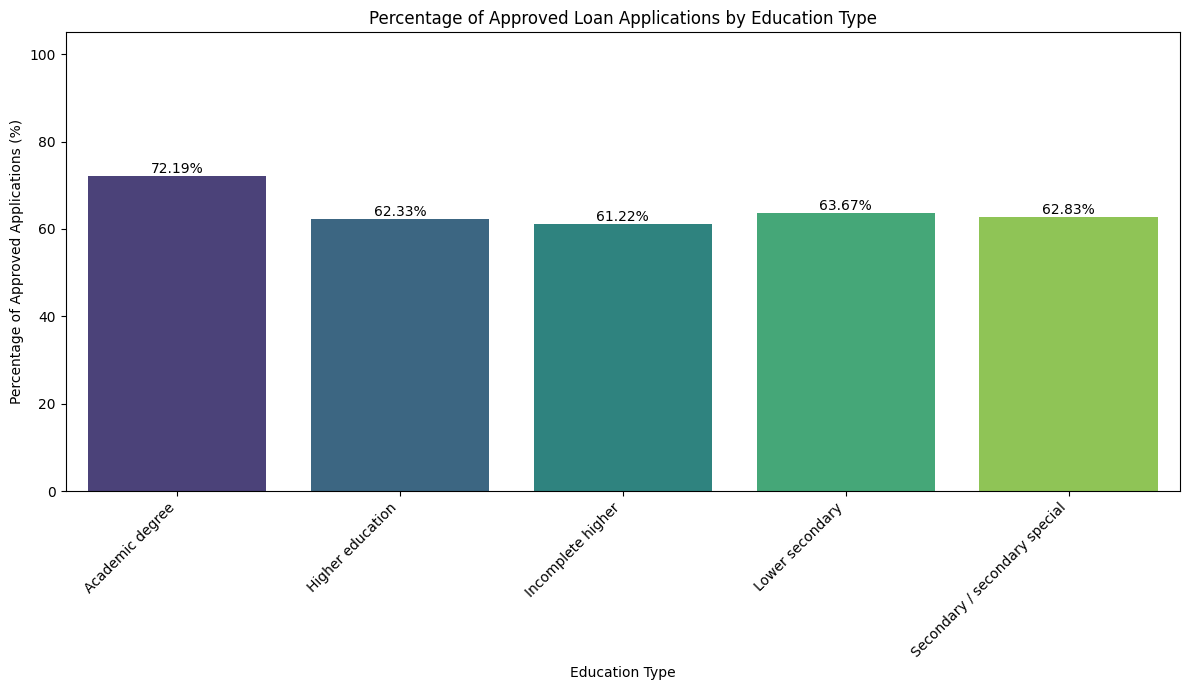

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for NAME_CONTRACT_STATUS = 'Approved'
approved_education_percentage = result_education_type_ncs.loc[(slice(None), 'Approved'), :].reset_index()
approved_education_percentage = approved_education_percentage.drop('NAME_CONTRACT_STATUS', axis=1)

plt.figure(figsize=(12, 7))
sns.barplot(x='NAME_EDUCATION_TYPE', y='percentage', data=approved_education_percentage, palette='viridis', hue='NAME_EDUCATION_TYPE', legend=False)

# Add percentage labels on top of each bar
for index, row in approved_education_percentage.iterrows():
    plt.text(index, row['percentage'], f"{row['percentage']:.2f}%", color='black', ha="center", va='bottom')

plt.title('Percentage of Approved Loan Applications by Education Type')
plt.xlabel('Education Type')
plt.ylabel('Percentage of Approved Applications (%)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 105) # Adjust y-axis limit to make space for labels
plt.tight_layout()
plt.show()

### INCOME_TYPE

In [ ]:
# Hitung total per NAME_INCOME_TYPE
total_income_type = train.groupby('NAME_INCOME_TYPE')['TARGET'].count()

# Hitung count TARGET per NAME_INCOME_TYPE
count_by_income_type = train.groupby(['NAME_INCOME_TYPE', 'TARGET'])['TARGET'].count()

# Hitung persentase
percentage = (count_by_income_type / count_by_income_type.groupby(level=0).sum()) * 100

# Gabungkan count dan persentase menjadi dataframe
result_income_type_target = count_by_income_type.to_frame('count').join(percentage.to_frame('percentage'))
result_income_type_target

count  percentage
NAME_INCOME_TYPE     TARGET                    
Businessman          0           10  100.000000
Commercial associate 0        66257   92.515743
                     1         5360    7.484257
Maternity leave      0            3   60.000000
                     1            2   40.000000
Pensioner            0        52380   94.613634
                     1         2982    5.386366
State servant        0        20454   94.245035
                     1         1249    5.754965
Student              0           18  100.000000
Unemployed           0           14   63.636364
                     1            8   36.363636
Working              0       143550   90.411528
                     1        15224    9.588472

Peminjam dengan status tidak bekerja dan cuti sebelum/sesudah hamil memiliki tingkat kesulitan pengembalian yang relatif besar. Akan tetapi, jumlah peminjam dengan kategori tersebut masih sangat sedikit, sehingga kita belum bisa menilai terlalu cepat.

In [ ]:
# Hitung total per NAME_INCOME_TYPE
total_income_type = train_with_previous_application.groupby('NAME_INCOME_TYPE')['NAME_CONTRACT_STATUS'].count()

# Hitung count NAME_CONTRACT_STATUS per NAME_INCOME_TYPE
count_by_income_type = train_with_previous_application.groupby(['NAME_INCOME_TYPE', 'NAME_CONTRACT_STATUS'])['NAME_CONTRACT_STATUS'].count()

# Hitung persentase
percentage = (count_by_income_type / count_by_income_type.groupby(level=0).sum()) * 100

# Gabungkan count dan persentase menjadi dataframe
result_income_type_ncs = count_by_income_type.to_frame('count').join(percentage.to_frame('percentage'))
result_income_type_ncs

count  percentage
NAME_INCOME_TYPE     NAME_CONTRACT_STATUS                    
Commercial associate Approved              198507   61.747662
                     Canceled               59785   18.596744
                     Refused                58117   18.077896
                     Unused offer            5072    1.577698
Maternity leave      Approved                  10   62.500000
                     Canceled                   2   12.500000
                     Refused                    3   18.750000
                     Unused offer               1    6.250000
Pensioner            Approved              170144   62.199865
                     Canceled               57674   21.083994
                     Refused                43802   16.012780
                     Unused offer            1924    0.703360
State servant        Approved               61630   65.269423
                     Canceled               15679   16.604889
                     Refused                15597   16.518046
                     Unused offer            1518    1.607642
Student              Approved                  20   83.333333
                     Canceled                   3   12.500000
                     Refused                    1    4.166667
Unemployed           Approved                  68   55.284553
                     Canceled                  16   13.008130
                     Refused                   38   30.894309
                     Unused offer               1    0.813008
Working              Approved              455720   62.937015
                     Canceled              126282   17.440121
                     Refused               127832   17.654183
                     Unused offer           14255    1.968681

Pensioner memiliki 94.61% tingkat pengembalian kredit on-time tetapi hanya 62.20% pengajuan kredit yang diapproved dan dicairkan oleh peminjam (selisih 32.41%).

Commercial Associate juga memiliki tingkat pengembalian kredit on-time cukup tinggi (92.52%). Namun, hanya 61.75% pengajuan kredit yang diapproved dan dicairkan oleh peminajm (selisih 30.77%).

Baik Pensioner maupun Commercial Associate juga merupakan kategori income type dengan jumlah peminjam yang cukup tinggi. Oleh karena itu, kita lebih bisa mempertimbangkan untuk memberi kredit kepada kategori income type ini.

### FAMILY_STATUS

In [ ]:
# Hitung total per NAME_FAMILY_STATUS
total_per_type = train.groupby('NAME_FAMILY_STATUS')['TARGET'].count()

# Hitung count TARGET per NAME_FAMILY_STATUS
count_by_type = train.groupby(['NAME_FAMILY_STATUS', 'TARGET'])['TARGET'].count()

# Hitung persentase
percentage = (count_by_type / count_by_type.groupby(level=0).sum()) * 100

# Gabungkan count dan persentase menjadi dataframe
result_name_family_status_target = count_by_type.to_frame('count').join(percentage.to_frame('percentage'))
result_name_family_status_target

count  percentage
NAME_FAMILY_STATUS   TARGET                    
Civil marriage       0        26814   90.055416
                     1         2961    9.944584
Married              0       181582   92.440132
                     1        14850    7.559868
Separated            0        18150   91.805766
                     1         1620    8.194234
Single / not married 0        40987   90.192325
                     1         4457    9.807675
Unknown              0            2  100.000000
Widow                0        15151   94.175783
                     1          937    5.824217

In [ ]:
# Hitung total per NAME_FAMILY_STATUS
total_per_type = train_with_previous_application.groupby('NAME_FAMILY_STATUS')['NAME_CONTRACT_STATUS'].count()

# Hitung count NAME_CONTRACT_STATUS per NAME_FAMILY_STATUS
count_by_type = train_with_previous_application.groupby(['NAME_FAMILY_STATUS', 'NAME_CONTRACT_STATUS'])['NAME_CONTRACT_STATUS'].count()

# Hitung persentase
percentage = (count_by_type / count_by_type.groupby(level=0).sum()) * 100

# Gabungkan count dan persentase menjadi dataframe
result_name_family_status_ncs = count_by_type.to_frame('count').join(percentage.to_frame('percentage'))
result_name_family_status_ncs

count  percentage
NAME_FAMILY_STATUS   NAME_CONTRACT_STATUS                    
Civil marriage       Approved               86827   60.651592
                     Canceled               26143   18.261769
                     Refused                28226   19.716814
                     Unused offer            1961    1.369825
Married              Approved              577137   63.358290
                     Canceled              167233   18.358894
                     Refused               152167   16.704943
                     Unused offer           14373    1.577873
Separated            Approved               56750   62.131862
                     Canceled               16535   18.103090
                     Refused                16453   18.013313
                     Unused offer            1600    1.751735
Single / not married Approved              114880   61.546044
                     Canceled               33403   17.895391
                     Refused                34292   18.371666
                     Unused offer            4082    2.186899
Widow                Approved               50505   61.863815
                     Canceled               16127   19.754039
                     Refused                14252   17.457343
                     Unused offer             755    0.924803

### EDUCATION_LEVEL

In [ ]:
# Hitung total per EDUCATION_LEVEL
total_per_type = train.groupby('EDUCATION_LEVEL')['TARGET'].count()

# Hitung count TARGET per EDUCATION_LEVEL
count_by_type = train.groupby(['EDUCATION_LEVEL', 'TARGET'])['TARGET'].count()

# Hitung persentase
percentage = (count_by_type / count_by_type.groupby(level=0).sum()) * 100

# Gabungkan count dan persentase menjadi dataframe
result_education_level_target = count_by_type.to_frame('count').join(percentage.to_frame('percentage'))
result_education_level_target

count  percentage
EDUCATION_LEVEL  TARGET                    
Higher Education 0        71015   94.652592
                 1         4012    5.347408
Lower Education  0       211671   91.047556
                 1        20813    8.952444

### OCCUPATION_TYPE

In [ ]:
# Hitung total per OCCUPATION_TYPE
total_per_type = train.groupby('OCCUPATION_TYPE')['TARGET'].count()

# Hitung count TARGET per OCCUPATION_TYPE
count_by_type = train.groupby(['OCCUPATION_TYPE', 'TARGET'])['TARGET'].count()

# Hitung persentase
percentage = (count_by_type / count_by_type.groupby(level=0).sum()) * 100

# Gabungkan count dan persentase menjadi dataframe
result_occupation_type_target = count_by_type.to_frame('count').join(percentage.to_frame('percentage'))
result_occupation_type_target

count  percentage
OCCUPATION_TYPE       TARGET                   
Accountants           0        9339   95.169673
                      1         474    4.830327
Cleaning staff        0        4206   90.393295
                      1         447    9.606705
Cooking staff         0        5325   89.556004
                      1         621   10.443996
Core staff            0       25832   93.696046
                      1        1738    6.303954
Drivers               0       16496   88.673870
                      1        2107   11.326130
HR staff              0         527   93.605684
                      1          36    6.394316
High skill tech staff 0       10679   93.840070
                      1         701    6.159930
IT staff              0         492   93.536122
                      1          34    6.463878
Laborers              0       49348   89.421230
                      1        5838   10.578770
Low-skill Laborers    0        1734   82.847587
                      1         359   17.152413
Managers              0       20043   93.785972
                      1        1328    6.214028
Medicine staff        0        7965   93.299754
                      1         572    6.700246
Private service staff 0        2477   93.401207
                      1         175    6.598793
Realty agents         0         692   92.143808
                      1          59    7.856192
Sales staff           0       29010   90.368201
                      1        3092    9.631799
Secretaries           0        1213   92.950192
                      1          92    7.049808
Security staff        0        5999   89.257551
                      1         722   10.742449
Waiters/barmen staff  0        1196   88.724036
                      1         152   11.275964

Peminjam dengan status pekerjaan yang tidak harus memerlukan ijazah pendidikan tinggi cenderung memiliki tingkat kesulitan pengembalian yang lebih tinggi.

In [ ]:
# Hitung total per OCCUPATION_TYPE
total_per_type = train_with_previous_application.groupby('OCCUPATION_TYPE')['NAME_CONTRACT_STATUS'].count()

# Hitung count NAME_CONTRACT_STATUS per OCCUPATION_TYPE
count_by_type = train_with_previous_application.groupby(['OCCUPATION_TYPE', 'NAME_CONTRACT_STATUS'])['NAME_CONTRACT_STATUS'].count()

# Hitung persentase
percentage = (count_by_type / count_by_type.groupby(level=0).sum()) * 100

# Gabungkan count dan persentase menjadi dataframe
result_occupation_type_status = count_by_type.to_frame('count').join(percentage.to_frame('percentage'))
result_occupation_type_status

count  percentage
OCCUPATION_TYPE       NAME_CONTRACT_STATUS                    
Accountants           Approved               26957   64.247581
                      Canceled                7463   17.786834
                      Refused                 6787   16.175700
                      Unused offer             751    1.789885
Cleaning staff        Approved               14888   61.196975
                      Canceled                4718   19.393292
                      Refused                 4403   18.098487
                      Unused offer             319    1.311246
Cooking staff         Approved               17925   62.399916
                      Canceled                5169   17.994152
                      Refused                 5080   17.684328
                      Unused offer             552    1.921604
Core staff            Approved               75415   63.764035
                      Canceled               19877   16.806176
                      Refused                20579   17.399723
                      Unused offer            2401    2.030066
Drivers               Approved               52300   62.212283
                      Canceled               14861   17.677567
                      Refused                15363   18.274709
                      Unused offer            1543    1.835441
HR staff              Approved                1404   60.700389
                      Canceled                 455   19.671422
                      Refused                  412   17.812365
                      Unused offer              42    1.815824
High skill tech staff Approved               31306   64.571087
                      Canceled                8483   17.496855
                      Refused                 7743   15.970546
                      Unused offer             951    1.961512
IT staff              Approved                1148   67.410452
                      Canceled                 266   15.619495
                      Refused                  258   15.149736
                      Unused offer              31    1.820317
Laborers              Approved              159468   63.457475
                      Canceled               43432   17.282998
                      Refused                43504   17.311649
                      Unused offer            4895    1.947879
Low-skill Laborers    Approved                5686   61.008584
                      Canceled                1738   18.648069
                      Refused                 1728   18.540773
                      Unused offer             168    1.802575
Managers              Approved               58371   61.481341
                      Canceled               16844   17.741545
                      Refused                18140   19.106603
                      Unused offer            1586    1.670511
Medicine staff        Approved               25574   63.936598
                      Canceled                6859   17.147929
                      Refused                 6853   17.132928
                      Unused offer             713    1.782545
Private service staff Approved                7498   61.268181
                      Canceled                2441   19.946070
                      Refused                 2054   16.783788
                      Unused offer             245    2.001961
Realty agents         Approved                2161   60.976298
                      Canceled                 715   20.174944
                      Refused                  594   16.760722
                      Unused offer              74    2.088036
Sales staff           Approved               93060   61.483371
                      Canceled               27739   18.326749
                      Refused                27941   18.460207
                      Unused offer            2618    1.729674
Secretaries           Approved                3732   65.040084
                      Canceled                1059   18.455908
             

Terdapat 2 profesi yang memiliki tingkat kelancaran pembayaran kredit cukup tinggi tetapi pengajuan kreditnya relatif kurang yaitu profesi HR Staff dan Manager dengan selisih persentase pengembalian kredit dan approval sebesar 32.91% dan 32.31%.

### GENDER

In [ ]:
# Hitung jumlah per CODE_GENDER
count_by_gender = train.groupby(['CODE_GENDER', 'TARGET'])['TARGET'].count()

# Hitung persentase per CODE_GENDER
percentage_by_gender = (count_by_gender / count_by_gender.groupby(level=0).sum()) * 100

# Gabungkan ke DataFrame hasil
result_gender_target = count_by_gender.to_frame('count').join(percentage_by_gender.to_frame('percentage'))

result_gender_target

count  percentage
CODE_GENDER TARGET                    
F           0       188278   93.000672
            1        14170    6.999328
M           0        94404   89.858080
            1        10655   10.141920
XNA         0            4  100.000000

In [ ]:
# Hitung jumlah per CODE_GENDER
count_by_gender = train_with_previous_application.groupby(['CODE_GENDER', 'NAME_CONTRACT_STATUS'])['NAME_CONTRACT_STATUS'].count()

# Hitung persentase per CODE_GENDER
percentage_by_gender = (count_by_gender / count_by_gender.groupby(level=0).sum()) * 100

# Gabungkan ke DataFrame hasil
result_gender_ncs = count_by_gender.to_frame('count').join(percentage_by_gender.to_frame('percentage'))

result_gender_ncs

count  percentage
CODE_GENDER NAME_CONTRACT_STATUS                    
F           Approved              598626   62.674229
            Canceled              179037   18.744602
            Refused               163302   17.097197
            Unused offer           14174    1.483972
M           Approved              287450   62.692609
            Canceled               80397   17.534520
            Refused                82063   17.897873
            Unused offer            8597    1.874999
XNA         Approved                  23   41.818182
            Canceled                   7   12.727273
            Refused                   25   45.454545

Laki-laki memiliki tingkat kesulitan pengembalian kredit yang lebih tinggi.

### DAYS_BIRTH

In [ ]:
train['AGE'] = (-train['DAYS_BIRTH']) / 365.25

In [ ]:
import numpy as np

# Tentukan range umur berdasarkan minimal & maksimal umur di data
min_age = int(train['AGE'].min())
max_age = int(train['AGE'].max())

# Bin size 5 tahun
bins = np.arange(min_age, max_age + 5, 5)

# Label bin: 1–5, 6–10, dst.
labels = [f"{bins[i]+1:.0f}-{bins[i+1]:.0f}" for i in range(len(bins)-1)]

# Assign AGE_BIN
train['AGE_BIN'] = pd.cut(train['AGE'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
# Group by AGE_BIN dan TARGET
count_by_bin = train.groupby(['AGE_BIN', 'TARGET'])['TARGET'].count()

# Hitung persentase per AGE_BIN
percentage_by_bin = (count_by_bin / count_by_bin.groupby(level=0).sum()) * 100

# Gabungkan hasilnya
result_age_bin_target = count_by_bin.to_frame('count').join(
    percentage_by_bin.to_frame('percentage')
)

result_age_bin_target

/tmp/ipython-input-331868612.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_by_bin = train.groupby(['AGE_BIN', 'TARGET'])['TARGET'].count()
/tmp/ipython-input-331868612.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentage_by_bin = (count_by_bin / count_by_bin.groupby(level=0).sum()) * 100


count  percentage
AGE_BIN TARGET                   
21-25   0       10729   87.705387
        1        1504   12.294613
26-30   0       29286   88.872030
        1        3667   11.127970
31-35   0       35422   89.730469
        1        4054   10.269531
36-40   0       39030   91.036317
        1        3843    8.963683
41-45   0       38146   92.166812
        1        3242    7.833188
46-50   0       32582   92.580911
        1        2611    7.419089
51-55   0       32662   93.328000
        1        2335    6.672000
56-60   0       31279   94.464243
        1        1833    5.535757
61-65   0       25962   94.717256
        1        1448    5.282744
66-70   0        7588   96.343321
        1         288    3.656679

In [ ]:
# Tentukan range umur berdasarkan minimal & maksimal umur di data (dari train_with_previous_application)
min_age_prev = int(((-train_with_previous_application['DAYS_BIRTH']) / 365.25).min())
max_age_prev = int(((-train_with_previous_application['DAYS_BIRTH']) / 365.25).max())

# Bin size 5 tahun
bins_prev = np.arange(min_age_prev, max_age_prev + 5, 5)

# Label bin: 1–5, 6–10, dst.
labels_prev = [f"{bins_prev[i]+1:.0f}-{bins_prev[i+1]:.0f}" for i in range(len(bins_prev)-1)]

# Assign AGE_BIN to train_with_previous_application
train_with_previous_application['AGE_BIN'] = pd.cut(
    (-train_with_previous_application['DAYS_BIRTH']) / 365.25,
    bins=bins_prev,
    labels=labels_prev,
    include_lowest=True
)

# Hitung jumlah per AGE_BIN
count_by_age_bin = train_with_previous_application.groupby(['AGE_BIN', 'NAME_CONTRACT_STATUS'])['NAME_CONTRACT_STATUS'].count()

# Hitung persentase per AGE_BIN
percentage_by_age_bin = (count_by_age_bin / count_by_age_bin.groupby(level=0).sum()) * 100

# Gabungkan ke DataFrame hasil
result_age_bin_ncs = count_by_age_bin.to_frame('count').join(percentage_by_age_bin.to_frame('percentage'))

result_age_bin_ncs

/tmp/ipython-input-1559158894.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_by_age_bin = train_with_previous_application.groupby(['AGE_BIN', 'NAME_CONTRACT_STATUS'])['NAME_CONTRACT_STATUS'].count()
/tmp/ipython-input-1559158894.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentage_by_age_bin = (count_by_age_bin / count_by_age_bin.groupby(level=0).sum()) * 100


count  percentage
AGE_BIN NAME_CONTRACT_STATUS                    
21-25   Approved               24968   62.310956
        Canceled                6244   15.582730
        Refused                 7734   19.301223
        Unused offer            1124    2.805091
26-30   Approved               87068   61.759553
        Canceled               22354   15.856262
        Refused                27952   19.827066
        Unused offer            3605    2.557118
31-35   Approved              112237   63.461288
        Canceled               28842   16.307906
        Refused                31856   18.012089
        Unused offer            3924    2.218717
36-40   Approved              124357   63.901935
        Canceled               33446   17.186520
        Refused                32898   16.904926
        Unused offer            3905    2.006619
41-45   Approved              123173   63.552496
        Canceled               34669   17.887861
        Refused                32414   16.724368
        Unused offer            3557    1.835274
46-50   Approved              104506   63.094153
        Canceled               30595   18.471338
        Refused                28105   16.968032
        Unused offer            2429    1.466477
51-55   Approved               98595   61.779025
        Canceled               31760   19.900622
        Refused                27542   17.257649
        Unused offer            1696    1.062703
56-60   Approved               97032   60.951663
        Canceled               32810   20.609944
        Refused                28063   17.628066
        Unused offer            1290    0.810327
61-65   Approved               86149   61.316014
        Canceled               29851   21.246263
        Refused                23533   16.749466
        Unused offer             967    0.688256
66-70   Approved               28014   65.991378
        Canceled                8870   20.894679
        Refused                 5293   12.468493
        Unused offer             274    0.645450

### AVG_INCOME

In [ ]:
# Hitung rata‑rata AMT_INCOME_TOTAL per TARGET
avg_income_by_target = train.groupby('TARGET')['AMT_INCOME_TOTAL'].mean().reset_index()

avg_income_by_target

TARGET  AMT_INCOME_TOTAL
0       0     169077.722266
1       1     165611.760906

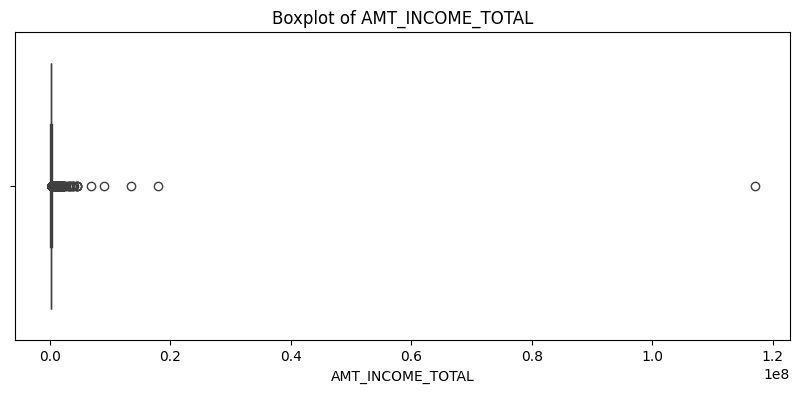

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=train['AMT_INCOME_TOTAL'])
plt.title('Boxplot of AMT_INCOME_TOTAL')
plt.show()

Besar atau kecilnya rata-rata pendapatan tidak berpengaruh signifikan terhadap tingkat pengembalian kredit.

In [ ]:
train['AMT_INCOME_TOTAL']

0         202500.0
1         270000.0
2          67500.0
3         135000.0
4         121500.0
            ...   
307506    157500.0
307507     72000.0
307508    153000.0
307509    171000.0
307510    157500.0
Name: AMT_INCOME_TOTAL, Length: 307511, dtype: float64

In [ ]:
import pandas as pd

# Misal train adalah dataframe kamu

# 1. Buat bins untuk AMT_INCOME_TOTAL
bins = [0, 2000000, 4000000, 6000000, 8000000, 10000000, 12000000,
        14000000, 16000000, 18000000, 20000000, float('inf')]

# 2. Buat labels untuk bins
labels = ['0-2M', '2M-4M', '4M-6M', '6M-8M', '8M-10M', '10M-12M',
          '12M-14M', '14M-16M', '16M-18M', '18M-20M', '>20M']

# 3. Tambahkan kolom kategori berdasarkan bins
train['INCOME_BIN'] = pd.cut(train['AMT_INCOME_TOTAL'], bins=bins, labels=labels, right=True)

# 4. Hitung jumlah per bin dan target
count_by_income_bin = train.groupby(['INCOME_BIN', 'TARGET'])['TARGET'].count()

# 5. Hitung persentase per bin
percentage_by_income_bin = (count_by_income_bin / count_by_income_bin.groupby(level=0).sum()) * 100

# 6. Gabungkan ke DataFrame hasil
result_income_bin_target = count_by_income_bin.to_frame('count').join(percentage_by_income_bin.to_frame('percentage'))

# 7. Tampilkan hasil
result_income_bin_target

/tmp/ipython-input-2677722719.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_by_income_bin = train.groupby(['INCOME_BIN', 'TARGET'])['TARGET'].count()
/tmp/ipython-input-2677722719.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentage_by_income_bin = (count_by_income_bin / count_by_income_bin.groupby(level=0).sum()) * 100


count  percentage
INCOME_BIN TARGET                    
0-2M       0       282644   91.926613
           1        24823    8.073387
2M-4M      0           34   97.142857
           1            1    2.857143
4M-6M      0            4  100.000000
           1            0    0.000000
6M-8M      0            1  100.000000
           1            0    0.000000
8M-10M     0            1  100.000000
           1            0    0.000000
10M-12M    0            0         NaN
           1            0         NaN
12M-14M    0            1  100.000000
           1            0    0.000000
14M-16M    0            0         NaN
           1            0         NaN
16M-18M    0            0         NaN
           1            0         NaN
18M-20M    0            1  100.000000
           1            0    0.000000
>20M       0            0    0.000000
           1            1  100.000000

In [ ]:
import pandas as pd

# Misal train_with_previous_application adalah dataframe kamu

# 1. Buat bins untuk AMT_INCOME_TOTAL
bins = [0, 2000000, 4000000, 6000000, 8000000, 10000000, 12000000,
        14000000, 16000000, 18000000, 20000000, float('inf')]

# 2. Buat labels untuk bins
labels = ['0-2M', '2M-4M', '4M-6M', '6M-8M', '8M-10M', '10M-12M',
          '12M-14M', '14M-16M', '16M-18M', '18M-20M', '>20M']

# 3. Tambahkan kolom kategori berdasarkan bins
train_with_previous_application['INCOME_BIN'] = pd.cut(
    train_with_previous_application['AMT_INCOME_TOTAL'],
    bins=bins,
    labels=labels,
    right=True
)

# 4. Hitung jumlah per bin dan NAME_CONTRACT_STATUS
count_by_income = train_with_previous_application.groupby(['INCOME_BIN', 'NAME_CONTRACT_STATUS'])['NAME_CONTRACT_STATUS'].count()

# 5. Hitung persentase per bin
percentage_by_income = (count_by_income / count_by_income.groupby(level=0).sum()) * 100

# 6. Gabungkan ke DataFrame hasil
result_income_ncs = count_by_income.to_frame('count').join(percentage_by_income.to_frame('percentage'))

# 7. Tampilkan hasil
result_income_ncs

/tmp/ipython-input-541443939.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_by_income = train_with_previous_application.groupby(['INCOME_BIN', 'NAME_CONTRACT_STATUS'])['NAME_CONTRACT_STATUS'].count()
/tmp/ipython-input-541443939.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentage_by_income = (count_by_income / count_by_income.groupby(level=0).sum()) * 100


count  percentage
INCOME_BIN NAME_CONTRACT_STATUS                    
0-2M       Approved              886027   62.679916
           Canceled              259417   18.351851
           Refused               245361   17.357492
           Unused offer           22769    1.610740
2M-4M      Approved                  54   55.102041
           Canceled                  18   18.367347
           Refused                   26   26.530612
           Unused offer               0    0.000000
4M-6M      Approved                   5   45.454545
           Canceled                   3   27.272727
           Refused                    2   18.181818
           Unused offer               1    9.090909
6M-8M      Approved                   3   60.000000
           Canceled                   1   20.000000
           Refused                    1   20.000000
           Unused offer               0    0.000000
8M-10M     Approved                   0         NaN
           Canceled                   0         NaN
           Refused                    0         NaN
           Unused offer               0         NaN
10M-12M    Approved                   0         NaN
           Canceled                   0         NaN
           Refused                    0         NaN
           Unused offer               0         NaN
12M-14M    Approved                   5   71.428571
           Canceled                   2   28.571429
           Refused                    0    0.000000
           Unused offer               0    0.000000
14M-16M    Approved                   0         NaN
           Canceled                   0         NaN
           Refused                    0         NaN
           Unused offer               0         NaN
16M-18M    Approved                   0         NaN
           Canceled                   0         NaN
           Refused                    0         NaN
           Unused offer               0         NaN
18M-20M    Approved                   3  100.000000
           Canceled                   0    0.000000
           Refused                    0    0.000000
           Unused offer               0    0.000000
>20M       Approved                   2   66.666667
           Canceled                   0    0.000000
           Refused                    0    0.000000
           Unused offer               1   33.333333

Peminjam dengan penghasilan 0–2 miliar memiliki risiko gagal bayar tertinggi, sekitar 8,07%, sehingga segmen ini perlu mendapat perhatian lebih. Banyak peminjam berada di kategori ini karena sebagian besar penduduk memiliki penghasilan di bawah UMR. Untuk memenuhi kebutuhan hidup, kemampuan mereka dalam mengembalikan kredit tepat waktu cenderung lebih rendah. Namun, kita tidak bisa langsung menolak semua peminjam di kelompok ini, karena jumlahnya cukup besar dibandingkan peminjam berpenghasilan tinggi, sehingga tetap ada peluang untuk menyalurkan kredit secara selektif.

Di sisi lain, data peminjam dengan penghasilan di atas 4 miliar masih terbatas, sehingga sulit memastikan mereka selalu mampu mengembalikan kredit tepat waktu. Oleh karena itu, penilaian untuk kelompok ini tetap perlu dilakukan dengan hati-hati hingga datanya lebih lengkap.

### AVG_CREDIT

In [ ]:
# Hitung rata-rata AMT_CREDIT per TARGET
avg_credit_by_target = train.groupby('TARGET')['AMT_CREDIT'].mean().reset_index()

avg_credit_by_target

TARGET     AMT_CREDIT
0       0  602648.282002
1       1  557778.527674

Besar atau kecilnya kredit tidak berpengaruh signifikan terhadap tingkat pengembalian kredit.

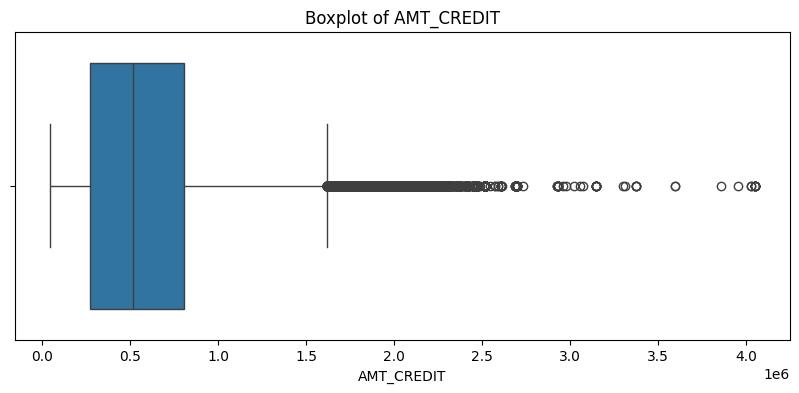

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=train['AMT_CREDIT'])
plt.title('Boxplot of AMT_CREDIT')
plt.show()

In [ ]:
import pandas as pd

# Misal train adalah dataframe kamu

# 1. Buat bins untuk AMT_CREDIT
bins = [0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000, float('inf')]

# 2. Buat labels untuk bins
labels = ['0-0.5M', '0.5M-1M', '1M-1.5M', '1.5M-2M', '2M-2.5M',
          '2.5M-3M', '3M-3.5M', '3.5M-4M', '>4M']

# 3. Tambahkan kolom kategori berdasarkan bins
train['CREDIT_BIN'] = pd.cut(train['AMT_CREDIT'], bins=bins, labels=labels, right=True)

# 4. Hitung jumlah per bin dan TARGET
count_by_amt_credit = train.groupby(['CREDIT_BIN', 'TARGET'])['TARGET'].count()

# 5. Hitung persentase per bin
percentage_by_amt_credit = (count_by_amt_credit / count_by_amt_credit.groupby(level=0).sum()) * 100

# 6. Gabungkan ke DataFrame hasil
result_amt_credit_target = count_by_amt_credit.to_frame('count').join(percentage_by_amt_credit.to_frame('percentage'))

# 7. Tampilkan hasil
result_amt_credit_target


/tmp/ipython-input-304704148.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_by_amt_credit = train.groupby(['CREDIT_BIN', 'TARGET'])['TARGET'].count()
/tmp/ipython-input-304704148.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentage_by_amt_credit = (count_by_amt_credit / count_by_amt_credit.groupby(level=0).sum()) * 100


count  percentage
CREDIT_BIN TARGET                    
0-0.5M     0       136728   91.559133
           1        12605    8.440867
0.5M-1M    0        98905   91.415341
           1         9288    8.584659
1M-1.5M    0        36773   93.739325
           1         2456    6.260675
1.5M-2M    0         8317   95.301937
           1          410    4.698063
2M-2.5M    0         1616   96.882494
           1           52    3.117506
2.5M-3M    0          317   96.352584
           1           12    3.647416
3M-3.5M    0           17   94.444444
           1            1    5.555556
3.5M-4M    0            4  100.000000
           1            0    0.000000
>4M        0            9   90.000000
           1            1   10.000000

In [ ]:
import pandas as pd

# Misal train_with_previous_application adalah dataframe kamu

# 1. Buat bins untuk AMT_CREDIT
bins = [0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000, float('inf')]

# 2. Buat labels untuk bins
labels = ['0-0.5M', '0.5M-1M', '1M-1.5M', '1.5M-2M', '2M-2.5M',
          '2.5M-3M', '3M-3.5M', '3.5M-4M', '>4M']

# 3. Tambahkan kolom kategori berdasarkan bins
train_with_previous_application['CREDIT_BIN'] = pd.cut(
    train_with_previous_application['AMT_CREDIT'],
    bins=bins,
    labels=labels,
    right=True
)

# 4. Hitung jumlah per bin dan NAME_CONTRACT_STATUS
count_by_amt_credit = train_with_previous_application.groupby(['CREDIT_BIN', 'NAME_CONTRACT_STATUS'])['NAME_CONTRACT_STATUS'].count()

# 5. Hitung persentase per bin
percentage_by_amt_credit = (count_by_amt_credit / count_by_amt_credit.groupby(level=0).sum()) * 100

# 6. Gabungkan ke DataFrame hasil
result_amt_credit_ncs = count_by_amt_credit.to_frame('count').join(percentage_by_amt_credit.to_frame('percentage'))

# 7. Tampilkan hasil
result_amt_credit_ncs

/tmp/ipython-input-2682132438.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_by_amt_credit = train_with_previous_application.groupby(['CREDIT_BIN', 'NAME_CONTRACT_STATUS'])['NAME_CONTRACT_STATUS'].count()
/tmp/ipython-input-2682132438.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentage_by_amt_credit = (count_by_amt_credit / count_by_amt_credit.groupby(level=0).sum()) * 100


count  percentage
CREDIT_BIN NAME_CONTRACT_STATUS                    
0-0.5M     Approved              428175   61.551853
           Canceled              129058   18.552599
           Refused               127017   18.259197
           Unused offer           11383    1.636351
0.5M-1M    Approved              313377   62.657731
           Canceled               92709   18.536573
           Refused                86128   17.220744
           Unused offer            7927    1.584953
1M-1.5M    Approved              116634   66.046412
           Canceled               30682   17.374316
           Refused                26480   14.994847
           Unused offer            2798    1.584425
1.5M-2M    Approved               24136   67.464222
           Canceled                6075   16.980657
           Refused                 4986   13.936717
           Unused offer             579    1.618403
2M-2.5M    Approved                3349   67.303055
           Canceled                 843   16.941318
           Refused                  710   14.268489
           Unused offer              74    1.487138
2.5M-3M    Approved                 413   73.618538
           Canceled                  72   12.834225
           Refused                   66   11.764706
           Unused offer              10    1.782531
3M-3.5M    Approved                  12   70.588235
           Canceled                   2   11.764706
           Refused                    3   17.647059
           Unused offer               0    0.000000
3.5M-4M    Approved                   2  100.000000
           Canceled                   0    0.000000
           Refused                    0    0.000000
           Unused offer               0    0.000000
>4M        Approved                   1  100.000000
           Canceled                   0    0.000000
           Refused                    0    0.000000
           Unused offer               0    0.000000

### AVG_CHILDREN

In [ ]:
# Hitung rata-rata CNT_CHILDREN per TARGET
avg_children_by_target = train.groupby('TARGET')['CNT_CHILDREN'].mean().reset_index()

avg_children_by_target

TARGET  CNT_CHILDREN
0       0      0.412946
1       1      0.463807

Banyak atau tidaknya anak yang dimiliki oleh pinjaman tidak berpengaruh signifikan terhadap risiko kredit macet.

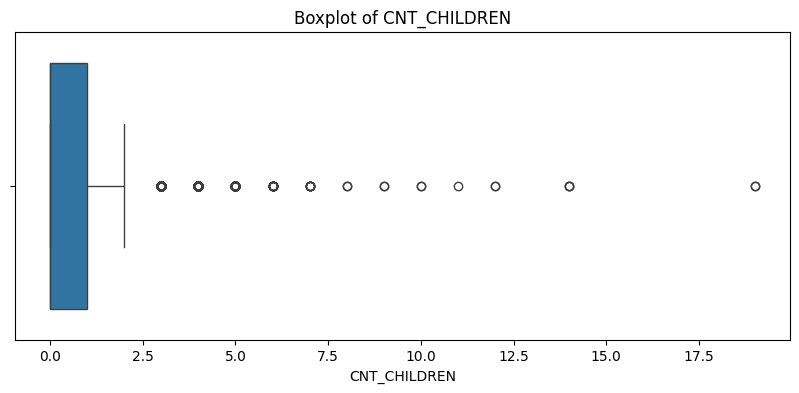

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=train['CNT_CHILDREN'])
plt.title('Boxplot of CNT_CHILDREN')
plt.show()

In [ ]:
# Hitung jumlah per CNT_CHILDREN
count_by_children = train.groupby(['CNT_CHILDREN', 'TARGET'])['TARGET'].count()

# Hitung persentase per CNT_CHILDREN
percentage_by_children = (count_by_children / count_by_children.groupby(level=0).sum()) * 100

# Gabungkan ke DataFrame hasil
result_children_target = count_by_children.to_frame('count').join(percentage_by_children.to_frame('percentage'))

result_children_target

count  percentage
CNT_CHILDREN TARGET                    
0            0       198762   92.288191
             1        16609    7.711809
1            0        55665   91.076425
             1         5454    8.923575
2            0        24416   91.278179
             1         2333    8.721821
3            0         3359   90.368577
             1          358    9.631423
4            0          374   87.179487
             1           55   12.820513
5            0           77   91.666667
             1            7    8.333333
6            0           15   71.428571
             1            6   28.571429
7            0            7  100.000000
8            0            2  100.000000
9            1            2  100.000000
10           0            2  100.000000
11           1            1  100.000000
12           0            2  100.000000
14           0            3  100.000000
19           0            2  100.000000

In [ ]:
# Hitung jumlah per CNT_CHILDREN
count_by_children = train_with_previous_application.groupby(['CNT_CHILDREN', 'NAME_CONTRACT_STATUS'])['NAME_CONTRACT_STATUS'].count()

# Hitung persentase per CNT_CHILDREN
percentage_by_children = (count_by_children / count_by_children.groupby(level=0).sum()) * 100

# Gabungkan ke DataFrame hasil
result_children_ncs = count_by_children.to_frame('count').join(percentage_by_children.to_frame('percentage'))

result_children_ncs

count  percentage
CNT_CHILDREN NAME_CONTRACT_STATUS                    
0            Approved              621865   61.885858
             Canceled              191862   19.093444
             Refused               177097   17.624082
             Unused offer           14034    1.396615
1            Approved              173213   64.477740
             Canceled               44935   16.726846
             Refused                44648   16.620012
             Unused offer            5844    2.175402
2            Approved               78163   64.898413
             Canceled               19476   16.170842
             Refused                20240   16.805188
             Unused offer            2560    2.125557
3            Approved               11196   64.896824
             Canceled                2799   16.224206
             Refused                 2969   17.209599
             Unused offer             288    1.669372
4            Approved                1273   66.095535
             Canceled                 293   15.212876
             Refused                  327   16.978193
             Unused offer              33    1.713396
5            Approved                 271   65.301205
             Canceled                  56   13.493976
             Refused                   80   19.277108
             Unused offer               8    1.927711
6            Approved                  64   64.646465
             Canceled                  12   12.121212
             Refused                   21   21.212121
             Unused offer               2    2.020202
7            Approved                  15   78.947368
             Canceled                   3   15.789474
             Refused                    1    5.263158
8            Approved                   6   75.000000
             Canceled                   1   12.500000
             Unused offer               1   12.500000
9            Approved                   4   57.142857
             Refused                    3   42.857143
10           Approved                  11   68.750000
             Canceled                   3   18.750000
             Refused                    2   12.500000
11           Approved                   1   33.333333
             Refused                    2   66.666667
12           Approved                   3   75.000000
             Canceled                   1   25.000000
14           Approved                   7  100.000000
19           Approved                   7   87.500000
             Unused offer               1   12.500000

### FAM_MEMBERS

In [ ]:
# Hitung rata-rata CNT_FAM_MEMBERS per TARGET
avg_fam_members_by_target = train.groupby('TARGET')['CNT_FAM_MEMBERS'].mean().reset_index()

avg_fam_members_by_target

TARGET  CNT_FAM_MEMBERS
0       0         2.150154
1       1         2.181269

Banyak atau tidaknya anggota keluarga pinjaman tidak berpengaruh signifikan terhadap risiko kredit macet.

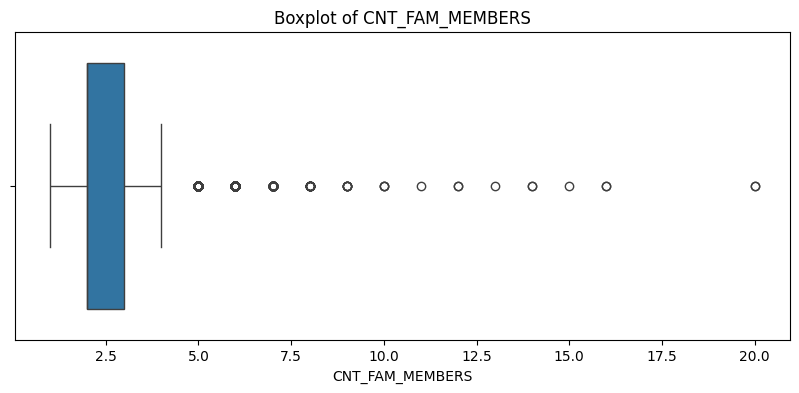

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=train['CNT_FAM_MEMBERS'])
plt.title('Boxplot of CNT_FAM_MEMBERS')
plt.show()

In [ ]:
# Hitung jumlah per CNT_FAM_MEMBERS
count_by_fam_members = train.groupby(['CNT_FAM_MEMBERS', 'TARGET'])['TARGET'].count()

# Hitung persentase per CNT_FAM_MEMBERS
percentage_by_fam_members = (count_by_fam_members / count_by_fam_members.groupby(level=0).sum()) * 100

# Gabungkan ke DataFrame hasil
result_fam_members_target = count_by_fam_members.to_frame('count').join(percentage_by_fam_members.to_frame('percentage'))

result_fam_members_target

count  percentage
CNT_FAM_MEMBERS TARGET                    
1.0             0        62172   91.635592
                1         5675    8.364408
2.0             0       146348   92.416502
                1        12009    7.583498
3.0             0        47993   91.239710
                1         4608    8.760290
4.0             0        22561   91.351176
                1         2136    8.648824
5.0             0         3151   90.598045
                1          327    9.401955
6.0             0          353   86.519608
                1           55   13.480392
7.0             0           75   92.592593
                1            6    7.407407
8.0             0           14   70.000000
                1            6   30.000000
9.0             0            6  100.000000
10.0            0            2   66.666667
                1            1   33.333333
11.0            1            1  100.000000
12.0            0            2  100.000000
13.0            1            1  100.000000
14.0            0            2  100.000000
15.0            0            1  100.000000
16.0            0            2  100.000000
20.0            0            2  100.000000

In [ ]:
# Hitung jumlah per CNT_FAM_MEMBERS
count_by_fam_members = train_with_previous_application.groupby(['CNT_FAM_MEMBERS', 'NAME_CONTRACT_STATUS'])['NAME_CONTRACT_STATUS'].count()

# Hitung persentase per CNT_FAM_MEMBERS
percentage_by_fam_members = (count_by_fam_members / count_by_fam_members.groupby(level=0).sum()) * 100

# Gabungkan ke DataFrame hasil
result_fam_members_ncs = count_by_fam_members.to_frame('count').join(percentage_by_fam_members.to_frame('percentage'))

result_fam_members_ncs

count  percentage
CNT_FAM_MEMBERS NAME_CONTRACT_STATUS                    
1.0             Approved              186037   61.453110
                Canceled               56890   18.792323
                Refused                54804   18.103260
                Unused offer            4999    1.651306
2.0             Approved              464847   62.174912
                Canceled              142241   19.025231
                Refused               130371   17.437577
                Unused offer           10185    1.362279
3.0             Approved              150428   64.517900
                Canceled               39337   16.871464
                Refused                38430   16.482456
                Unused offer            4962    2.128180
4.0             Approved               72666   65.109986
                Canceled               18011   16.138166
                Refused                18618   16.682048
                Unused offer            2310    2.069800
5.0             Approved               10528   65.184818
                Canceled                2614   16.184756
                Refused                 2739   16.958702
                Unused offer             270    1.671723
6.0             Approved                1226   65.772532
                Canceled                 278   14.914163
                Refused                  326   17.489270
                Unused offer              34    1.824034
7.0             Approved                 254   65.463918
                Canceled                  52   13.402062
                Refused                   75   19.329897
                Unused offer               7    1.804124
8.0             Approved                  61   66.304348
                Canceled                  10   10.869565
                Refused                   19   20.652174
                Unused offer               2    2.173913
9.0             Approved                  13   76.470588
                Canceled                   3   17.647059
                Refused                    1    5.882353
10.0            Approved                   7   77.777778
                Canceled                   1   11.111111
                Unused offer               1   11.111111
11.0            Approved                   3   50.000000
                Refused                    3   50.000000
12.0            Approved                  11   68.750000
                Canceled                   3   18.750000
                Refused                    2   12.500000
13.0            Approved                   1   33.333333
                Refused                    2   66.666667
14.0            Approved                   3   75.000000
                Canceled                   1   25.000000
15.0            Approved                   2  100.000000
16.0            Approved                   5  100.000000
20.0            Approved                   7   87.500000
                Unused offer               1   12.500000

### REGION_RATING_CLIENT_W_CITY

In [ ]:
# Hitung jumlah per REGION_RATING_CLIENT_W_CITY
count_by_rrcc = train.groupby(['REGION_RATING_CLIENT_W_CITY', 'TARGET'])['TARGET'].count()

# Hitung persentase per REGION_RATING_CLIENT_W_CITY
percentage_by_rrcc = (count_by_rrcc / count_by_rrcc.groupby(level=0).sum()) * 100

# Gabungkan ke DataFrame hasil
result_rrcc_target = count_by_rrcc.to_frame('count').join(percentage_by_rrcc.to_frame('percentage'))

result_rrcc_target

count  percentage
REGION_RATING_CLIENT_W_CITY TARGET                    
1                           0        32513   95.159072
                            1         1654    4.840928
2                           0       211314   92.082237
                            1        18170    7.917763
3                           0        38859   88.597811
                            1         5001   11.402189

Region city dengan rating 1 menunjukkan tingkat kemudahan pengembalian kredit yang lebih tinggi, yaitu sebesar 95.2%. Hal ini sesuai dengan makna dari rating 1 yang merepresentasikan risiko paling rendah.

In [ ]:
# Hitung jumlah per REGION_RATING_CLIENT_W_CITY
count_by_rrcs = train_with_previous_application.groupby(
    ['REGION_RATING_CLIENT_W_CITY', 'NAME_CONTRACT_STATUS']
)['NAME_CONTRACT_STATUS'].count()

# Hitung persentase per REGION_RATING_CLIENT_W_CITY
percentage_by_rrcs = (count_by_rrcs / count_by_rrcs.groupby(level=0).sum()) * 100

# Gabungkan hasil ke DataFrame
result_rrcs_ncs = count_by_rrcs.to_frame('count').join(
    percentage_by_rrcs.to_frame('percentage')
)

result_rrcs_ncs

count  percentage
REGION_RATING_CLIENT_W_CITY NAME_CONTRACT_STATUS                    
1                           Approved               89163   62.266404
                            Canceled               26622   18.591301
                            Refused                24721   17.263750
                            Unused offer            2690    1.878544
2                           Approved              672966   62.651026
                            Canceled              196917   18.332356
                            Refused               186682   17.379509
                            Unused offer           17585    1.637108
3                           Approved              123970   63.135647
                            Canceled               35902   18.284230
                            Refused                33987   17.308956
                            Unused offer            2496    1.271167

Region city dengan rating 1 walaupun tingkat pengembalian kredit tepat waktu lebih tinggi, tingkat approval nya lebih rendah sehingga Home Credit bisa mempertimbangkan lebih untuk bisa memberikan kredit terhadap region city dengan rating 1.

### REGION_POPULATION_RELATIVE

In [ ]:
import numpy as np
import pandas as pd

# Tentukan min & max dari kolom
min_val = train['REGION_POPULATION_RELATIVE'].min()
max_val = train['REGION_POPULATION_RELATIVE'].max()

# Buat bins dengan step 0.01
bins = np.arange(0, max_val + 0.01, 0.01)

# Buat label, contoh: 0.00–0.01, 0.01–0.02, dst.
labels = [f"{bins[i]:.2f}-{bins[i+1]:.2f}" for i in range(len(bins)-1)]

# Assign ke bin
train['RPR_BIN'] = pd.cut(train['REGION_POPULATION_RELATIVE'],
                          bins=bins,
                          labels=labels,
                          include_lowest=True)

# Hitung jumlah per bin & TARGET
count_by_rpr_bin = train.groupby(['RPR_BIN', 'TARGET'])['TARGET'].count()

# Hitung persentase per bin
percentage_by_rpr_bin = (count_by_rpr_bin / count_by_rpr_bin.groupby(level=0).sum()) * 100

# Gabungkan hasilnya
result_rpr_bin_target = count_by_rpr_bin.to_frame('count').join(
    percentage_by_rpr_bin.to_frame('percentage')
)

result_rpr_bin_target

/tmp/ipython-input-3390498025.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_by_rpr_bin = train.groupby(['RPR_BIN', 'TARGET'])['TARGET'].count()
/tmp/ipython-input-3390498025.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentage_by_rpr_bin = (count_by_rpr_bin / count_by_rpr_bin.groupby(level=0).sum()) * 100


count  percentage
RPR_BIN   TARGET                   
0.00-0.01 0       68041   91.255482
          1        6520    8.744518
0.01-0.02 0       89174   91.496173
          1        8288    8.503827
0.02-0.03 0       61410   91.511936
          1        5696    8.488064
0.03-0.04 0       43204   92.855915
          1        3324    7.144085
0.04-0.05 0       12779   95.067698
          1         663    4.932302
0.05-0.06 0           0         NaN
          1           0         NaN
0.06-0.07 0           0         NaN
          1           0         NaN
0.07-0.08 0        8078   96.029482
          1         334    3.970518

Peminjam yang tinggal di daerah yang lebih padat penduduk memiliki tingkat pengembalian kredit yang lebih tinggi. Selain itu, peminjam di daerah padat biasanya memiliki akses pekerjaan dan sumber penghasilan yang lebih stabil, sehingga kemampuan mereka untuk mengembalikan kredit tepat waktu juga lebih tinggi.



In [ ]:
# Buat bins 0.01
bins = np.arange(0, train_with_previous_application['REGION_POPULATION_RELATIVE'].max() + 0.01, 0.01)
labels = [f"{bins[i]:.2f}-{bins[i+1]:.2f}" for i in range(len(bins)-1)]

# Assign ke bin
train_with_previous_application['RPR_BIN'] = pd.cut(
    train_with_previous_application['REGION_POPULATION_RELATIVE'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Hitung jumlah per bin & NAME_CONTRACT_STATUS
count_by_rpr_bin = train_with_previous_application.groupby(
    ['RPR_BIN', 'NAME_CONTRACT_STATUS']
)['NAME_CONTRACT_STATUS'].count()

# Hitung persentase per bin
percentage_by_rpr_bin = (count_by_rpr_bin / count_by_rpr_bin.groupby(level=0).sum()) * 100

# Gabungkan hasil
result_rpr_bin_ncs = count_by_rpr_bin.to_frame('count').join(
    percentage_by_rpr_bin.to_frame('percentage')
)

result_rpr_bin_ncs


/tmp/ipython-input-2123504177.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_by_rpr_bin = train_with_previous_application.groupby(
/tmp/ipython-input-2123504177.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentage_by_rpr_bin = (count_by_rpr_bin / count_by_rpr_bin.groupby(level=0).sum()) * 100


count  percentage
RPR_BIN   NAME_CONTRACT_STATUS                    
0.00-0.01 Approved              207644   62.615230
          Canceled               62611   18.880402
          Refused                56373   16.999328
          Unused offer            4991    1.505040
0.01-0.02 Approved              284602   62.800540
          Canceled               83177   18.353914
          Refused                79124   17.459575
          Unused offer            6281    1.385971
0.02-0.03 Approved              207168   62.876689
          Canceled               57115   17.334734
          Refused                59016   17.911698
          Unused offer            6184    1.876880
0.03-0.04 Approved              131682   63.033488
          Canceled               38413   18.387520
          Refused                35121   16.811707
          Unused offer            3692    1.767285
0.04-0.05 Approved               34493   61.031194
          Canceled               11063   19.574641
          Refused                 9712   17.184210
          Unused offer            1249    2.209955
0.05-0.06 Approved                   0         NaN
          Canceled                   0         NaN
          Refused                    0         NaN
          Unused offer               0         NaN
0.06-0.07 Approved                   0         NaN
          Canceled                   0         NaN
          Refused                    0         NaN
          Unused offer               0         NaN
0.07-0.08 Approved               20510   60.341277
          Canceled                7062   20.776699
          Refused                 6044   17.781701
          Unused offer             374    1.100324

Penduduk yang tinggal di daerah yang lebih padat memiliki tingkat pengembalian yang paling tinggi (96.03%). Akan tetapi tingkat approval kredit relatif kurang tinggi (60.34%).

# Data Preparation

### Duplicate Check

In [ ]:
train.duplicated().sum()
previous_application.duplicated().sum()
bureau.duplicated().sum()

np.int64(0)

Tidak ada baris duplikat pada tiga dataset yang akan digunakan

### Check Missing Value

In [ ]:
# Hitung jumlah dan persentase missing value per kolom
missing_values = train.isnull().sum()
missing_percent = 100 * train.isnull().sum() / len(train)

# Gabungkan ke satu DataFrame untuk tampilan rapi
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percent Missing (%)': missing_percent
})

# Urutkan dari yang paling banyak missing
missing_summary_train = missing_summary.sort_values(by='Percent Missing (%)', ascending=False)

In [ ]:
missing_summary_train

Missing Values  Percent Missing (%)
COMMONAREA_MODE                       214865            69.872297
COMMONAREA_MEDI                       214865            69.872297
COMMONAREA_AVG                        214865            69.872297
NONLIVINGAPARTMENTS_MODE              213514            69.432963
NONLIVINGAPARTMENTS_AVG               213514            69.432963
NONLIVINGAPARTMENTS_MEDI              213514            69.432963
FONDKAPREMONT_MODE                    210295            68.386172
LIVINGAPARTMENTS_MEDI                 210199            68.354953
LIVINGAPARTMENTS_AVG                  210199            68.354953
LIVINGAPARTMENTS_MODE                 210199            68.354953
FLOORSMIN_AVG                         208642            67.848630
FLOORSMIN_MODE                        208642            67.848630
FLOORSMIN_MEDI                        208642            67.848630
YEARS_BUILD_MODE                      204488            66.497784
YEARS_BUILD_AVG                       204488            66.497784
YEARS_BUILD_MEDI                      204488            66.497784
OWN_CAR_AGE                           202929            65.990810
LANDAREA_MEDI                         182590            59.376738
LANDAREA_AVG                          182590            59.376738
LANDAREA_MODE                         182590            59.376738
BASEMENTAREA_MEDI                     179943            58.515956
BASEMENTAREA_MODE                     179943            58.515956
BASEMENTAREA_AVG                      179943            58.515956
EXT_SOURCE_1                          173378            56.381073
NONLIVINGAREA_AVG                     169682            55.179164
NONLIVINGAREA_MEDI                    169682            55.179164
NONLIVINGAREA_MODE                    169682            55.179164
ELEVATORS_MODE                        163891            53.295980
ELEVATORS_MEDI                        163891            53.295980
ELEVATORS_AVG                         163891            53.295980
WALLSMATERIAL_MODE                    156341            50.840783
APARTMENTS_MODE                       156061            50.749729
APARTMENTS_AVG                        156061            50.749729
APARTMENTS_MEDI                       156061            50.749729
ENTRANCES_MEDI                        154828            50.348768
ENTRANCES_AVG                         154828            50.348768
ENTRANCES_MODE                        154828            50.348768
LIVINGAREA_MODE                       154350            50.193326
LIVINGAREA_MEDI                       154350            50.193326
LIVINGAREA_AVG                        154350            50.193326
HOUSETYPE_MODE                        154297            50.176091
FLOORSMAX_MODE                        153020            49.760822
FLOORSMAX_AVG                         153020            49.760822
FLOORSMAX_MEDI                        153020            49.760822
YEARS_BEGINEXPLUATATION_MEDI          150007            48.781019
YEARS_BEGINEXPLUATATION_MODE          150007            48.781019
YEARS_BEGINEXPLUATATION_AVG           150007            48.781019
TOTALAREA_MODE                        148431            48.268517
EMERGENCYSTATE_MODE                   145755            47.398304
OCCUPATION_TYPE                        96391            31.345545
EXT_SOURCE_3                           60965            19.825307
AVG_DAYS_CREDIT                        44020            14.314935
AMT_REQ_CREDIT_BUREAU_HOUR             41519            13.501631
AMT_REQ_CREDIT_BUREAU_WEEK             41519            13.501631
AMT_REQ_CREDIT_BUREAU_MON              41519            13.501631
AMT_REQ_CREDIT_BUREAU_DAY              41519            13.501631
AMT_REQ_CREDIT_BUREAU_YEAR             41519            13.501631
AMT_REQ_CREDIT_BUREAU_QRT              41519            13.501631
NAME_TYPE_SUITE                         1292             0.420148
OBS_60_CNT_SOCIAL_CIRCLE                1021             0.332021
OBS_

In [ ]:
# Ambil daftar kolom yang memiliki kurang dari 40% missing value
cols_to_keep = missing_summary_train[missing_summary_train['Percent Missing (%)'] < 40].index

# Tampilkan dataframe train hanya dengan kolom-kolom tersebut
train = train[cols_to_keep]

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 80 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   OCCUPATION_TYPE              211120 non-null  object  
 1   EXT_SOURCE_3                 246546 non-null  float64 
 2   AVG_DAYS_CREDIT              263491 non-null  float64 
 3   AMT_REQ_CREDIT_BUREAU_HOUR   265992 non-null  float64 
 4   AMT_REQ_CREDIT_BUREAU_WEEK   265992 non-null  float64 
 5   AMT_REQ_CREDIT_BUREAU_MON    265992 non-null  float64 
 6   AMT_REQ_CREDIT_BUREAU_DAY    265992 non-null  float64 
 7   AMT_REQ_CREDIT_BUREAU_YEAR   265992 non-null  float64 
 8   AMT_REQ_CREDIT_BUREAU_QRT    265992 non-null  float64 
 9   NAME_TYPE_SUITE              306219 non-null  object  
 10  OBS_60_CNT_SOCIAL_CIRCLE     306490 non-null  float64 
 11  OBS_30_CNT_SOCIAL_CIRCLE     306490 non-null  float64 
 12  DEF_60_CNT_SOCIAL_CIRCLE     306490 non-null

In [ ]:
train

OCCUPATION_TYPE  EXT_SOURCE_3  AVG_DAYS_CREDIT  \
0             Laborers      0.139376      -874.000000   
1           Core staff           NaN     -1400.750000   
2             Laborers      0.729567      -867.000000   
3             Laborers           NaN              NaN   
4           Core staff           NaN     -1149.000000   
...                ...           ...              ...   
307506     Sales staff           NaN              NaN   
307507             NaN           NaN              NaN   
307508        Managers      0.218859      -867.500000   
307509        Laborers      0.661024     -1104.000000   
307510        Laborers      0.113922     -1089.454545   

        AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                              0.0                         0.0   
1                              0.0                         0.0   
2                              0.0                         0.0   
3                              NaN                         NaN   
4                              0.0                         0.0   
...                            ...                         ...   
307506                         NaN                         NaN   
307507                         NaN                         NaN   
307508                         1.0                         0.0   
307509                         0.0                         0.0   
307510                         0.0                         0.0   

        AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_DAY  \
0                             0.0                        0.0   
1                             0.0                        0.0   
2                             0.0                        0.0   
3                             NaN                        NaN   
4                             0.0                        0.0   
...                           ...                        ...   
307506                        NaN                        NaN   
307507                        NaN                        NaN   
307508                        1.0                        0.0   
307509                        0.0                        0.0   
307510                        2.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_QRT NAME_TYPE_SUITE  \
0                              1.0                        0.0   Unaccompanied   
1                              0.0                        0.0          Family   
2                              0.0                        0.0   Unaccompanied   
3                              NaN                        NaN   Unaccompanied   
4                              0.0                        0.0   Unaccompanied   
...                            ...                        ...             ...   
307506                         NaN                        NaN   Unaccompanied   
307507                         NaN                        NaN   Unaccompanied   
307508                         1.0                        0.0   Unaccompanied   
307509                         0.0                        0.0   Unaccompanied   
307510                         1.0                        0.0   Unaccompanied   

        OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE  \
0                            2.0                       2.0   
1                            1.0                       1.0   
2                            0.0                       0.0   
3                            2.0                       2.0   
4                            0.0                       0.0   
...                          ...                       ...   
307506                       0.0                       0.0   
307507                       0.0                       0.0   
307508                       6.0                       6.0   
307509                       0.0                       0.0   
307510                       0.0                       0.0   

        DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_C

Fill CNT_FAM_MEMBERS

In [ ]:
filtered_train = train.dropna(subset=['CNT_FAM_MEMBERS'])

avg_cnt_fam_members = filtered_train['CNT_FAM_MEMBERS'].mean()
avg_cnt_children = filtered_train['CNT_CHILDREN'].mean()

print(f"Average CNT_FAM_MEMBERS (excluding NaN): {avg_cnt_fam_members:.2f}")
print(f"Average CNT_CHILDREN (for non-NaN CNT_FAM_MEMBERS): {avg_cnt_children:.2f}")

Average CNT_FAM_MEMBERS (excluding NaN): 2.15
Average CNT_CHILDREN (for non-NaN CNT_FAM_MEMBERS): 0.42


Rata-rata selisih jumlah anggota keluarga dan jumlah anak peminjam yaitu 1.73. mendekati 2

In [ ]:
# Isi nilai Null pada CNT_FAM_MEMBERS dengan menambahkan CNT_CHILDREN dengan 2
train['CNT_FAM_MEMBERS'] = train['CNT_FAM_MEMBERS'].fillna(train['CNT_CHILDREN'] + 2)

/tmp/ipython-input-1777934201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['CNT_FAM_MEMBERS'] = train['CNT_FAM_MEMBERS'].fillna(train['CNT_CHILDREN'] + 2)


AVG_DAYS_CREDIT

In [ ]:
# Generate SK_ID_CURR yang tidak memiliki riwayat pinjaman di biro kredit

sk_id_curr_with_nan_avg_days_credit = train[train['AVG_DAYS_CREDIT'].isnull()]['SK_ID_CURR']
display(sk_id_curr_with_nan_avg_days_credit)

3         100006
9         100012
14        100018
17        100021
20        100024
           ...  
307484    456228
307501    456245
307504    456248
307506    456251
307507    456252
Name: SK_ID_CURR, Length: 44020, dtype: int64

Buat kolom baru `train['HAS_CREDIT_BUREAU']`: isi dengan 0 jika train`['AVG_DAYS_CREDIT']` bernilai NaN, dan isi dengan 1 jika train`['AVG_DAYS_CREDIT']` memiliki nilai.

Untuk AVG_DAYS_CREDIT, isi nilai Null dengan nilai maksimum. Peminjam yang belum pernah meminjam di tempat lain dianggap memiliki hari terakhir peminjaman sama dengan peminjam dengan riwayat peminjaman terlama di biro kredit lain.

In [ ]:
# Buat kolom baru yaitu train['HAS_CREDIT_BUREAU'] = 1, kalau train['AVG_DAYS_CREDIT'] = NaN, buat train['HAS_CREDIT_BUREAU'] = 0, kalau train['AVG_DAYS_CREDIT'] terdapat nilai

train['HAS_CREDIT_BUREAU'] = train['AVG_DAYS_CREDIT'].notna().astype(int)

train['AVG_DAYS_CREDIT'] = train['AVG_DAYS_CREDIT'].fillna(train['AVG_DAYS_CREDIT'].min())

/tmp/ipython-input-1438307750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['HAS_CREDIT_BUREAU'] = train['AVG_DAYS_CREDIT'].notna().astype(int)
/tmp/ipython-input-1438307750.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['AVG_DAYS_CREDIT'] = train['AVG_DAYS_CREDIT'].fillna(train['AVG_DAYS_CREDIT'].min())


### Column Selection

Eliminasi variabel yang kontribusinya terhadap model prediksi dianggap minimal atau tidak signifikan.

In [ ]:
# Daftar keyword yang ingin dieliminasi
keywords = [
    'AMT_REQ_CREDIT', 'CNT_SOCIAL_CIRCLE', 'EXT_SOURCE', 'AMT_GOODS_PRICE',
    'AMT_ANNUITY', 'NOT_WORK_REGION', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
    'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'PROCESS_START', 'ORGANIZATION_TYPE',
    'NOT_LIVE_REGION', 'NOT_LIVE_CITY', 'NOT_WORK_CITY', 'AVG', 'MODE', 'MEDI',
    'DAYS_LAST_PHONE_CHANGE', 'FLAG', 'NAME_TYPE_SUITE', 'OCCUPATION TYPE', 'INCOME_BIN',
    'CREDIT_BIN', 'CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
    'NAME_EDUCATION_TYPE', 'NAME_CONTRACT_TYPE', 'OCCUPATION_TYPE', 'SK_ID_CURR','AGE'
]

cols_to_drop = []

for col in train.columns:
    for kw in keywords:
        if kw in col:
            # pengecualian khusus: AVG tapi bukan AVG_DAYS_CREDIT
            if kw == "AVG" and col == "AVG_DAYS_CREDIT":
                continue  # jangan hapus
            cols_to_drop.append(col)
            break

# Drop kolom-kolom tersebut
train = train.drop(cols_to_drop, axis=1)

train.columns

Index(['AVG_DAYS_CREDIT', 'CNT_FAM_MEMBERS', 'AMT_CREDIT', 'AMT_INCOME_TOTAL',
       'CNT_CHILDREN', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'TARGET',
       'EDUCATION_LEVEL', 'RPR_BIN', 'HAS_CREDIT_BUREAU'],
      dtype='object')

In [ ]:
train

AVG_DAYS_CREDIT  CNT_FAM_MEMBERS  AMT_CREDIT  AMT_INCOME_TOTAL  \
0           -874.000000              1.0    406597.5          202500.0   
1          -1400.750000              2.0   1293502.5          270000.0   
2           -867.000000              1.0    135000.0           67500.0   
3          -2922.000000              2.0    312682.5          135000.0   
4          -1149.000000              1.0    513000.0          121500.0   
...                 ...              ...         ...               ...   
307506     -2922.000000              1.0    254700.0          157500.0   
307507     -2922.000000              1.0    269550.0           72000.0   
307508      -867.500000              1.0    677664.0          153000.0   
307509     -1104.000000              2.0    370107.0          171000.0   
307510     -1089.454545              2.0    675000.0          157500.0   

        CNT_CHILDREN  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0                  0                    0.018801       -9461   
1                  0                    0.003541      -16765   
2                  0                    0.010032      -19046   
3                  0                    0.008019      -19005   
4                  0                    0.028663      -19932   
...              ...                         ...         ...   
307506             0                    0.032561       -9327   
307507             0                    0.025164      -20775   
307508             0                    0.005002      -14966   
307509             0                    0.005313      -11961   
307510             0                    0.046220      -16856   

        REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  TARGET  \
0                          2                            2       1   
1                          1                            1       0   
2                          2                            2       0   
3                          2                            2       0   
4                          2                            2       0   
...                      ...                          ...     ...   
307506                     1                            1       0   
307507                     2                            2       0   
307508                     3                            3       0   
307509                     2                            2       1   
307510                     1                            1       0   

         EDUCATION_LEVEL    RPR_BIN  HAS_CREDIT_BUREAU  
0        Lower Education  0.01-0.02                  1  
1       Higher Education  0.00-0.01                  1  
2        Lower Education  0.01-0.02                  1  
3        Lower Education  0.00-0.01                  0  
4        Lower Education  0.02-0.03                  1  
...                  ...        ...                ...  
307506   Lower Education  0.03-0.04                  0  
307507   Lower Education  0.02-0.03                  0  
307508  Higher Education  0.00-0.01                  1  
307509   Lower Education  0.00-0.01                  1  
307510  Higher Education  0.04-0.05                  1  

[307511 rows x 13 columns]

In [ ]:
train.isnull().sum()

AVG_DAYS_CREDIT                0
CNT_FAM_MEMBERS                0
AMT_CREDIT                     0
AMT_INCOME_TOTAL               0
CNT_CHILDREN                   0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
TARGET                         0
EDUCATION_LEVEL                0
RPR_BIN                        0
HAS_CREDIT_BUREAU              0
dtype: int64

### Distribution Analysis

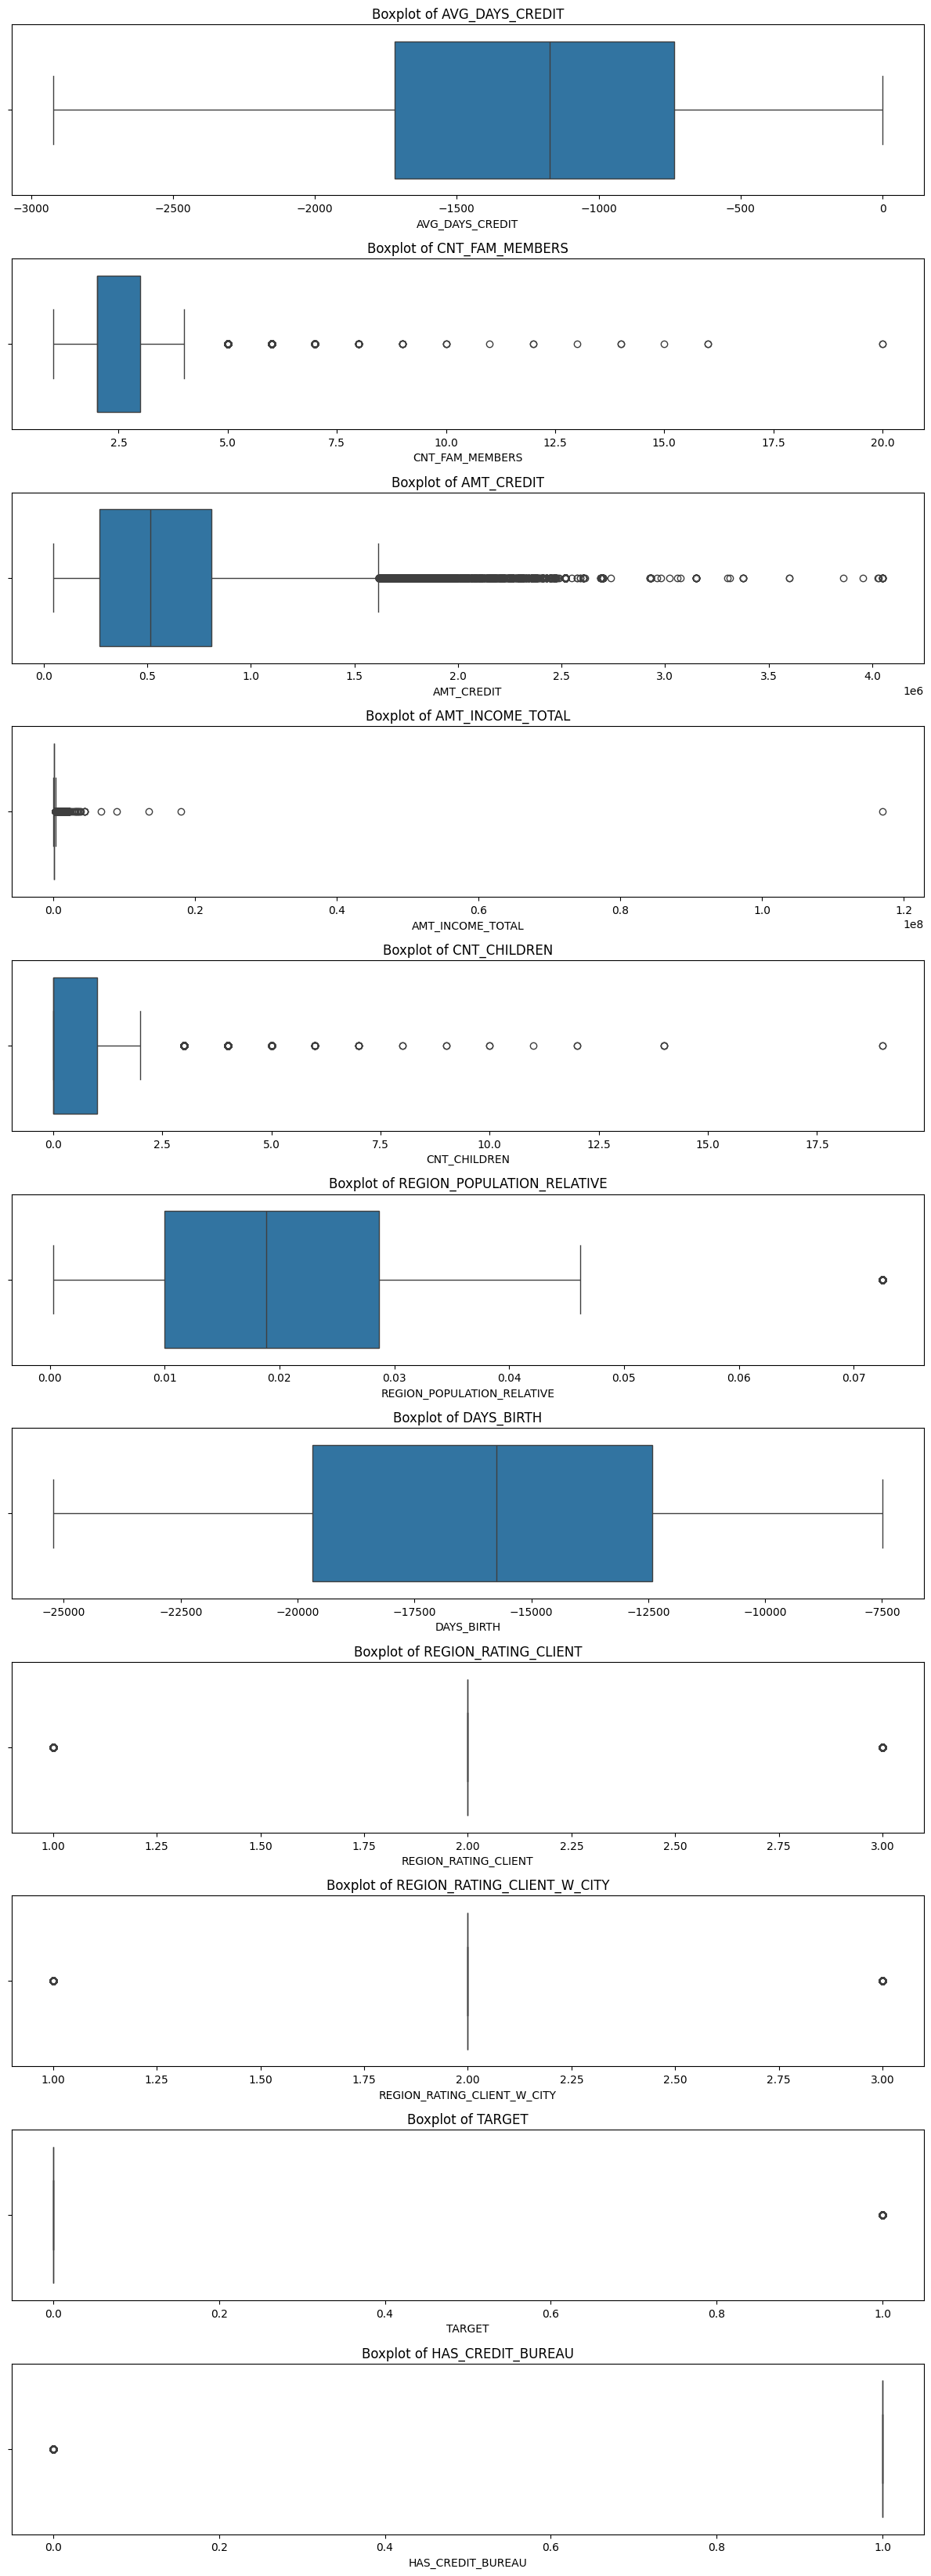

In [ ]:
# pilih hanya kolom numerik
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns

# set ukuran figure
plt.figure(figsize=(12, len(numeric_cols)*3))

# loop untuk tiap kolom numerik
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 1, i+1)
    sns.boxplot(x=train[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

Kita ingin tetap memasukkan semua nilainya termasuk nilai outliernya.

Karena sebagian besar fitur memiliki banyak outlier, kita tetap ingin memasukkan semua nilai (termasuk outlier). Maka paling cocok menggunakan RobustScaler — dengan tujuan membuat skala antar-fitur jadi sebanding, sehingga model ML tidak “mengira” fitur dengan nilai besar punya pengaruh jauh lebih besar.

In [ ]:
# print(f"Shape of train before elimination: {train.shape}")

# train = train[train['AMT_INCOME_TOTAL'] <= 20000000]

# print(f"Shape of train after elimination: {train.shape}")
# display(train.head())

In [ ]:
train

AVG_DAYS_CREDIT  CNT_FAM_MEMBERS  AMT_CREDIT  AMT_INCOME_TOTAL  \
0           -874.000000              1.0    406597.5          202500.0   
1          -1400.750000              2.0   1293502.5          270000.0   
2           -867.000000              1.0    135000.0           67500.0   
3          -2922.000000              2.0    312682.5          135000.0   
4          -1149.000000              1.0    513000.0          121500.0   
...                 ...              ...         ...               ...   
307506     -2922.000000              1.0    254700.0          157500.0   
307507     -2922.000000              1.0    269550.0           72000.0   
307508      -867.500000              1.0    677664.0          153000.0   
307509     -1104.000000              2.0    370107.0          171000.0   
307510     -1089.454545              2.0    675000.0          157500.0   

        CNT_CHILDREN  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0                  0                    0.018801       -9461   
1                  0                    0.003541      -16765   
2                  0                    0.010032      -19046   
3                  0                    0.008019      -19005   
4                  0                    0.028663      -19932   
...              ...                         ...         ...   
307506             0                    0.032561       -9327   
307507             0                    0.025164      -20775   
307508             0                    0.005002      -14966   
307509             0                    0.005313      -11961   
307510             0                    0.046220      -16856   

        REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  TARGET  \
0                          2                            2       1   
1                          1                            1       0   
2                          2                            2       0   
3                          2                            2       0   
4                          2                            2       0   
...                      ...                          ...     ...   
307506                     1                            1       0   
307507                     2                            2       0   
307508                     3                            3       0   
307509                     2                            2       1   
307510                     1                            1       0   

         EDUCATION_LEVEL    RPR_BIN  HAS_CREDIT_BUREAU  
0        Lower Education  0.01-0.02                  1  
1       Higher Education  0.00-0.01                  1  
2        Lower Education  0.01-0.02                  1  
3        Lower Education  0.00-0.01                  0  
4        Lower Education  0.02-0.03                  1  
...                  ...        ...                ...  
307506   Lower Education  0.03-0.04                  0  
307507   Lower Education  0.02-0.03                  0  
307508  Higher Education  0.00-0.01                  1  
307509   Lower Education  0.00-0.01                  1  
307510  Higher Education  0.04-0.05                  1  

[307511 rows x 13 columns]

### Encoding

In [ ]:
# 1. Definisikan urutan kategori dan nilai numeriknya (Mapping)
#    - Angka 0 untuk 'Lower Education' dan 1 untuk 'Higher Education'
education_order = {
    'Lower Education': 0,
    'Higher Education': 1
}

# 2. Terapkan mapping ke kolom
train['EDUCATION_LEVEL_Encoded'] = train['EDUCATION_LEVEL'].map(education_order)

# 3. Hapus kolom asli yang sudah di-encode
train = train.drop('EDUCATION_LEVEL', axis=1)

print("Tingkat Pendidikan sudah di-encode. Kolom baru: EDUCATION_LEVEL_Encoded")
print("\nDataFrame setelah Encoding:")
print(train.head())

Tingkat Pendidikan sudah di-encode. Kolom baru: EDUCATION_LEVEL_Encoded

DataFrame setelah Encoding:
   AVG_DAYS_CREDIT  CNT_FAM_MEMBERS  AMT_CREDIT  AMT_INCOME_TOTAL  \
0          -874.00              1.0    406597.5          202500.0   
1         -1400.75              2.0   1293502.5          270000.0   
2          -867.00              1.0    135000.0           67500.0   
3         -2922.00              2.0    312682.5          135000.0   
4         -1149.00              1.0    513000.0          121500.0   

   CNT_CHILDREN  REGION_POPULATION_RELATIVE  DAYS_BIRTH  REGION_RATING_CLIENT  \
0             0                    0.018801       -9461                     2   
1             0                    0.003541      -16765                     1   
2             0                    0.010032      -19046                     2   
3             0                    0.008019      -19005                     2   
4             0                    0.028663      -19932                     2  

In [ ]:
train

AVG_DAYS_CREDIT  CNT_FAM_MEMBERS  AMT_CREDIT  AMT_INCOME_TOTAL  \
0           -874.000000              1.0    406597.5          202500.0   
1          -1400.750000              2.0   1293502.5          270000.0   
2           -867.000000              1.0    135000.0           67500.0   
3          -2922.000000              2.0    312682.5          135000.0   
4          -1149.000000              1.0    513000.0          121500.0   
...                 ...              ...         ...               ...   
307506     -2922.000000              1.0    254700.0          157500.0   
307507     -2922.000000              1.0    269550.0           72000.0   
307508      -867.500000              1.0    677664.0          153000.0   
307509     -1104.000000              2.0    370107.0          171000.0   
307510     -1089.454545              2.0    675000.0          157500.0   

        CNT_CHILDREN  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0                  0                    0.018801       -9461   
1                  0                    0.003541      -16765   
2                  0                    0.010032      -19046   
3                  0                    0.008019      -19005   
4                  0                    0.028663      -19932   
...              ...                         ...         ...   
307506             0                    0.032561       -9327   
307507             0                    0.025164      -20775   
307508             0                    0.005002      -14966   
307509             0                    0.005313      -11961   
307510             0                    0.046220      -16856   

        REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  TARGET    RPR_BIN  \
0                          2                            2       1  0.01-0.02   
1                          1                            1       0  0.00-0.01   
2                          2                            2       0  0.01-0.02   
3                          2                            2       0  0.00-0.01   
4                          2                            2       0  0.02-0.03   
...                      ...                          ...     ...        ...   
307506                     1                            1       0  0.03-0.04   
307507                     2                            2       0  0.02-0.03   
307508                     3                            3       0  0.00-0.01   
307509                     2                            2       1  0.00-0.01   
307510                     1                            1       0  0.04-0.05   

        HAS_CREDIT_BUREAU  EDUCATION_LEVEL_Encoded  
0                       1                        0  
1                       1                        1  
2                       1                        0  
3                       0                        0  
4                       1                        0  
...                   ...                      ...  
307506                  0                        0  
307507                  0                        0  
307508                  1                        1  
307509                  1                        0  
307510                  1                        1  

[307511 rows x 13 columns]

In [ ]:
train = train.drop('RPR_BIN', axis=1)

### Correlation Check

Kita perlu memeriksa tingkat hubungan antar variabel numerik untuk memastikan tidak ada pasangan variabel yang memiliki korelasi sangat tinggi. Korelasi yang terlalu tinggi menunjukkan bahwa dua variabel tersebut sebenarnya memuat informasi yang hampir sama, sehingga salah satunya dapat dianggap sudah terwakili oleh variabel lain.

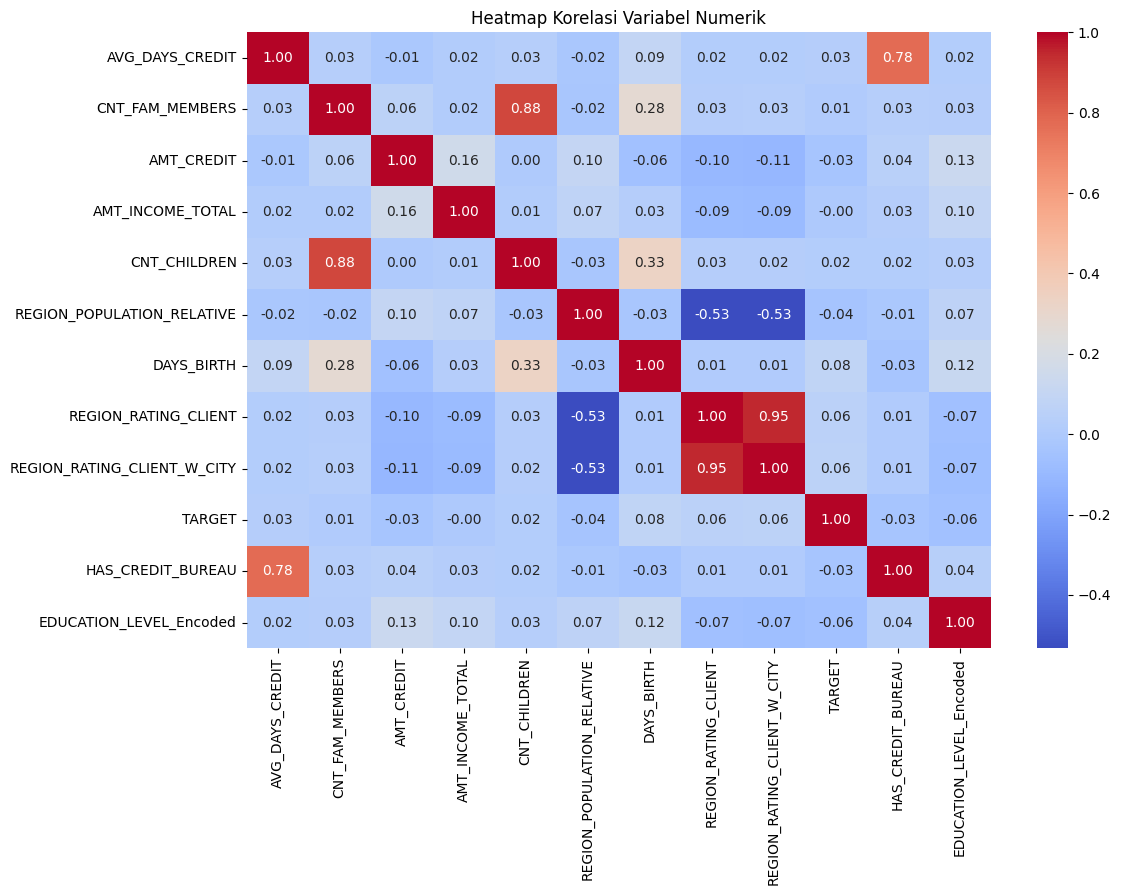

In [ ]:
# 1. Hitung korelasi antar kolom numerik
corr = train.corr()

# 2. Buat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap Korelasi Variabel Numerik")
plt.show()

Terdapat beberapa variabel dengan korelasi cukup tinggi (di atas 0.7) yang berpotensi menyebabkan multikolinearitas, yaitu kondisi di mana dua variabel memberikan informasi yang mirip, yang dapat menjadi masalah jika menggunakan model linear seperti Logistic Regression.

`REGION_RATING_CLIENT_W_CITY` dan `REGION_RATING_CLIENT` memiliki korelasi cukup tinggi yaitu 0.95 dan masing-masing fitur memiliki korelasi 0.06 terhadap target. Kita pertahankan fitur `REGION_RATING_CLIENT_W_CITY` karena mmberi informasi yang lebih spesifik yaitu region beserta city.

`HAS_CREDIT_BUREAU` dan `AVG_DAYS_CREDIT` memiliki korelasi cukup tinggi, yaitu 0.78. Korelasi `HAS_CREDIT_BUREAU` dengan `TARGET` adalah -0.03, sedangkan `AVG_DAYS_CREDIT` dengan `TARGET` adalah 0.03. Karena besar absolut korelasi terhadap `TARGET` sama, dipilih `AVG_DAYS_CREDIT` karena memberikan informasi lebih spesifik mengenai berapa hari terakhir peminjaman.

`CNT_CHILDREN` dan `CNT_FAM_MEMBERS` memiliki korelasi 0.88. Korelasi `CNT_CHILDREN` dengan `TARGET` adalah 0.02, sedangkan `CNT_FAM_MEMBERS` dengan `TARGET` adalah 0.01. Variabel yang dipilih adalah `CNT_CHILDREN` karena memiliki korelasi sedikit lebih tinggi terhadap `TARGET`.

In [ ]:
train = train.drop(['HAS_CREDIT_BUREAU', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT'], axis=1)
display(train.head())

AVG_DAYS_CREDIT  AMT_CREDIT  AMT_INCOME_TOTAL  CNT_CHILDREN  \
0          -874.00    406597.5          202500.0             0   
1         -1400.75   1293502.5          270000.0             0   
2          -867.00    135000.0           67500.0             0   
3         -2922.00    312682.5          135000.0             0   
4         -1149.00    513000.0          121500.0             0   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  REGION_RATING_CLIENT_W_CITY  \
0                    0.018801       -9461                            2   
1                    0.003541      -16765                            1   
2                    0.010032      -19046                            2   
3                    0.008019      -19005                            2   
4                    0.028663      -19932                            2   

   TARGET  EDUCATION_LEVEL_Encoded  
0       1                        0  
1       0                        1  
2       0                        0  
3       0                        0  
4       0                        0

In [ ]:
train.dtypes

AVG_DAYS_CREDIT                float64
AMT_CREDIT                     float64
AMT_INCOME_TOTAL               float64
CNT_CHILDREN                     int64
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
REGION_RATING_CLIENT_W_CITY      int64
TARGET                           int64
EDUCATION_LEVEL_Encoded          int64
dtype: object

### Handling Unbalance Data

Target yang oversampling (1) ditangani dengan teknik SMOTE agar model tidak cenderung memprediksi target 1.

Metode SMOTE akan menambahkan data minoritas dengan cara mengambil setiap data target dan mencari beberapa nilai data target terdekat setelah itu membuat data baru yang nilainya diantara kedua data tersebut.

Reference: https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/

In [ ]:
vc = train['TARGET'].value_counts()

df = pd.DataFrame({
    'count_by_gender': vc,
    'percentage': train['TARGET'].value_counts(normalize=True) * 100
})

df

count_by_gender  percentage
TARGET                             
0                282686   91.927118
1                 24825    8.072882

In [ ]:
from imblearn.over_sampling import SMOTE

# Separate features (X) and target (y)
X = train.drop('TARGET', axis=1)
y = train['TARGET']

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

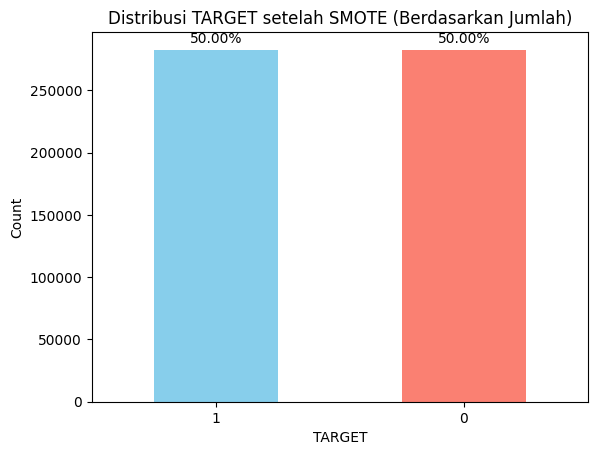

In [ ]:
# Hitung count dan persentase setelah SMOTE
vc_res = y_res.value_counts()
df_res = pd.DataFrame({
    'count': vc_res,
    'percentage': vc_res / vc_res.sum() * 100
})

# Plot bar chart dengan sumbu y menggunakan 'count'
ax = df_res['count'].plot(kind='bar', color=['skyblue', 'salmon'])

# Menambahkan label persentase di atas batang
for i, row in df_res.iterrows():
    ax.text(i, row['count'] + (row['count'] * 0.01), f"{row['percentage']:.2f}%", ha='center', va='bottom', color='black')

plt.title("Distribusi TARGET setelah SMOTE (Berdasarkan Jumlah)")
plt.ylabel("Count")
plt.xticks(rotation=0)  # biar label 0 dan 1 tidak miring
plt.show()

In [ ]:
X_res # Dataset hasil penambahan target undersampling

AVG_DAYS_CREDIT    AMT_CREDIT  AMT_INCOME_TOTAL  CNT_CHILDREN  \
0           -874.000000  4.065975e+05     202500.000000             0   
1          -1400.750000  1.293502e+06     270000.000000             0   
2           -867.000000  1.350000e+05      67500.000000             0   
3          -2922.000000  3.126825e+05     135000.000000             0   
4          -1149.000000  5.130000e+05     121500.000000             0   
...                 ...           ...               ...           ...   
565367      -303.837394  2.192128e+05     112500.000000             1   
565368      -401.962446  6.710081e+05     161230.793625             0   
565369     -1172.241893  6.208272e+05      67500.000000             1   
565370     -1525.635004  3.712550e+05     225000.000000             1   
565371      -740.486478  2.547000e+05     225000.000000             0   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  REGION_RATING_CLIENT_W_CITY  \
0                         0.018801       -9461                            2   
1                         0.003541      -16765                            1   
2                         0.010032      -19046                            2   
3                         0.008019      -19005                            2   
4                         0.028663      -19932                            2   
...                            ...         ...                          ...   
565367                    0.024989       -9752                            2   
565368                    0.017549      -10326                            2   
565369                    0.020757      -13312                            2   
565370                    0.010018      -12649                            1   
565371                    0.008813      -18821                            2   

        EDUCATION_LEVEL_Encoded  
0                             0  
1                             1  
2                             0  
3                             0  
4                             0  
...                         ...  
565367                        0  
565368                        0  
565369                        0  
565370                        0  
565371                        0  

[565372 rows x 8 columns]

In [ ]:
y_res

0         1
1         0
2         0
3         0
4         0
         ..
565367    1
565368    1
565369    1
565370    1
565371    1
Name: TARGET, Length: 565372, dtype: int64

In [ ]:
pd.concat([X_res, y_res], axis=1)

AVG_DAYS_CREDIT    AMT_CREDIT  AMT_INCOME_TOTAL  CNT_CHILDREN  \
0           -874.000000  4.065975e+05     202500.000000             0   
1          -1400.750000  1.293502e+06     270000.000000             0   
2           -867.000000  1.350000e+05      67500.000000             0   
3          -2922.000000  3.126825e+05     135000.000000             0   
4          -1149.000000  5.130000e+05     121500.000000             0   
...                 ...           ...               ...           ...   
565367      -303.837394  2.192128e+05     112500.000000             1   
565368      -401.962446  6.710081e+05     161230.793625             0   
565369     -1172.241893  6.208272e+05      67500.000000             1   
565370     -1525.635004  3.712550e+05     225000.000000             1   
565371      -740.486478  2.547000e+05     225000.000000             0   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  REGION_RATING_CLIENT_W_CITY  \
0                         0.018801       -9461                            2   
1                         0.003541      -16765                            1   
2                         0.010032      -19046                            2   
3                         0.008019      -19005                            2   
4                         0.028663      -19932                            2   
...                            ...         ...                          ...   
565367                    0.024989       -9752                            2   
565368                    0.017549      -10326                            2   
565369                    0.020757      -13312                            2   
565370                    0.010018      -12649                            1   
565371                    0.008813      -18821                            2   

        EDUCATION_LEVEL_Encoded  TARGET  
0                             0       1  
1                             1       0  
2                             0       0  
3                             0       0  
4                             0       0  
...                         ...     ...  
565367                        0       1  
565368                        0       1  
565369                        0       1  
565370                        0       1  
565371                        0       1  

[565372 rows x 9 columns]

### Feature Scaling

Feature scaling atau normalisasi data adalah proses mengubah nilai-nilai fitur numerik dalam dataset agar keseluruhan fitur yang diubah memiliki nilai-nilai yang sama atau serupa. Tujuannya untuk membuat setiap fitur adil kontribusinya: fitur dengan rentang besar tidak otomatis mendominasi dan sebaliknya saat model data dilatih.

Scaler
---  -------------------------------  ---------------------------------------------------------------------------------------------------


Cara kerja/transformasi
---  -------------------------------  ---------------------------------------------------------------------------------------------------

Num | Scaler                           | Cara kerja/transformasi                                                                                          
------|----------------------------------|------------------------------------------------------------------------------------------------------
1     | `StandardScaler`             | Mengurangi mean (rata-rata) kolom ke 0, lalu membagi dengan standar deviasi. Sehingga data baru memiliki mean ≈ 0 dan standar deviasi ≈ 1.                       
2     | `MinMaxScaler`                 | Mengubah skala data agar berada dalam rentang tertentu (default: [0, 1]). Rumus: (x — min) / (max — min), sehingga minimum => 0, maksimum => 1.             
3    | `RobustScaler`      | Mengurangi median kolom, lalu membagi dengan Interquartile Range (IQR = Q3 − Q1). Sehingga scaling tidak terlalu terpengaruh outlier.   

Use-Case
---  -------------------------------  ---------------------------------------------------------------------------------------------------

Num | Scaler                           | Use-Case                                                                                         
------|----------------------------------|------------------------------------------------------------------------------------------------------
1     | `StandardScaler`             | Data fitur kira-kira berdistribusi normal.dan standar deviasi ≈ 1.                       
2     | `MinMaxScaler`                 | Data yang tidak mengikuti distribusi normal atau distribusinya arbitrary.        
3    | `RobustScaler`      | Data yang mengandung outlier atau pencilan ekstrem (misalnya nilai keuangan, sensor, data real-world).


Referensi:

https://www.geeksforgeeks.org/machine-learning/standardscaler-minmaxscaler-and-robustscaler-techniques-ml/?utm_source=chatgpt.com



In [ ]:
# Memilih metode normalisasi data yang tepat
from scipy.stats import shapiro, skew

def determine_scaler(data, column_name):
    # Pedtorm Shapiro-Wilk test for normality and calculate skewness
    stat, p_value = shapiro(data[column_name])
    skewness = skew(data[column_name])

    # Print results for debugging
    print(f"{column_name} - Shapiro-Wilk Test: Statistic={stat}, p-value={p_value}")
    print(f"{column_name} - Skewness: {skewness}")

    # Determine which scaler to use
    if p_value > 0.05 and -0.5 <= skewness <= 0.5:
        scaler = "StandardScaler"
    elif p_value < 0.05 and (-1 <= skewness < -0.5 or 0.5 < skewness <= 1):
        scaler = "MinMaxScaler"
    elif p_value < 0.05 and (skewness < -1 or skewness > 1):
        scaler = "RobustScaler"
    else:
        scaler = "Not determined"

    return scaler

# List kolom numerik yang ingin diperiksa
columns_to_check = [
    'CNT_CHILDREN',
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'REGION_POPULATION_RELATIVE',
    'DAYS_BIRTH',
    'REGION_RATING_CLIENT_W_CITY',
    'EDUCATION_LEVEL_Encoded'
]

# Jalankan determine_scaler untuk tiap kolom
for col in columns_to_check:
    scaler_name = determine_scaler(train, col)
    print(f"Recommended Scaler for {col}: {scaler_name}\n")

CNT_CHILDREN - Shapiro-Wilk Test: Statistic=0.6200542696929001, p-value=3.796144175043529e-179
CNT_CHILDREN - Skewness: 1.9745948378093714
Recommended Scaler for CNT_CHILDREN: RobustScaler

AMT_INCOME_TOTAL - Shapiro-Wilk Test: Statistic=0.13755146907218285, p-value=4.1651896346211133e-209
AMT_INCOME_TOTAL - Skewness: 391.55774412283097
Recommended Scaler for AMT_INCOME_TOTAL: RobustScaler

AMT_CREDIT - Shapiro-Wilk Test: Statistic=0.90547727640297, p-value=1.1800159524929333e-133
AMT_CREDIT - Skewness: 1.234772474032497
Recommended Scaler for AMT_CREDIT: RobustScaler

REGION_POPULATION_RELATIVE - Shapiro-Wilk Test: Statistic=0.8767386321837201, p-value=8.144800117664769e-142
REGION_POPULATION_RELATIVE - Skewness: 1.4880012623794292
Recommended Scaler for REGION_POPULATION_RELATIVE: RobustScaler

DAYS_BIRTH - Shapiro-Wilk Test: Statistic=0.9696564518865336, p-value=1.7093576641658382e-101
DAYS_BIRTH - Skewness: -0.11567274746102389
Recommended Scaler for DAYS_BIRTH: Not determined

REG

/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 307511.
  res = hypotest_fun_out(*samples, **kwds)


# Modelling (tanpa Hyperparameter Tuning)

## Logistic Regression

Karena Logistic Regression pakai metode optimisasi (seperti gradient descent), melakukan scaling data penting agar semua fitur “bermain di skala yang sama”, sehingga model bisa belajar lebih cepat dan tidak bias ke fitur yang nilainya besar.

Sebagian besar fitur paling cocok menggunakan metode RobustScaler sehingga kita menggunakan metode normalisasi data tersebut.

In [ ]:
# Split dulu
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

# Fit scaler hanya di train
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)  # transform test dengan scaler train

In [ ]:
X_train_raw

AVG_DAYS_CREDIT    AMT_CREDIT  AMT_INCOME_TOTAL  CNT_CHILDREN  \
490359     -2922.000000  2.423823e+05     144000.000000             1   
410241     -1279.761936  6.964835e+05      67500.000000             0   
294752     -2855.500000  1.724220e+06     180000.000000             0   
128893     -1300.666667  8.910000e+05     405000.000000             0   
262129      -572.500000  5.450400e+05     180000.000000             0   
...                 ...           ...               ...           ...   
220949      -920.818182  4.050000e+05     315000.000000             0   
166207      -918.555556  4.050000e+05     135000.000000             0   
513833     -1454.209930  1.236816e+06     101510.407175             0   
383109     -1448.441898  3.887385e+05     180000.000000             0   
484208      -924.611916  1.686408e+05     135000.000000             0   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  REGION_RATING_CLIENT_W_CITY  \
490359                    0.024316      -16615                            2   
410241                    0.020849      -20538                            2   
294752                    0.011657      -14789                            1   
128893                    0.032561      -18132                            1   
262129                    0.014464      -10565                            2   
...                            ...         ...                          ...   
220949                    0.010556      -20898                            3   
166207                    0.026392      -15200                            2   
513833                    0.018987      -18809                            2   
383109                    0.022440      -13452                            1   
484208                    0.015582      -13998                            2   

        EDUCATION_LEVEL_Encoded  
490359                        0  
410241                        0  
294752                        0  
128893                        0  
262129                        1  
...                         ...  
220949                        0  
166207                        0  
513833                        0  
383109                        0  
484208                        0  

[452297 rows x 8 columns]

In [ ]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

# Asumsikan X_train_raw sudah didefinisikan sebagai DataFrame Anda
# Misalnya, jika Anda ingin mencoba dengan X_train_raw yang ada:
# scaler = RobustScaler()
# X_train_scaled_df = pd.DataFrame(
#    scaler.fit_transform(X_train_raw),
#    columns=X_train_raw.columns,
#    index=X_train_raw.index
# )

# Ini adalah contoh kode yang bisa Anda jalankan:

# 1. Inisialisasi RobustScaler
scaler_for_df = RobustScaler()

# 2. Fit scaler pada X_train_raw dan transform, lalu konversi kembali ke DataFrame
X_train_scaled_df = pd.DataFrame(
    scaler_for_df.fit_transform(X_train_raw),
    columns=X_train_raw.columns,
    index=X_train_raw.index
)

# 3. Lakukan hal yang sama untuk X_test_raw (hanya transform, tidak fit lagi)
X_test_scaled_df = pd.DataFrame(
    scaler_for_df.transform(X_test_raw),
    columns=X_test_raw.columns,
    index=X_test_raw.index
)

print("X_train_raw setelah dinormalisasi dan tetap dalam format DataFrame:")
display(X_train_scaled_df.head())

print("\nX_test_raw setelah dinormalisasi dan tetap dalam format DataFrame:")
display(X_test_scaled_df.head())

print("Cek tipe data X_train_scaled_df:", type(X_train_scaled_df))

X_train_raw setelah dinormalisasi dan tetap dalam format DataFrame:


AVG_DAYS_CREDIT  AMT_CREDIT  AMT_INCOME_TOTAL  CNT_CHILDREN  \
490359        -1.807903   -0.528054              0.00           1.0   
410241        -0.166479    0.373029             -0.85           0.0   
294752        -1.741436    2.412389              0.40           0.0   
128893        -0.187374    0.759012              2.90           0.0   
262129         0.540432    0.072516              0.40           0.0   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  REGION_RATING_CLIENT_W_CITY  \
490359                    0.347879   -0.229145                          0.0   
410241                    0.129193   -0.800262                          0.0   
294752                   -0.450609    0.036687                         -1.0   
128893                    0.867914   -0.449993                         -1.0   
262129                   -0.273557    0.651623                          0.0   

        EDUCATION_LEVEL_Encoded  
490359                      0.0  
410241                      0.0  
294752                      0.0  
128893                      0.0  
262129                      1.0


X_test_raw setelah dinormalisasi dan tetap dalam format DataFrame:


AVG_DAYS_CREDIT  AMT_CREDIT  AMT_INCOME_TOTAL  CNT_CHILDREN  \
558687        -0.161552    0.331495         -0.850000           0.0   
194083        -0.242251    0.819197          0.650000           0.0   
397451         0.365379    0.693113          3.359553           0.0   
216912        -1.807903   -0.567413         -0.600000           0.0   
99283          0.549594   -0.625052         -0.600000           0.0   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  REGION_RATING_CLIENT_W_CITY  \
558687                   -0.270025    0.264813                          0.0   
194083                   -0.447707   -0.955598                          0.0   
397451                    0.384391   -0.050080                          0.0   
216912                    0.401347   -0.999563                          0.0   
99283                     0.622047    0.072208                          0.0   

        EDUCATION_LEVEL_Encoded  
558687                      0.0  
194083                      0.0  
397451                      0.0  
216912                      0.0  
99283                       0.0

Cek tipe data X_train_scaled_df: <class 'pandas.core.frame.DataFrame'>


In [ ]:
# Buat model Logistic Regression tanpa class_weight
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

### train

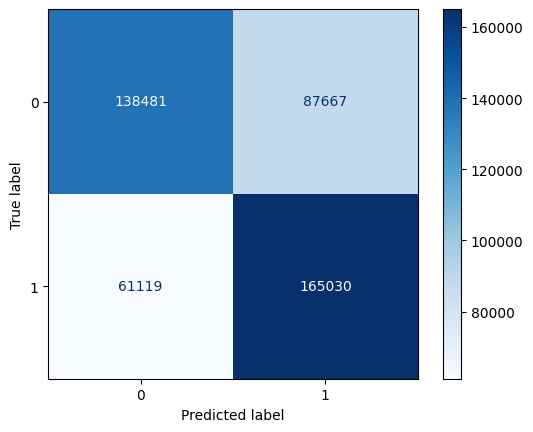

In [ ]:
y_pred_train = model.predict(X_train)

cm_train = confusion_matrix(y_train, y_pred_train, labels=[0,1])
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=[0,1])
disp_train.plot(cmap='Blues')

In [ ]:
print("Accuracy :", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("Recall   :", recall_score(y_train, y_pred_train))
print("F1-score :", f1_score(y_train, y_pred_train))

print("\nClassification Report:\n")
print(classification_report(y_train, y_pred_train))

Accuracy : 0.6710435841935719
Precision: 0.6530746308820445
Recall   : 0.7297401270843559
F1-score : 0.6892821491669555

Classification Report:

              precision    recall  f1-score   support

           0       0.69      0.61      0.65    226148
           1       0.65      0.73      0.69    226149

    accuracy                           0.67    452297
   macro avg       0.67      0.67      0.67    452297
weighted avg       0.67      0.67      0.67    452297



ROC AUC: 0.7268030878235848


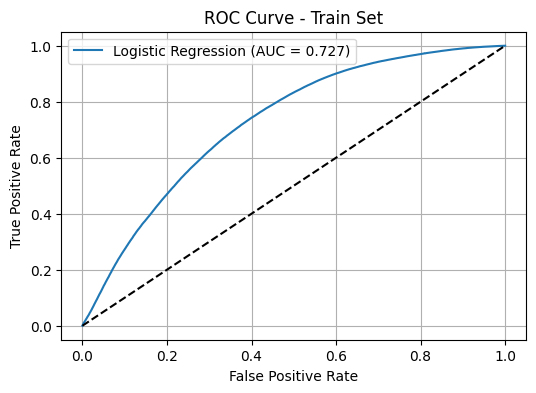

In [ ]:
y_proba_train = model.predict_proba(X_train)[:,1]

auc_train = roc_auc_score(y_train, y_proba_train)
print("ROC AUC:", auc_train)

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_proba_train)
plt.figure(figsize=(6,4))
plt.plot(fpr_train, tpr_train, label=f'Logistic Regression (AUC = {auc_train:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Train Set')
plt.legend()
plt.grid()
plt.show()

### test

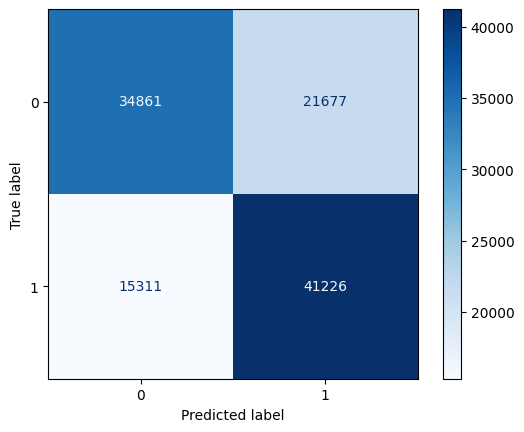

In [ ]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap='Blues')

In [ ]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy : 0.6728896749944727
Precision: 0.655390044989905
Recall   : 0.7291861966499814
F1-score : 0.6903215003348961

Classification Report:

              precision    recall  f1-score   support

           0       0.69      0.62      0.65     56538
           1       0.66      0.73      0.69     56537

    accuracy                           0.67    113075
   macro avg       0.68      0.67      0.67    113075
weighted avg       0.68      0.67      0.67    113075



ROC AUC: 0.730541343227174


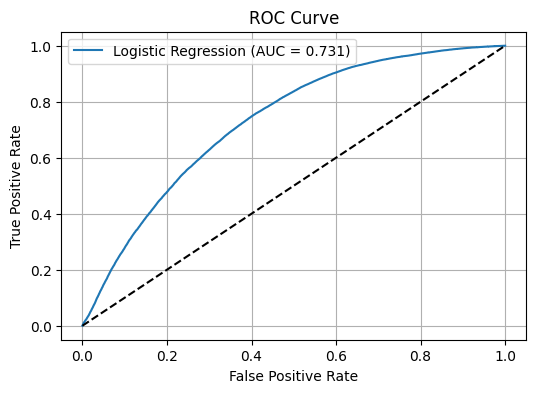

In [ ]:
y_proba = model.predict_proba(X_test)[:,1]

auc = roc_auc_score(y_test, y_proba)
print("ROC AUC:", auc)

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

### pipeline

**Definisi dan Tujuan Pipeline**

Pipeline dalam machine learning adalah rangkaian langkah (step) yang terstruktur dan saling berhubungan mulai dari pemrosesan data hingga pemodelan dan deployment. Menurut IBM, pipeline ML membantu “mengotomatisasi, menstandarkan, dan menyederhanakan proses membuat, melatih, mengevaluasi, dan menerapkan model.”

Tujuan utama penggunaan pipeline antara lain:

1. **Mencegah Kebocoran Data (Data Leakage)**: Dengan pipeline, langkah preprocessing seperti scaling atau imputasi hanya “belajar” dari data latih, sehingga tidak bocor informasi dari data uji.

2. **Membuat Alur Kerja Lebih Teratur**: Karena semua langkah digabung dalam satu alur, pekerjaannya lebih mudah dan rapi.

3. **Menjamin Konsistensi**: Setiap kali pipeline dijalankan (misalnya untuk prediksi baru), urutan dan parameter langkah sama, sehingga hasilnya bisa direproduksi.

4. **Memudahkan Penalaan Hyperparameter**: Pipeline memungkinkan tuning parameter preprocessing dan model sekaligus — misalnya menggunakan teknik seperti Grid Search atau Random Search.

5. **Mempermudah Deployment**: Karena pipeline bisa disimpan sebagai satu entitas, ketika model dipakai di produksi, semua langkah preprocessing akan diterapkan secara otomatis sebelum prediksi.

Referensi:
1. chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://digilib.stekom.ac.id/assets/dokumen/ebook/feb_14cda266756dd8b38b48b62bae9416e26ebfef27_1641803155.pdf?utm
2. https://www.ibm.com/id-id/think/topics/machine-learning-pipeline?utm
3. https://ai.fmipa.unesa.ac.id/post/ml-pipeline-dan-crisp-mlq-dalam-pengembangan-model-ai?utm

Fitting Logistic Regression Pipeline...
Logistic Regression Pipeline fitted successfully.

--- Evaluating Pipeline on Training Set ---


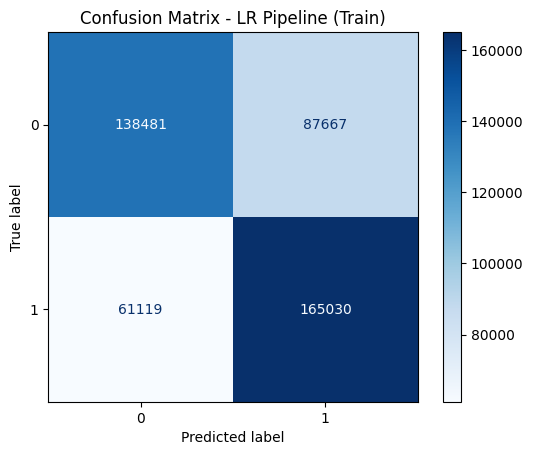

Accuracy (Train) : 0.6710435841935719
Precision (Train): 0.6530746308820445
Recall (Train)   : 0.7297401270843559
F1-score (Train) : 0.6892821491669555

Classification Report (Train):

              precision    recall  f1-score   support

           0       0.69      0.61      0.65    226148
           1       0.65      0.73      0.69    226149

    accuracy                           0.67    452297
   macro avg       0.67      0.67      0.67    452297
weighted avg       0.67      0.67      0.67    452297

ROC AUC (Train): 0.7268030878235848


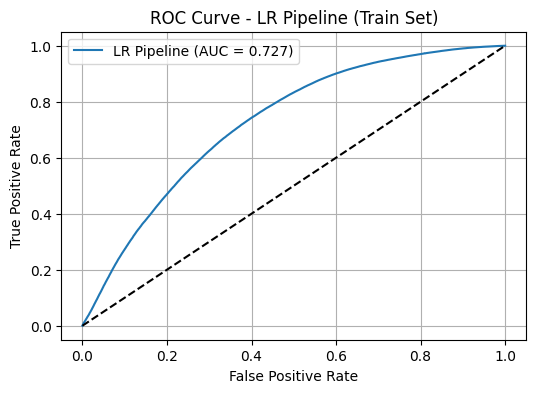


--- Evaluating Pipeline on Test Set ---


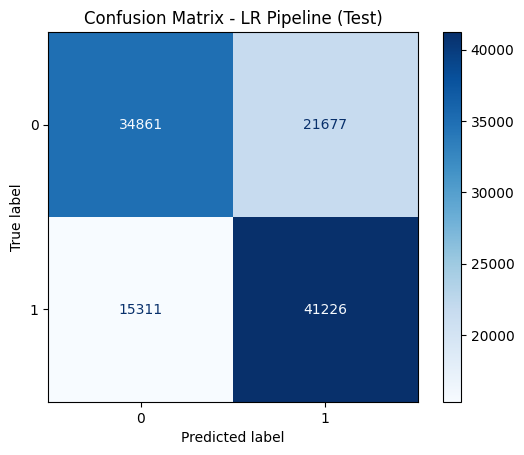

Accuracy (Test) : 0.6728896749944727
Precision (Test): 0.655390044989905
Recall (Test)   : 0.7291861966499814
F1-score (Test) : 0.6903215003348961

Classification Report (Test):

              precision    recall  f1-score   support

           0       0.69      0.62      0.65     56538
           1       0.66      0.73      0.69     56537

    accuracy                           0.67    113075
   macro avg       0.68      0.67      0.67    113075
weighted avg       0.68      0.67      0.67    113075

ROC AUC (Test): 0.730541343227174


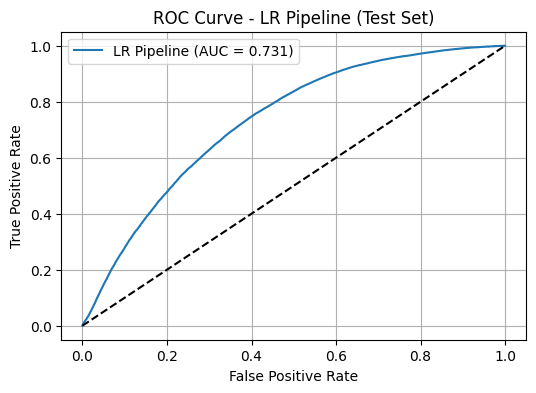

In [ ]:
from sklearn.pipeline import Pipeline

# 1. Define the Pipeline
lr_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('logistic_regression', LogisticRegression(random_state=42))
])

# 2. Train the pipeline
print("Fitting Logistic Regression Pipeline...")
lr_pipeline.fit(X_train_raw, y_train)
print("Logistic Regression Pipeline fitted successfully.")

# --- Evaluation on Train Set ---
print("\n--- Evaluating Pipeline on Training Set ---")
# Predict on train set
y_pred_train_pipeline = lr_pipeline.predict(X_train_raw)
y_proba_train_pipeline = lr_pipeline.predict_proba(X_train_raw)[:, 1]

# Confusion Matrix - Train
cm_train_pipeline = confusion_matrix(y_train, y_pred_train_pipeline, labels=[0, 1])
disp_train_pipeline = ConfusionMatrixDisplay(confusion_matrix=cm_train_pipeline, display_labels=[0, 1])
disp_train_pipeline.plot(cmap='Blues')
plt.title('Confusion Matrix - LR Pipeline (Train)')
plt.show()

# Metrics - Train
print("Accuracy (Train) :", accuracy_score(y_train, y_pred_train_pipeline))
print("Precision (Train):", precision_score(y_train, y_pred_train_pipeline))
print("Recall (Train)   :", recall_score(y_train, y_pred_train_pipeline))
print("F1-score (Train) :", f1_score(y_train, y_pred_train_pipeline))
print("\nClassification Report (Train):\n")
print(classification_report(y_train, y_pred_train_pipeline))

# ROC AUC & Curve - Train
auc_train_pipeline = roc_auc_score(y_train, y_proba_train_pipeline)
print("ROC AUC (Train):", auc_train_pipeline)
fpr_train_pipeline, tpr_train_pipeline, _ = roc_curve(y_train, y_proba_train_pipeline)
plt.figure(figsize=(6, 4))
plt.plot(fpr_train_pipeline, tpr_train_pipeline, label=f'LR Pipeline (AUC = {auc_train_pipeline:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LR Pipeline (Train Set)')
plt.legend()
plt.grid()
plt.show()

# --- Evaluation on Test Set ---
print("\n--- Evaluating Pipeline on Test Set ---")
# Predict on test set
y_pred_test_pipeline = lr_pipeline.predict(X_test_raw)
y_proba_test_pipeline = lr_pipeline.predict_proba(X_test_raw)[:, 1]

# Confusion Matrix - Test
cm_test_pipeline = confusion_matrix(y_test, y_pred_test_pipeline, labels=[0, 1])
disp_test_pipeline = ConfusionMatrixDisplay(confusion_matrix=cm_test_pipeline, display_labels=[0, 1])
disp_test_pipeline.plot(cmap='Blues')
plt.title('Confusion Matrix - LR Pipeline (Test)')
plt.show()

# Metrics - Test
print("Accuracy (Test) :", accuracy_score(y_test, y_pred_test_pipeline))
print("Precision (Test):", precision_score(y_test, y_pred_test_pipeline))
print("Recall (Test)   :", recall_score(y_test, y_pred_test_pipeline))
print("F1-score (Test) :", f1_score(y_test, y_pred_test_pipeline))
print("\nClassification Report (Test):\n")
print(classification_report(y_test, y_pred_test_pipeline))

# ROC AUC & Curve - Test
auc_test_pipeline = roc_auc_score(y_test, y_proba_test_pipeline)
print("ROC AUC (Test):", auc_test_pipeline)
fpr_test_pipeline, tpr_test_pipeline, _ = roc_curve(y_test, y_proba_test_pipeline)
plt.figure(figsize=(6, 4))
plt.plot(fpr_test_pipeline, tpr_test_pipeline, label=f'LR Pipeline (AUC = {auc_test_pipeline:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LR Pipeline (Test Set)')
plt.legend()
plt.grid()
plt.show()

## XG Boost

In [ ]:
# Buat model XGBoost tanpa class_weight
model_xgb = XGBClassifier(random_state=42)
model_xgb.fit(X_train_raw, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

### train

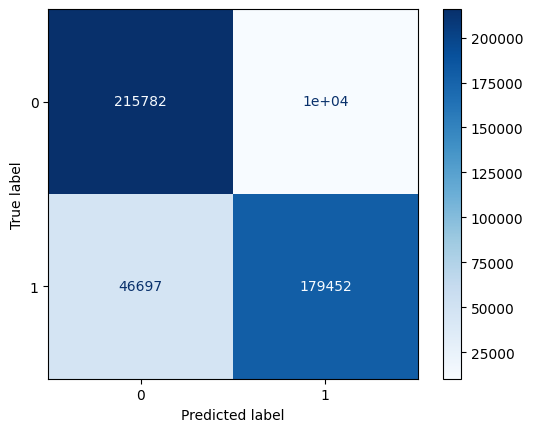

In [ ]:
y_pred_train_raw = model_xgb.predict(X_train_raw)

cm_train = confusion_matrix(y_train, y_pred_train_raw, labels=[0,1])
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=[0,1])
disp_train.plot(cmap='Blues')

In [ ]:
print("Accuracy :", accuracy_score(y_train, y_pred_train_raw))
print("Precision:", precision_score(y_train, y_pred_train_raw))
print("Recall   :", recall_score(y_train, y_pred_train_raw))
print("F1-score :", f1_score(y_train, y_pred_train_raw))

print("\nClassification Report:\n")
print(classification_report(y_train, y_pred_train_raw))

Accuracy : 0.8738373237054413
Precision: 0.945389794434669
Recall   : 0.7935122419289937
F1-score : 0.8628184447323947

Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.95      0.88    226148
           1       0.95      0.79      0.86    226149

    accuracy                           0.87    452297
   macro avg       0.88      0.87      0.87    452297
weighted avg       0.88      0.87      0.87    452297



ROC AUC: 0.6053293984238215


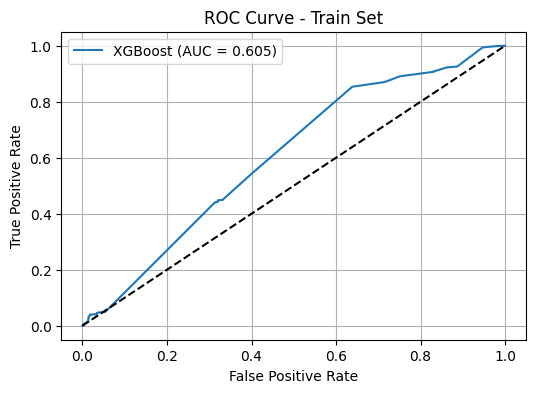

In [ ]:
y_proba_train_raw = model_xgb.predict_proba(X_train)[:,1]

auc_train = roc_auc_score(y_train, y_proba_train_raw)
print("ROC AUC:", auc_train)

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_proba_train_raw)
plt.figure(figsize=(6,4))
plt.plot(fpr_train, tpr_train, label=f'XGBoost (AUC = {auc_train:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Train Set')
plt.legend()
plt.grid()
plt.show()

### test

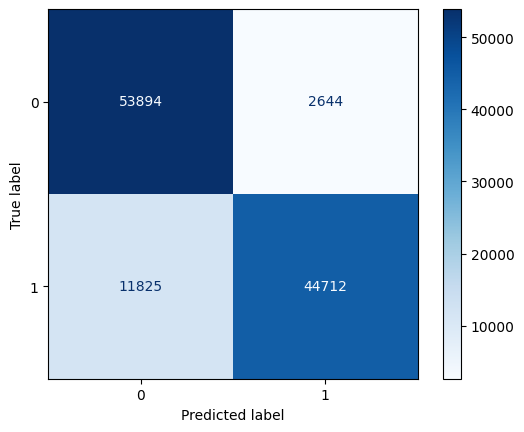

In [ ]:
y_pred = model_xgb.predict(X_test_raw)

cm = confusion_matrix(y_test, y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap='Blues')

In [ ]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy : 0.8720406809639619
Precision: 0.9441675817214292
Recall   : 0.7908449334064418
F1-score : 0.8607317143599665

Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.95      0.88     56538
           1       0.94      0.79      0.86     56537

    accuracy                           0.87    113075
   macro avg       0.88      0.87      0.87    113075
weighted avg       0.88      0.87      0.87    113075



ROC AUC: 0.9342057832250771


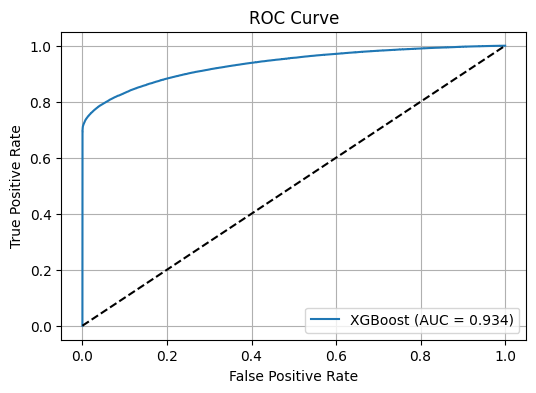

In [ ]:
y_proba = model_xgb.predict_proba(X_test_raw)[:,1]

auc = roc_auc_score(y_test, y_proba)
print("ROC AUC:", auc)

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

### pipeline

In [ ]:
from sklearn.pipeline import Pipeline

# 1. Define the Pipeline
xgb_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('xgb_classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

# 2. Train the pipeline
print("Fitting XGBoost Pipeline...")
xgb_pipeline.fit(X_train_raw, y_train)
print("XGBoost Pipeline fitted successfully.")

Fitting XGBoost Pipeline...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:06:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Pipeline fitted successfully.



--- Evaluating Pipeline on Training Set ---


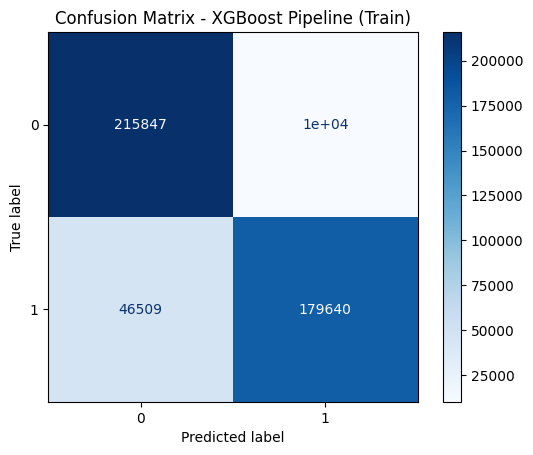

Accuracy (Train) : 0.8743966906700685
Precision (Train): 0.9457673698674852
Recall (Train)   : 0.7943435522597934
F1-score (Train) : 0.8634670383811195

Classification Report (Train):

              precision    recall  f1-score   support

           0       0.82      0.95      0.88    226148
           1       0.95      0.79      0.86    226149

    accuracy                           0.87    452297
   macro avg       0.88      0.87      0.87    452297
weighted avg       0.88      0.87      0.87    452297

ROC AUC (Train): 0.9382812042746018


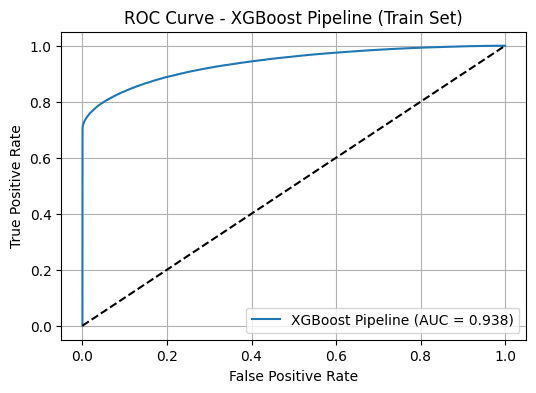

In [ ]:
# --- Evaluation on Train Set ---
print("\n--- Evaluating Pipeline on Training Set ---")
# Predict on train set
y_pred_train_xgb_pipeline = xgb_pipeline.predict(X_train_raw)
y_proba_train_xgb_pipeline = xgb_pipeline.predict_proba(X_train_raw)[:, 1]

# Confusion Matrix - Train
cm_train_xgb_pipeline = confusion_matrix(y_train, y_pred_train_xgb_pipeline, labels=[0, 1])
disp_train_xgb_pipeline = ConfusionMatrixDisplay(confusion_matrix=cm_train_xgb_pipeline, display_labels=[0, 1])
disp_train_xgb_pipeline.plot(cmap='Blues')
plt.title('Confusion Matrix - XGBoost Pipeline (Train)')
plt.show()

# Metrics - Train
print("Accuracy (Train) :", accuracy_score(y_train, y_pred_train_xgb_pipeline))
print("Precision (Train):", precision_score(y_train, y_pred_train_xgb_pipeline))
print("Recall (Train)   :", recall_score(y_train, y_pred_train_xgb_pipeline))
print("F1-score (Train) :", f1_score(y_train, y_pred_train_xgb_pipeline))
print("\nClassification Report (Train):\n")
print(classification_report(y_train, y_pred_train_xgb_pipeline))

# ROC AUC & Curve - Train
auc_train_xgb_pipeline = roc_auc_score(y_train, y_proba_train_xgb_pipeline)
print("ROC AUC (Train):", auc_train_xgb_pipeline)
fpr_train_xgb_pipeline, tpr_train_xgb_pipeline, _ = roc_curve(y_train, y_proba_train_xgb_pipeline)
plt.figure(figsize=(6, 4))
plt.plot(fpr_train_xgb_pipeline, tpr_train_xgb_pipeline, label=f'XGBoost Pipeline (AUC = {auc_train_xgb_pipeline:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost Pipeline (Train Set)')
plt.legend()
plt.grid()
plt.show()


--- Evaluating Pipeline on Test Set ---


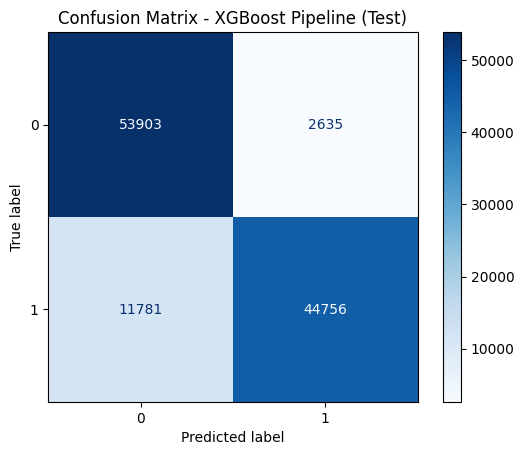

Accuracy (Test) : 0.8725093964183064
Precision (Test): 0.9443987254964022
Recall (Test)   : 0.7916231848170224
F1-score (Test) : 0.8612885844045878

Classification Report (Test):

              precision    recall  f1-score   support

           0       0.82      0.95      0.88     56538
           1       0.94      0.79      0.86     56537

    accuracy                           0.87    113075
   macro avg       0.88      0.87      0.87    113075
weighted avg       0.88      0.87      0.87    113075

ROC AUC (Test): 0.9346163300902757


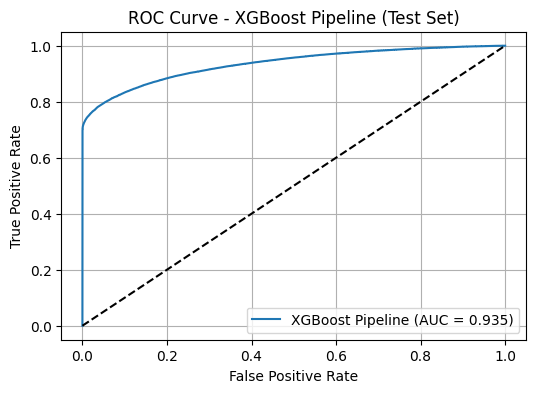

In [ ]:
# --- Evaluation on Test Set ---
print("\n--- Evaluating Pipeline on Test Set ---")
# Predict on test set
y_pred_test_xgb_pipeline = xgb_pipeline.predict(X_test_raw)
y_proba_test_xgb_pipeline = xgb_pipeline.predict_proba(X_test_raw)[:, 1]

# Confusion Matrix - Test
cm_test_xgb_pipeline = confusion_matrix(y_test, y_pred_test_xgb_pipeline, labels=[0, 1])
disp_test_xgb_pipeline = ConfusionMatrixDisplay(confusion_matrix=cm_test_xgb_pipeline, display_labels=[0, 1])
disp_test_xgb_pipeline.plot(cmap='Blues')
plt.title('Confusion Matrix - XGBoost Pipeline (Test)')
plt.show()

# Metrics - Test
print("Accuracy (Test) :", accuracy_score(y_test, y_pred_test_xgb_pipeline))
print("Precision (Test):", precision_score(y_test, y_pred_test_xgb_pipeline))
print("Recall (Test)   :", recall_score(y_test, y_pred_test_xgb_pipeline))
print("F1-score (Test) :", f1_score(y_test, y_pred_test_xgb_pipeline))
print("\nClassification Report (Test):\n")
print(classification_report(y_test, y_pred_test_xgb_pipeline))

# ROC AUC & Curve - Test
auc_test_xgb_pipeline = roc_auc_score(y_test, y_proba_test_xgb_pipeline)
print("ROC AUC (Test):", auc_test_xgb_pipeline)
fpr_test_xgb_pipeline, tpr_test_xgb_pipeline, _ = roc_curve(y_test, y_proba_test_xgb_pipeline)
plt.figure(figsize=(6, 4))
plt.plot(fpr_test_xgb_pipeline, tpr_test_xgb_pipeline, label=f'XGBoost Pipeline (AUC = {auc_test_xgb_pipeline:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost Pipeline (Test Set)')
plt.legend()
plt.grid()
plt.show()

## Decision Tree

In [ ]:
model_dt = DecisionTreeClassifier(max_depth = 5, random_state=42)
model_dt.fit(X_train_raw, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

### train

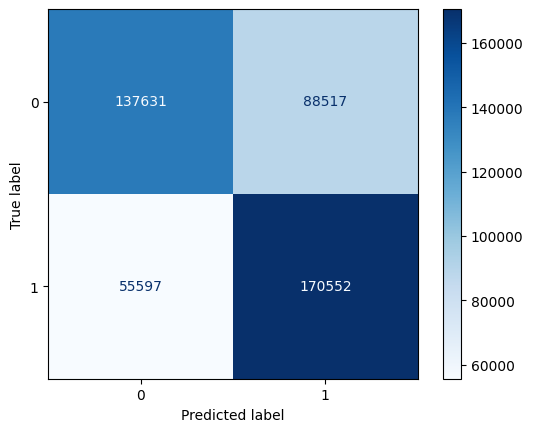

In [ ]:
y_pred_train_dt_reg = model_dt.predict(X_train_raw)

cm_train = confusion_matrix(y_train, y_pred_train_dt_reg, labels=[0,1])
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=[0,1])
disp_train.plot(cmap='Blues')

In [ ]:
print("Accuracy :", accuracy_score(y_train, y_pred_train_dt_reg))
print("Precision:", precision_score(y_train, y_pred_train_dt_reg))
print("Recall   : ", recall_score(y_train, y_pred_train_dt_reg))
print("F1-score :", f1_score(y_train, y_pred_train_dt_reg))

print("\nClassification Report:\n")
print(classification_report(y_train, y_pred_train_dt_reg))

Accuracy : 0.6813730800779134
Precision: 0.658326546209697
Recall   :  0.7541576571198635
F1-score : 0.7029912328066972

Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.61      0.66    226148
           1       0.66      0.75      0.70    226149

    accuracy                           0.68    452297
   macro avg       0.69      0.68      0.68    452297
weighted avg       0.69      0.68      0.68    452297



ROC AUC: 0.726683813644942


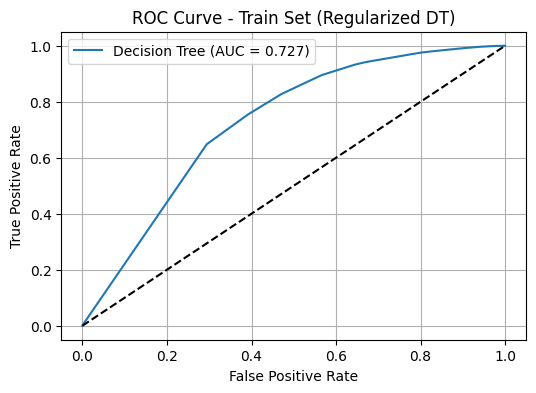

In [ ]:
y_proba_train_dt = model_dt.predict_proba(X_train_raw)[:,1]

auc_train_dt = roc_auc_score(y_train, y_proba_train_dt)
print("ROC AUC:", auc_train_dt)

fpr_train_dt, tpr_train_dt, thresholds_train_dt = roc_curve(y_train, y_proba_train_dt)
plt.figure(figsize=(6,4))
plt.plot(fpr_train_dt, tpr_train_dt, label=f'Decision Tree (AUC = {auc_train_dt:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Train Set (Regularized DT)')
plt.legend()
plt.grid()
plt.show()

### test

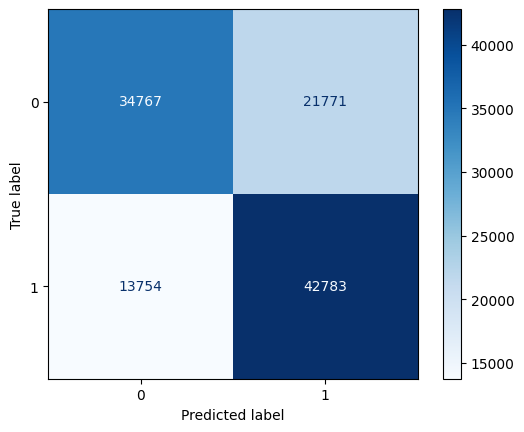

In [ ]:
y_pred_test_dt = model_dt.predict(X_test_raw)

cm_test_dt = confusion_matrix(y_test, y_pred_test_dt, labels=[0,1])
disp_test_dt = ConfusionMatrixDisplay(confusion_matrix=cm_test_dt, display_labels=[0,1])
disp_test_dt.plot(cmap='Blues')

In [ ]:
print("Accuracy :", accuracy_score(y_test, y_pred_test_dt))
print("Precision:", precision_score(y_test, y_pred_test_dt))
print("Recall   :", recall_score(y_test, y_pred_test_dt))
print("F1-score :", f1_score(y_test, y_pred_test_dt))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_test_dt))

Accuracy : 0.6858279902719434
Precision: 0.6627474672367321
Recall   : 0.7567256840653024
F1-score : 0.7066255956264297

Classification Report:

              precision    recall  f1-score   support

           0       0.72      0.61      0.66     56538
           1       0.66      0.76      0.71     56537

    accuracy                           0.69    113075
   macro avg       0.69      0.69      0.68    113075
weighted avg       0.69      0.69      0.68    113075



ROC AUC: 0.7310870202344446


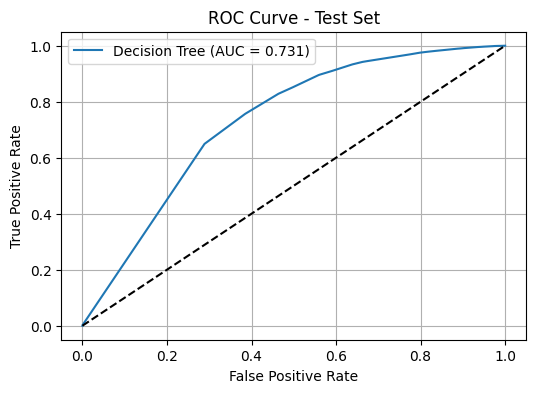

In [ ]:
y_proba_test_dt = model_dt.predict_proba(X_test_raw)[:,1]

auc_test_dt = roc_auc_score(y_test, y_proba_test_dt)
print("ROC AUC:", auc_test_dt)

fpr_test_dt, tpr_test_dt, thresholds_test_dt = roc_curve(y_test, y_proba_test_dt)
plt.figure(figsize=(6,4))
plt.plot(fpr_test_dt, tpr_test_dt, label=f'Decision Tree (AUC = {auc_test_dt:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Set')
plt.legend()
plt.grid()
plt.show()

### pipeline

In [ ]:
from sklearn.pipeline import Pipeline

# 1. Define the Pipeline
dt_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('dt_classifier', DecisionTreeClassifier(random_state=42, max_depth=5)) # Corrected: max_depth is a parameter of DecisionTreeClassifier
])

# 2. Train the pipeline
print("Fitting Decision Tree Pipeline...")
dt_pipeline.fit(X_train_raw, y_train)
print("Decision Tree Pipeline fitted successfully.")

Fitting Decision Tree Pipeline...
Decision Tree Pipeline fitted successfully.



--- Evaluating Pipeline on Training Set ---


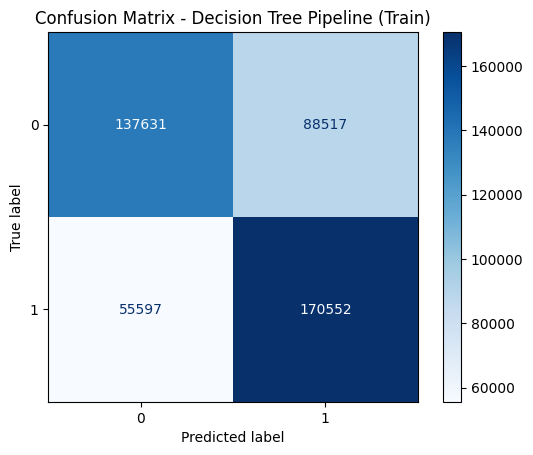

Accuracy (Train) : 0.6813730800779134
Precision (Train): 0.658326546209697
Recall (Train)   : 0.7541576571198635
F1-score (Train) : 0.7029912328066972

Classification Report (Train):

              precision    recall  f1-score   support

           0       0.71      0.61      0.66    226148
           1       0.66      0.75      0.70    226149

    accuracy                           0.68    452297
   macro avg       0.69      0.68      0.68    452297
weighted avg       0.69      0.68      0.68    452297

ROC AUC (Train): 0.726683813644942


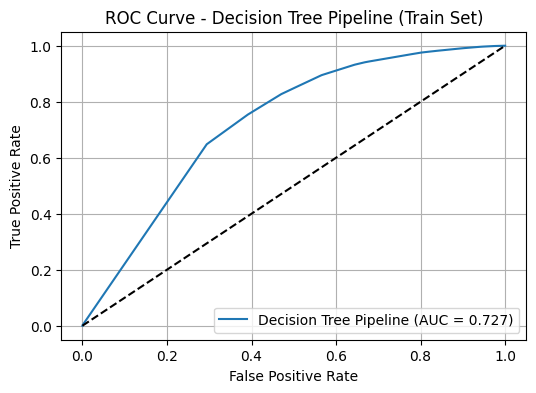

In [ ]:
# --- Evaluation on Train Set ---
print("\n--- Evaluating Pipeline on Training Set ---")
# Predict on train set
y_pred_train_dt_pipeline = dt_pipeline.predict(X_train_raw)
y_proba_train_dt_pipeline = dt_pipeline.predict_proba(X_train_raw)[:, 1]

# Confusion Matrix - Train
cm_train_dt_pipeline = confusion_matrix(y_train, y_pred_train_dt_pipeline, labels=[0, 1])
disp_train_dt_pipeline = ConfusionMatrixDisplay(confusion_matrix=cm_train_dt_pipeline, display_labels=[0, 1])
disp_train_dt_pipeline.plot(cmap='Blues')
plt.title('Confusion Matrix - Decision Tree Pipeline (Train)')
plt.show()

# Metrics - Train
print("Accuracy (Train) :", accuracy_score(y_train, y_pred_train_dt_pipeline))
print("Precision (Train):", precision_score(y_train, y_pred_train_dt_pipeline))
print("Recall (Train)   :", recall_score(y_train, y_pred_train_dt_pipeline))
print("F1-score (Train) :", f1_score(y_train, y_pred_train_dt_pipeline))
print("\nClassification Report (Train):\n")
print(classification_report(y_train, y_pred_train_dt_pipeline))

# ROC AUC & Curve - Train
auc_train_dt_pipeline = roc_auc_score(y_train, y_proba_train_dt_pipeline)
print("ROC AUC (Train):", auc_train_dt_pipeline)
fpr_train_dt_pipeline, tpr_train_dt_pipeline, _ = roc_curve(y_train, y_proba_train_dt_pipeline)
plt.figure(figsize=(6, 4))
plt.plot(fpr_train_dt_pipeline, tpr_train_dt_pipeline, label=f'Decision Tree Pipeline (AUC = {auc_train_dt_pipeline:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree Pipeline (Train Set)')
plt.legend()
plt.grid()
plt.show()


--- Evaluating Pipeline on Test Set ---


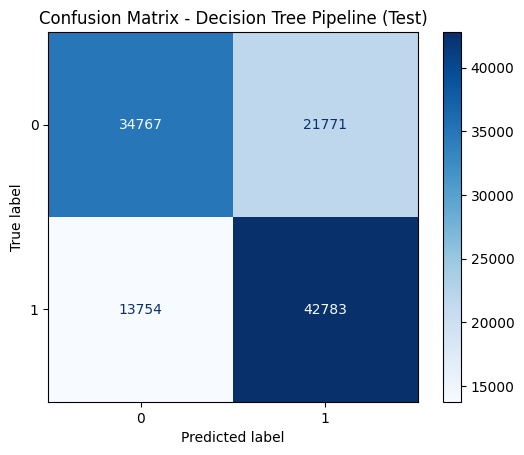

Accuracy (Test) : 0.6858279902719434
Precision (Test): 0.6627474672367321
Recall (Test)   : 0.7567256840653024
F1-score (Test) : 0.7066255956264297

Classification Report (Test):

              precision    recall  f1-score   support

           0       0.72      0.61      0.66     56538
           1       0.66      0.76      0.71     56537

    accuracy                           0.69    113075
   macro avg       0.69      0.69      0.68    113075
weighted avg       0.69      0.69      0.68    113075

ROC AUC (Test): 0.7310870202344446


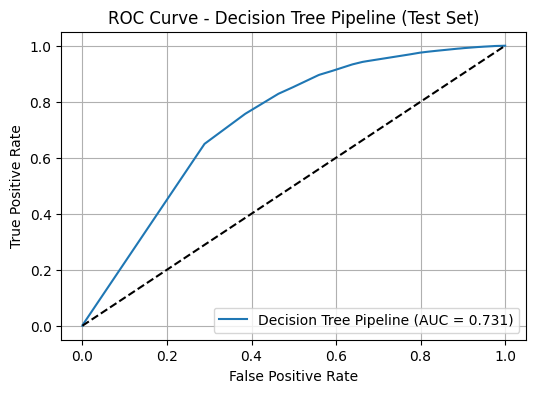

In [ ]:
# --- Evaluation on Test Set ---
print("\n--- Evaluating Pipeline on Test Set ---")
# Predict on test set
y_pred_test_dt_pipeline = dt_pipeline.predict(X_test_raw)
y_proba_test_dt_pipeline = dt_pipeline.predict_proba(X_test_raw)[:, 1]

# Confusion Matrix - Test
cm_test_dt_pipeline = confusion_matrix(y_test, y_pred_test_dt_pipeline, labels=[0, 1])
disp_test_dt_pipeline = ConfusionMatrixDisplay(confusion_matrix=cm_test_dt_pipeline, display_labels=[0, 1])
disp_test_dt_pipeline.plot(cmap='Blues')
plt.title('Confusion Matrix - Decision Tree Pipeline (Test)')
plt.show()

# Metrics - Test
print("Accuracy (Test) :", accuracy_score(y_test, y_pred_test_dt_pipeline))
print("Precision (Test):", precision_score(y_test, y_pred_test_dt_pipeline))
print("Recall (Test)   :", recall_score(y_test, y_pred_test_dt_pipeline))
print("F1-score (Test) :", f1_score(y_test, y_pred_test_dt_pipeline))
print("\nClassification Report (Test):\n")
print(classification_report(y_test, y_pred_test_dt_pipeline))

# ROC AUC & Curve - Test
auc_test_dt_pipeline = roc_auc_score(y_test, y_proba_test_dt_pipeline)
print("ROC AUC (Test):", auc_test_dt_pipeline)
fpr_test_dt_pipeline, tpr_test_dt_pipeline, _ = roc_curve(y_test, y_proba_test_dt_pipeline)
plt.figure(figsize=(6, 4))
plt.plot(fpr_test_dt_pipeline, tpr_test_dt_pipeline, label=f'Decision Tree Pipeline (AUC = {auc_test_dt_pipeline:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree Pipeline (Test Set)')
plt.legend()
plt.grid()
plt.show()

## Random Forest

In [ ]:
# Buat model Decision Tree dengan regularisasi (misalnya max_depth)
model_rf = RandomForestClassifier(max_depth=5, random_state=42)
model_rf.fit(X_train_raw, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

### train

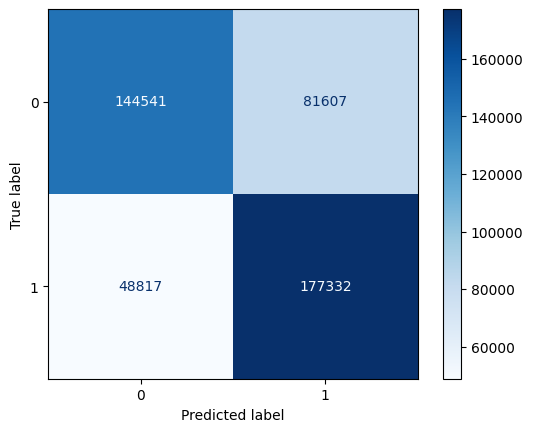

In [ ]:
y_pred_train_rf = model_rf.predict(X_train_raw)

cm_train_rf = confusion_matrix(y_train, y_pred_train_rf, labels=[0,1])
disp_train_rf = ConfusionMatrixDisplay(confusion_matrix=cm_train_rf, display_labels=[0,1])
disp_train_rf.plot(cmap='Blues')

In [ ]:
print("Accuracy :", accuracy_score(y_train, y_pred_train_rf))
print("Precision:", precision_score(y_train, y_pred_train_rf))
print("Recall   : ", recall_score(y_train, y_pred_train_rf))
print("F1-score :", f1_score(y_train, y_pred_train_rf))

print("\nClassification Report:\n")
print(classification_report(y_train, y_pred_train_rf))

Accuracy : 0.7116408023931178
Precision: 0.6848408312382454
Recall   :  0.7841378913901896
F1-score : 0.7311333201398509

Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.64      0.69    226148
           1       0.68      0.78      0.73    226149

    accuracy                           0.71    452297
   macro avg       0.72      0.71      0.71    452297
weighted avg       0.72      0.71      0.71    452297



ROC AUC: 0.7740751249619713


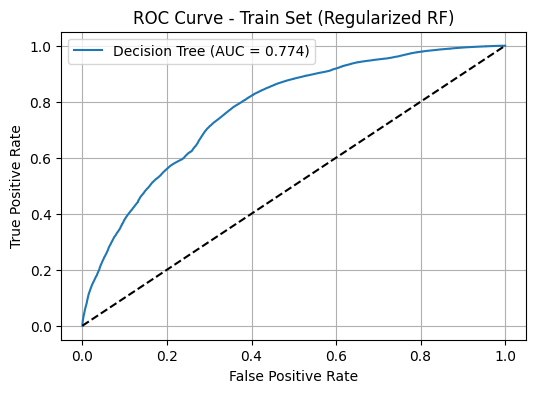

In [ ]:
y_proba_train_rf = model_rf.predict_proba(X_train_raw)[:,1]

auc_train_rf = roc_auc_score(y_train, y_proba_train_rf)
print("ROC AUC:", auc_train_rf)

fpr_train_rf, tpr_train_rf, thresholds_train_rf = roc_curve(y_train, y_proba_train_rf)
plt.figure(figsize=(6,4))
plt.plot(fpr_train_rf, tpr_train_rf, label=f'Decision Tree (AUC = {auc_train_rf:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Train Set (Regularized RF)')
plt.legend()
plt.grid()
plt.show()

### test

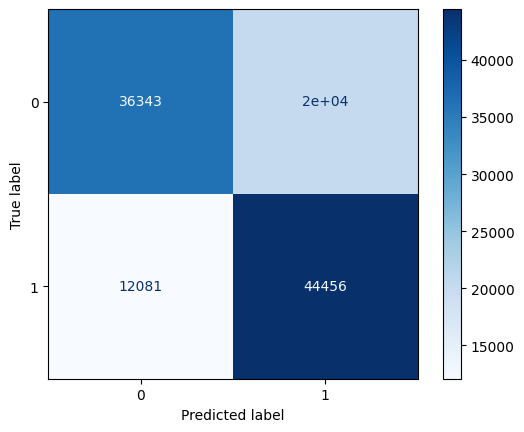

In [ ]:
y_pred_test_rf = model_rf.predict(X_test_raw)

cm_test_rf = confusion_matrix(y_test, y_pred_test_rf, labels=[0,1])
disp_test_rf = ConfusionMatrixDisplay(confusion_matrix=cm_test_rf, display_labels=[0,1])
disp_test_rf.plot(cmap='Blues')

In [ ]:
print("Accuracy :", accuracy_score(y_test, y_pred_test_rf))
print("Precision:", precision_score(y_test, y_pred_test_rf))
print("Recall   :", recall_score(y_test, y_pred_test_rf))
print("F1-score :", f1_score(y_test, y_pred_test_rf))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_test_rf))

Accuracy : 0.7145611319920406
Precision: 0.6876305084221435
Recall   : 0.786316925199427
F1-score : 0.7336700003300657

Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.64      0.69     56538
           1       0.69      0.79      0.73     56537

    accuracy                           0.71    113075
   macro avg       0.72      0.71      0.71    113075
weighted avg       0.72      0.71      0.71    113075



ROC AUC: 0.7786986279939243


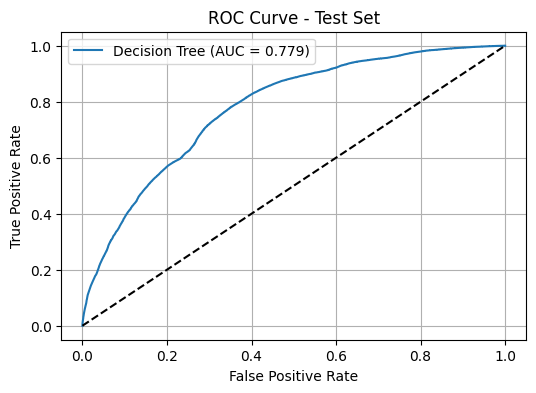

In [ ]:
y_proba_test_rf = model_rf.predict_proba(X_test_raw)[:,1]

auc_test_rf = roc_auc_score(y_test, y_proba_test_rf)
print("ROC AUC:", auc_test_rf)

fpr_test_rf, tpr_test_rf, thresholds_test_rf = roc_curve(y_test, y_proba_test_rf)
plt.figure(figsize=(6,4))
plt.plot(fpr_test_rf, tpr_test_rf, label=f'Decision Tree (AUC = {auc_test_rf:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Set')
plt.legend()
plt.grid()
plt.show()

### pipeline

In [ ]:
from sklearn.pipeline import Pipeline

# 1. Define the Pipeline
rf_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('rf_classifier', RandomForestClassifier(random_state=42, max_depth = 5))
])

# 2. Train the pipeline
print("Fitting Random Forest Pipeline...")
rf_pipeline.fit(X_train_raw, y_train)
print("Random Forest Pipeline fitted successfully.")

Fitting Random Forest Pipeline...
Random Forest Pipeline fitted successfully.



--- Evaluating Pipeline on Training Set ---


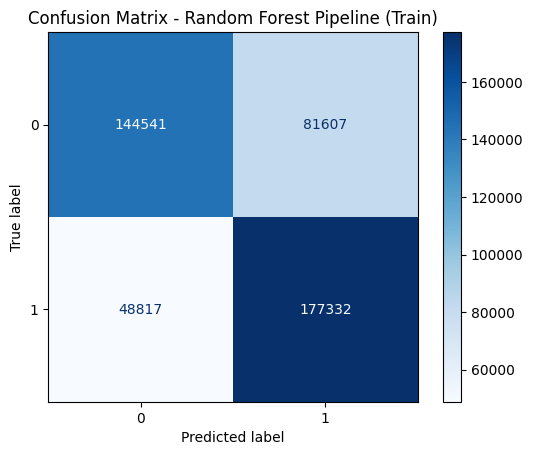

Accuracy (Train) : 0.7116408023931178
Precision (Train): 0.6848408312382454
Recall (Train)   : 0.7841378913901896
F1-score (Train) : 0.7311333201398509

Classification Report (Train):

              precision    recall  f1-score   support

           0       0.75      0.64      0.69    226148
           1       0.68      0.78      0.73    226149

    accuracy                           0.71    452297
   macro avg       0.72      0.71      0.71    452297
weighted avg       0.72      0.71      0.71    452297

ROC AUC (Train): 0.7740751036492418


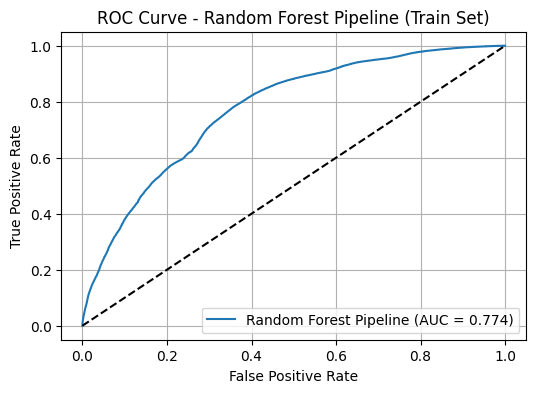

In [ ]:
# --- Evaluation on Train Set ---
print("\n--- Evaluating Pipeline on Training Set ---")
# Predict on train set
y_pred_train_rf_pipeline = rf_pipeline.predict(X_train_raw)
y_proba_train_rf_pipeline = rf_pipeline.predict_proba(X_train_raw)[:, 1]

# Confusion Matrix - Train
cm_train_rf_pipeline = confusion_matrix(y_train, y_pred_train_rf_pipeline, labels=[0, 1])
disp_train_rf_pipeline = ConfusionMatrixDisplay(confusion_matrix=cm_train_rf_pipeline, display_labels=[0, 1])
disp_train_rf_pipeline.plot(cmap='Blues')
plt.title('Confusion Matrix - Random Forest Pipeline (Train)')
plt.show()

# Metrics - Train
print("Accuracy (Train) :", accuracy_score(y_train, y_pred_train_rf_pipeline))
print("Precision (Train):", precision_score(y_train, y_pred_train_rf_pipeline))
print("Recall (Train)   :", recall_score(y_train, y_pred_train_rf_pipeline))
print("F1-score (Train) :", f1_score(y_train, y_pred_train_rf_pipeline))
print("\nClassification Report (Train):\n")
print(classification_report(y_train, y_pred_train_rf_pipeline))

# ROC AUC & Curve - Train
auc_train_rf_pipeline = roc_auc_score(y_train, y_proba_train_rf_pipeline)
print("ROC AUC (Train):", auc_train_rf_pipeline)
fpr_train_rf_pipeline, tpr_train_rf_pipeline, _ = roc_curve(y_train, y_proba_train_rf_pipeline)
plt.figure(figsize=(6, 4))
plt.plot(fpr_train_rf_pipeline, tpr_train_rf_pipeline, label=f'Random Forest Pipeline (AUC = {auc_train_rf_pipeline:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Pipeline (Train Set)')
plt.legend()
plt.grid()
plt.show()


--- Evaluating Pipeline on Test Set ---


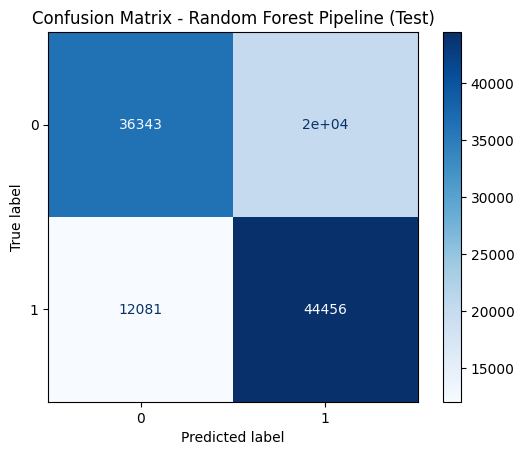

Accuracy (Test) : 0.7145611319920406
Precision (Test): 0.6876305084221435
Recall (Test)   : 0.786316925199427
F1-score (Test) : 0.7336700003300657

Classification Report (Test):

              precision    recall  f1-score   support

           0       0.75      0.64      0.69     56538
           1       0.69      0.79      0.73     56537

    accuracy                           0.71    113075
   macro avg       0.72      0.71      0.71    113075
weighted avg       0.72      0.71      0.71    113075

ROC AUC (Test): 0.7786987468743619


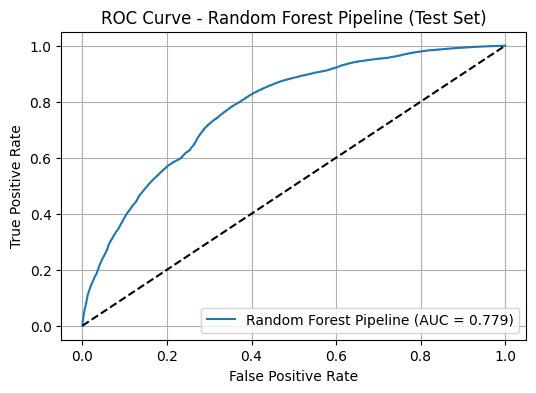

In [ ]:
# --- Evaluation on Test Set ---
print("\n--- Evaluating Pipeline on Test Set ---")
# Predict on test set
y_pred_test_rf_pipeline = rf_pipeline.predict(X_test_raw)
y_proba_test_rf_pipeline = rf_pipeline.predict_proba(X_test_raw)[:, 1]

# Confusion Matrix - Test
cm_test_rf_pipeline = confusion_matrix(y_test, y_pred_test_rf_pipeline, labels=[0, 1])
disp_test_rf_pipeline = ConfusionMatrixDisplay(confusion_matrix=cm_test_rf_pipeline, display_labels=[0, 1])
disp_test_rf_pipeline.plot(cmap='Blues')
plt.title('Confusion Matrix - Random Forest Pipeline (Test)')
plt.show()

# Metrics - Test
print("Accuracy (Test) :", accuracy_score(y_test, y_pred_test_rf_pipeline))
print("Precision (Test):", precision_score(y_test, y_pred_test_rf_pipeline))
print("Recall (Test)   :", recall_score(y_test, y_pred_test_rf_pipeline))
print("F1-score (Test) :", f1_score(y_test, y_pred_test_rf_pipeline))
print("\nClassification Report (Test):\n")
print(classification_report(y_test, y_pred_test_rf_pipeline))

# ROC AUC & Curve - Test
auc_test_rf_pipeline = roc_auc_score(y_test, y_proba_test_rf_pipeline)
print("ROC AUC (Test):", auc_test_rf_pipeline)
fpr_test_rf_pipeline, tpr_test_rf_pipeline, _ = roc_curve(y_test, y_proba_test_rf_pipeline)
plt.figure(figsize=(6, 4))
plt.plot(fpr_test_rf_pipeline, tpr_test_rf_pipeline, label=f'Random Forest Pipeline (AUC = {auc_test_rf_pipeline:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Pipeline (Test Set)')
plt.legend()
plt.grid()
plt.show()

# Modelling (dengan Hyperparameter)

Melakukan Pencarian Hyperparameter Terbaik

In [ ]:
from sklearn.model_selection import GridSearchCV

NB: Sebelumnya sudah dilakukan pencarian Hyperameter terbaik dengan semua kombinasi yang dibuatkan komentar. Untuk efisiensi waktu eksekusi agar bisa menjalankan semua kodenya, maka hanya disertakan 1 kombinasi hyperparameter terbaik dari hasil seluruh kombinasi hyperparameter yang sebelumnya telah dijalankan. Hasil kombinasi seluruh parameter yang telah dijalankan bisa dilihat pada tangkapan layar dilampiran slide presentasi.

## Logistic Regression

In [ ]:
logreg_param_grid = {
    'C': [0.001],
    #'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1'],
    #'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    #'solver': ['liblinear', 'saga'],
    'class_weight': [None],
    #'class_weight': [None, 'balanced'],
    'tol' : [0.01],
    #'tol': [1e-4, 1e-3, 1e-2],
}
print("Logistic Regression hyperparameter grid defined successfully.")

Logistic Regression hyperparameter grid defined successfully.


Logistic Regression Hyperparameter:

C
Penalty
L1, L2
Solver: liblinear, saga
Classweight: balanced
tol:

In [ ]:
# Inisialisasi model Logistic Regression
logreg_model = LogisticRegression(random_state=42)

# Inisialisasi GridSearchCV
grid_search_logreg = GridSearchCV(
    estimator=logreg_model,
    param_grid=logreg_param_grid,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    n_jobs=-1,  # Gunakan semua core prosesor yang tersedia
    verbose=2
)

# Fit GridSearchCV
print("Starting GridSearchCV for Logistic Regression...")
grid_search_logreg.fit(X_train, y_train)
print("GridSearchCV for Logistic Regression completed.")

Starting GridSearchCV for Logistic Regression...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
GridSearchCV for Logistic Regression completed.


In [ ]:
# Dapatkan model terbaik
best_logreg_model = grid_search_logreg.best_estimator_

print("Best Logistic Regression Model:")
print(best_logreg_model)

print("Best Parameters Found:")
print(grid_search_logreg.best_params_)

print("Best ROC AUC Score (from cross-validation):")
print(grid_search_logreg.best_score_)

Best Logistic Regression Model:
LogisticRegression(C=0.001, penalty='l1', random_state=42, solver='liblinear',
                   tol=0.01)
Best Parameters Found:
{'C': 0.001, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.01}
Best ROC AUC Score (from cross-validation):
0.726807430678765


### train

Evaluating Best Logistic Regression Model on Training Set...

--- Training Set Evaluation ---
Confusion Matrix (Train):


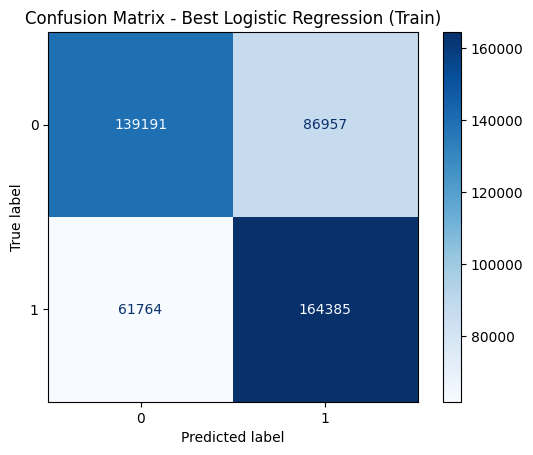

Accuracy (Train) : 0.6711872950738121
Precision (Train): 0.6540291714078825
Recall (Train)   : 0.7268880251515594
F1-score (Train) : 0.6885365378614466

Classification Report (Train):

              precision    recall  f1-score   support

           0       0.69      0.62      0.65    226148
           1       0.65      0.73      0.69    226149

    accuracy                           0.67    452297
   macro avg       0.67      0.67      0.67    452297
weighted avg       0.67      0.67      0.67    452297

ROC AUC (Train): 0.7268269759912492


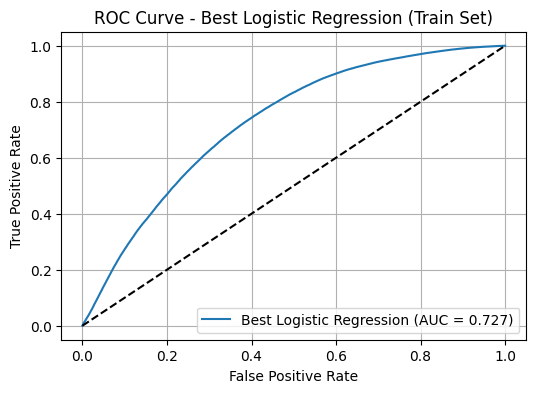

In [ ]:
print("Evaluating Best Logistic Regression Model on Training Set...")
y_pred_train_best = best_logreg_model.predict(X_train)
y_proba_train_best = best_logreg_model.predict_proba(X_train)[:, 1]

print("\n--- Training Set Evaluation ---")
print("Confusion Matrix (Train):")
cm_train_best = confusion_matrix(y_train, y_pred_train_best, labels=[0, 1])
disp_train_best = ConfusionMatrixDisplay(confusion_matrix=cm_train_best, display_labels=[0, 1])
disp_train_best.plot(cmap='Blues')
plt.title('Confusion Matrix - Best Logistic Regression (Train)')
plt.show()

print("Accuracy (Train) :", accuracy_score(y_train, y_pred_train_best))
print("Precision (Train):", precision_score(y_train, y_pred_train_best))
print("Recall (Train)   :", recall_score(y_train, y_pred_train_best))
print("F1-score (Train) :", f1_score(y_train, y_pred_train_best))
print("\nClassification Report (Train):\n")
print(classification_report(y_train, y_pred_train_best))

auc_train_best = roc_auc_score(y_train, y_proba_train_best)
print("ROC AUC (Train):", auc_train_best)

fpr_train_best, tpr_train_best, _ = roc_curve(y_train, y_proba_train_best)
plt.figure(figsize=(6, 4))
plt.plot(fpr_train_best, tpr_train_best, label=f'Best Logistic Regression (AUC = {auc_train_best:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best Logistic Regression (Train Set)')
plt.legend()
plt.grid()
plt.show()

### test

Evaluating Best Logistic Regression Model on Test Set...

--- Test Set Evaluation ---
Confusion Matrix (Test):


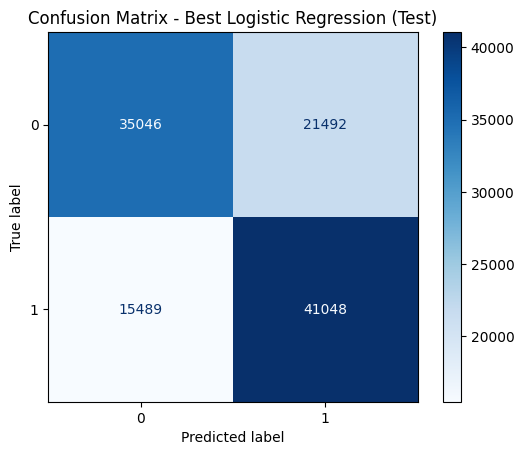

Accuracy (Test) : 0.6729515808091975
Precision (Test): 0.6563479373201151
Recall (Test)   : 0.7260378159435414
F1-score (Test) : 0.6894362471342073

Classification Report (Test):

              precision    recall  f1-score   support

           0       0.69      0.62      0.65     56538
           1       0.66      0.73      0.69     56537

    accuracy                           0.67    113075
   macro avg       0.67      0.67      0.67    113075
weighted avg       0.67      0.67      0.67    113075

ROC AUC (Test): 0.7305800553903127


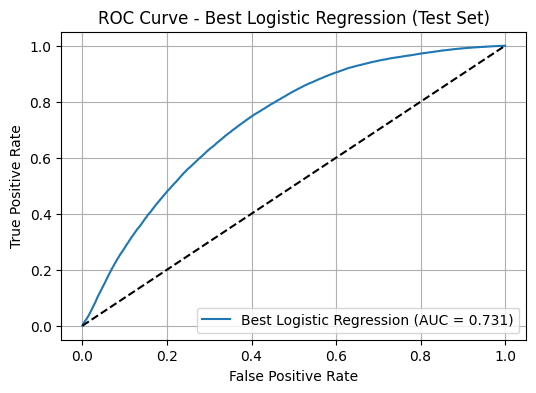

In [ ]:
print("Evaluating Best Logistic Regression Model on Test Set...")
y_pred_test_best = best_logreg_model.predict(X_test)
y_proba_test_best = best_logreg_model.predict_proba(X_test)[:, 1]

print("\n--- Test Set Evaluation ---")
print("Confusion Matrix (Test):")
cm_test_best = confusion_matrix(y_test, y_pred_test_best, labels=[0, 1])
disp_test_best = ConfusionMatrixDisplay(confusion_matrix=cm_test_best, display_labels=[0, 1])
disp_test_best.plot(cmap='Blues')
plt.title('Confusion Matrix - Best Logistic Regression (Test)')
plt.show()

print("Accuracy (Test) :", accuracy_score(y_test, y_pred_test_best))
print("Precision (Test):", precision_score(y_test, y_pred_test_best))
print("Recall (Test)   :", recall_score(y_test, y_pred_test_best))
print("F1-score (Test) :", f1_score(y_test, y_pred_test_best))
print("\nClassification Report (Test):\n")
print(classification_report(y_test, y_pred_test_best))

auc_test_best = roc_auc_score(y_test, y_proba_test_best)
print("ROC AUC (Test):", auc_test_best)

fpr_test_best, tpr_test_best, _ = roc_curve(y_test, y_proba_test_best)
plt.figure(figsize=(6, 4))
plt.plot(fpr_test_best, tpr_test_best, label=f'Best Logistic Regression (AUC = {auc_test_best:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best Logistic Regression (Test Set)')
plt.legend()
plt.grid()
plt.show()

### Pipeline (Logistic Regression dengan Hyperparameter)

In [ ]:
from sklearn.pipeline import Pipeline

# 1. Retrieve the best hyperparameters
best_logreg_params = grid_search_logreg.best_params_

# 2. Create the Pipeline object
best_lr_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('logistic_regression', LogisticRegression(
        random_state=42,
        C=best_logreg_params['C'],
        penalty=best_logreg_params['penalty'],
        solver=best_logreg_params['solver'],
        class_weight=best_logreg_params['class_weight']
    ))
])

# 3. Fit the best_lr_pipeline on the raw training data
print("Fitting Best Logistic Regression Pipeline with Tuned Hyperparameters...")
best_lr_pipeline.fit(X_train_raw, y_train)
print("Best Logistic Regression Pipeline fitted successfully.")

Fitting Best Logistic Regression Pipeline with Tuned Hyperparameters...
Best Logistic Regression Pipeline fitted successfully.



--- Evaluating Best Logistic Regression Pipeline on Training Set ---


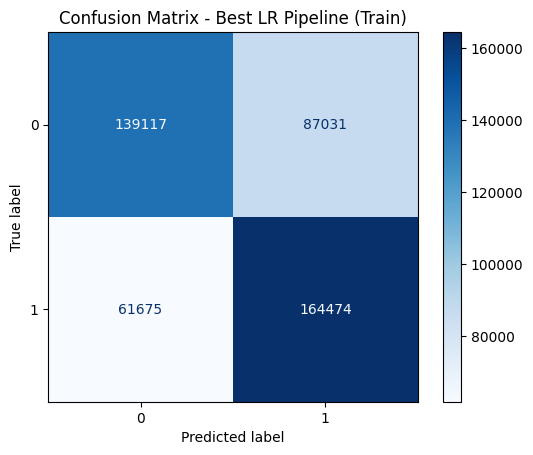

Accuracy (Train) : 0.6712204591230984
Precision (Train): 0.6539591658217531
Recall (Train)   : 0.7272815709996506
F1-score (Train) : 0.6886742286257417

Classification Report (Train):

              precision    recall  f1-score   support

           0       0.69      0.62      0.65    226148
           1       0.65      0.73      0.69    226149

    accuracy                           0.67    452297
   macro avg       0.67      0.67      0.67    452297
weighted avg       0.67      0.67      0.67    452297

ROC AUC (Train): 0.7268276694566326


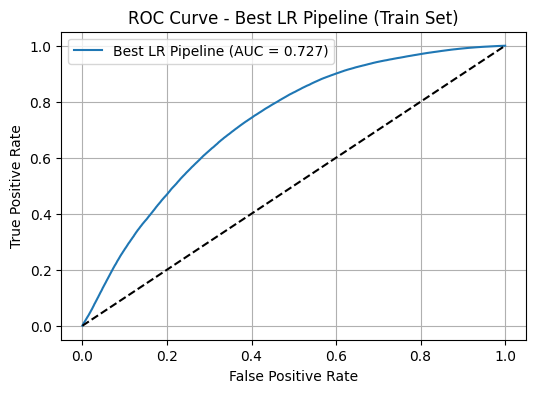

In [ ]:
print("\n--- Evaluating Best Logistic Regression Pipeline on Training Set ---")
# Predict on train set
y_pred_train_pipeline_best = best_lr_pipeline.predict(X_train_raw)
y_proba_train_pipeline_best = best_lr_pipeline.predict_proba(X_train_raw)[:, 1]

# Confusion Matrix - Train
cm_train_pipeline_best = confusion_matrix(y_train, y_pred_train_pipeline_best, labels=[0, 1])
disp_train_pipeline_best = ConfusionMatrixDisplay(confusion_matrix=cm_train_pipeline_best, display_labels=[0, 1])
disp_train_pipeline_best.plot(cmap='Blues')
plt.title('Confusion Matrix - Best LR Pipeline (Train)')
plt.show()

# Metrics - Train
print("Accuracy (Train) :", accuracy_score(y_train, y_pred_train_pipeline_best))
print("Precision (Train):", precision_score(y_train, y_pred_train_pipeline_best))
print("Recall (Train)   :", recall_score(y_train, y_pred_train_pipeline_best))
print("F1-score (Train) :", f1_score(y_train, y_pred_train_pipeline_best))
print("\nClassification Report (Train):\n")
print(classification_report(y_train, y_pred_train_pipeline_best))

# ROC AUC & Curve - Train
auc_train_pipeline_best = roc_auc_score(y_train, y_proba_train_pipeline_best)
print("ROC AUC (Train):", auc_train_pipeline_best)
fpr_train_pipeline_best, tpr_train_pipeline_best, _ = roc_curve(y_train, y_proba_train_pipeline_best)
plt.figure(figsize=(6, 4))
plt.plot(fpr_train_pipeline_best, tpr_train_pipeline_best, label=f'Best LR Pipeline (AUC = {auc_train_pipeline_best:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best LR Pipeline (Train Set)')
plt.legend()
plt.grid()
plt.show()

Evaluating Best Logistic Regression Model on Test Set...

--- Test Set Evaluation ---
Confusion Matrix (Test):


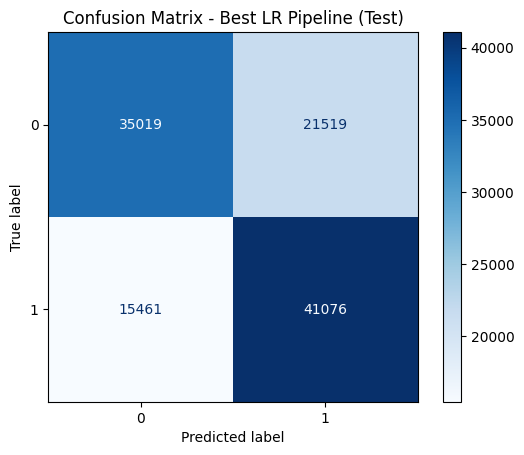

Accuracy (Test) : 0.6729604244970152
Precision (Test): 0.6562185478073329
Recall (Test)   : 0.7265330668411837
F1-score (Test) : 0.689588020011416

Classification Report (Test):

              precision    recall  f1-score   support

           0       0.69      0.62      0.65     56538
           1       0.66      0.73      0.69     56537

    accuracy                           0.67    113075
   macro avg       0.67      0.67      0.67    113075
weighted avg       0.67      0.67      0.67    113075

ROC AUC (Test): 0.7305815342003881


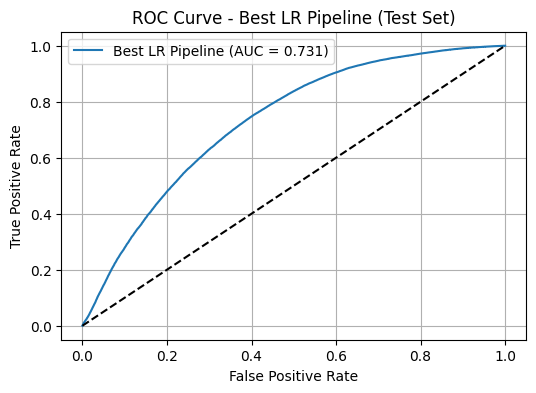

In [ ]:
print("Evaluating Best Logistic Regression Model on Test Set...")
# Prediksi di test set menggunakan model terbaik
y_pred_test_pipeline_best = best_lr_pipeline.predict(X_test_raw)
y_proba_test_pipeline_best = best_lr_pipeline.predict_proba(X_test_raw)[:, 1]

# Confusion Matrix for Test Set
print("\n--- Test Set Evaluation ---")
print("Confusion Matrix (Test):")
cm_test_pipeline_best = confusion_matrix(y_test, y_pred_test_pipeline_best, labels=[0, 1])
disp_test_pipeline_best = ConfusionMatrixDisplay(confusion_matrix=cm_test_pipeline_best, display_labels=[0, 1])
disp_test_pipeline_best.plot(cmap='Blues')
plt.title('Confusion Matrix - Best LR Pipeline (Test)')
plt.show()

# Metrics for Test Set
print("Accuracy (Test) :", accuracy_score(y_test, y_pred_test_pipeline_best))
print("Precision (Test):", precision_score(y_test, y_pred_test_pipeline_best))
print("Recall (Test)   :", recall_score(y_test, y_pred_test_pipeline_best))
print("F1-score (Test) :", f1_score(y_test, y_pred_test_pipeline_best))
print("\nClassification Report (Test):\n")
print(classification_report(y_test, y_pred_test_pipeline_best))

# ROC AUC for Test Set
auc_test_pipeline_best = roc_auc_score(y_test, y_proba_test_pipeline_best)
print("ROC AUC (Test):", auc_test_pipeline_best)

# ROC Curve for Test Set
fpr_test_pipeline_best, tpr_test_pipeline_best, _ = roc_curve(y_test, y_proba_test_pipeline_best)
plt.figure(figsize=(6, 4))
plt.plot(fpr_test_pipeline_best, tpr_test_pipeline_best, label=f'Best LR Pipeline (AUC = {auc_test_pipeline_best:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best LR Pipeline (Test Set)')
plt.legend()
plt.grid()
plt.show()

## XG Boost

In [ ]:
# Define the hyperparameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [150],
    #'n_estimators': [50, 100, 150],
    'max_depth': [7],
    #'max_depth': [3, 5, 7],
    'learning_rate': [0.2],
    #'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7], # Fraction of samples used for fitting the trees
    #'subsample': [0.7, 0.8],
    'colsample_bytree': [0.8], # Fraction of features used for fitting the trees
    #'colsample_bytree': [0.7, 0.8],
    # Parameter tambahan:
    'min_child_weight': [1],
    #'min_child_weight': [1, 3, 5],
}

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
# Suppress warning for use_label_encoder and set eval_metric for current XGBoost versions

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=xgb_param_grid,
    scoring='roc_auc', # Keep ROC AUC for consistency with previous Logistic Regression evaluation
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42), # Using StratifiedKFold for imbalanced data
    n_jobs=-1,  # Use all available processor cores
    verbose=2
)

# Fit GridSearchCV to the training data (resampled and scaled)
print("Starting GridSearchCV for XGBoost...")
grid_search_xgb.fit(X_train, y_train)
print("GridSearchCV for XGBoost completed.")

# Summarize results
print("\nBest XGBoost Model Parameters:")
print(grid_search_xgb.best_params_)

print("\nBest ROC AUC Score (from cross-validation):")
print(grid_search_xgb.best_score_)

Starting GridSearchCV for XGBoost...
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:08:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV for XGBoost completed.

Best XGBoost Model Parameters:
{'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 150, 'subsample': 0.7}

Best ROC AUC Score (from cross-validation):
0.937046614664979


In [ ]:
# Get the best XGBoost model from GridSearchCV
best_xgb_model = grid_search_xgb.best_estimator_

print("Best XGBoost Model with Tuned Hyperparameters:")
print(best_xgb_model)

Best XGBoost Model with Tuned Hyperparameters:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, ...)


### train

Evaluating Best XGBoost Model on Training Set...

--- Training Set Evaluation ---
Confusion Matrix (Train):


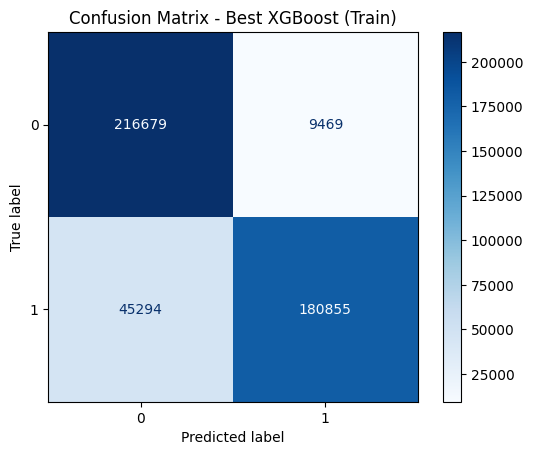

Accuracy (Train) : 0.8789224779293252
Precision (Train): 0.9502479981505223
Recall (Train)   : 0.7997161163657589
F1-score (Train) : 0.8685076823707659

Classification Report (Train):

              precision    recall  f1-score   support

           0       0.83      0.96      0.89    226148
           1       0.95      0.80      0.87    226149

    accuracy                           0.88    452297
   macro avg       0.89      0.88      0.88    452297
weighted avg       0.89      0.88      0.88    452297

ROC AUC (Train): 0.9447041165356473


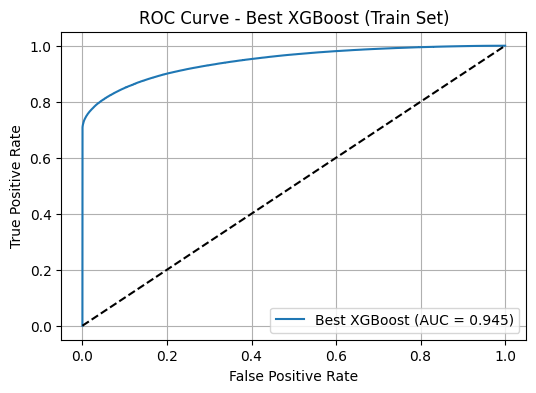

In [ ]:
print("Evaluating Best XGBoost Model on Training Set...")
y_pred_train_xgb_best = best_xgb_model.predict(X_train)
y_proba_train_xgb_best = best_xgb_model.predict_proba(X_train)[:, 1]

print("\n--- Training Set Evaluation ---")
print("Confusion Matrix (Train):")
cm_train_xgb_best = confusion_matrix(y_train, y_pred_train_xgb_best, labels=[0, 1])
disp_train_xgb_best = ConfusionMatrixDisplay(confusion_matrix=cm_train_xgb_best, display_labels=[0, 1])
disp_train_xgb_best.plot(cmap='Blues')
plt.title('Confusion Matrix - Best XGBoost (Train)')
plt.show()

print("Accuracy (Train) :", accuracy_score(y_train, y_pred_train_xgb_best))
print("Precision (Train):", precision_score(y_train, y_pred_train_xgb_best))
print("Recall (Train)   :", recall_score(y_train, y_pred_train_xgb_best))
print("F1-score (Train) :", f1_score(y_train, y_pred_train_xgb_best))
print("\nClassification Report (Train):\n")
print(classification_report(y_train, y_pred_train_xgb_best))

auc_train_xgb_best = roc_auc_score(y_train, y_proba_train_xgb_best)
print("ROC AUC (Train):", auc_train_xgb_best)

fpr_train_xgb_best, tpr_train_xgb_best, _ = roc_curve(y_train, y_proba_train_xgb_best)
plt.figure(figsize=(6, 4))
plt.plot(fpr_train_xgb_best, tpr_train_xgb_best, label=f'Best XGBoost (AUC = {auc_train_xgb_best:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best XGBoost (Train Set)')
plt.legend()
plt.grid()
plt.show()

### test

Evaluating Best XGBoost Model on Test Set...

--- Test Set Evaluation ---
Confusion Matrix (Test):


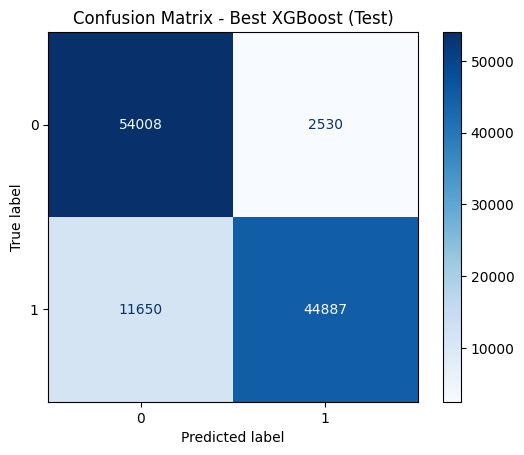

Accuracy (Test) : 0.8745965067433119
Precision (Test): 0.9466436088322754
Recall (Test)   : 0.7939402515167059
F1-score (Test) : 0.8635935125151509

Classification Report (Test):

              precision    recall  f1-score   support

           0       0.82      0.96      0.88     56538
           1       0.95      0.79      0.86     56537

    accuracy                           0.87    113075
   macro avg       0.88      0.87      0.87    113075
weighted avg       0.88      0.87      0.87    113075

ROC AUC (Test): 0.9375066198024213


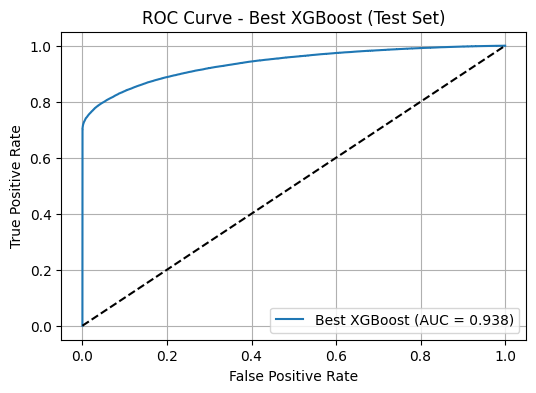

In [ ]:
print("Evaluating Best XGBoost Model on Test Set...")
y_pred_test_xgb_best = best_xgb_model.predict(X_test)
y_proba_test_xgb_best = best_xgb_model.predict_proba(X_test)[:, 1]

print("\n--- Test Set Evaluation ---")
print("Confusion Matrix (Test):")
cm_test_xgb_best = confusion_matrix(y_test, y_pred_test_xgb_best, labels=[0, 1])
disp_test_xgb_best = ConfusionMatrixDisplay(confusion_matrix=cm_test_xgb_best, display_labels=[0, 1])
disp_test_xgb_best.plot(cmap='Blues')
plt.title('Confusion Matrix - Best XGBoost (Test)')
plt.show()

print("Accuracy (Test) :", accuracy_score(y_test, y_pred_test_xgb_best))
print("Precision (Test):", precision_score(y_test, y_pred_test_xgb_best))
print("Recall (Test)   :", recall_score(y_test, y_pred_test_xgb_best))
print("F1-score (Test) :", f1_score(y_test, y_pred_test_xgb_best))
print("\nClassification Report (Test):\n")
print(classification_report(y_test, y_pred_test_xgb_best))

auc_test_xgb_best = roc_auc_score(y_test, y_proba_test_xgb_best)
print("ROC AUC (Test):", auc_test_xgb_best)

fpr_test_xgb_best, tpr_test_xgb_best, _ = roc_curve(y_test, y_proba_test_xgb_best)
plt.figure(figsize=(6, 4))
plt.plot(fpr_test_xgb_best, tpr_test_xgb_best, label=f'Best XGBoost (AUC = {auc_test_xgb_best:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best XGBoost (Test Set)')
plt.legend()
plt.grid()
plt.show()

### Pipeline (XG Boost dengan Hyperparameter)

In [ ]:
# Pipeline baru menggunakan model terbaik hasil GridSearchCV
best_xgb_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('xgb_classifier', best_xgb_model)   # memasukkan model terbaik langsung
])

print("Fitting Best XGBoost Pipeline with Tuned Hyperparameters...")
best_xgb_pipeline.fit(X_train_raw, y_train)
print("Best XGBoost Pipeline fitted successfully.")

Fitting Best XGBoost Pipeline with Tuned Hyperparameters...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:08:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGBoost Pipeline fitted successfully.



--- Evaluating Best XGBoost Pipeline on Training Set ---


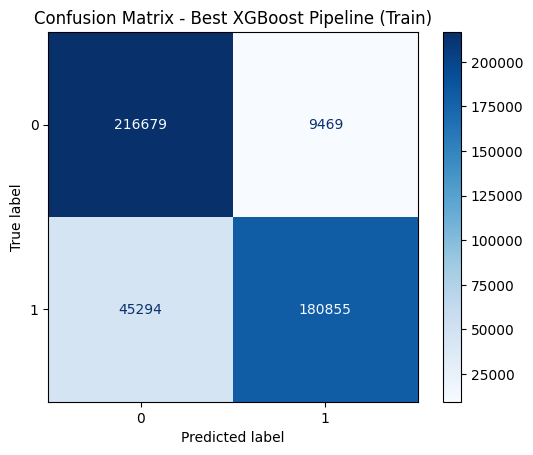

Accuracy (Train) : 0.8789224779293252
Precision (Train): 0.9502479981505223
Recall (Train)   : 0.7997161163657589
F1-score (Train) : 0.8685076823707659

Classification Report (Train):

              precision    recall  f1-score   support

           0       0.83      0.96      0.89    226148
           1       0.95      0.80      0.87    226149

    accuracy                           0.88    452297
   macro avg       0.89      0.88      0.88    452297
weighted avg       0.89      0.88      0.88    452297

ROC AUC (Train): 0.9447041165356473


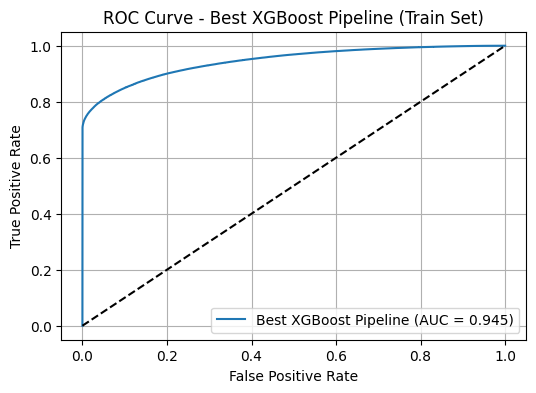

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                            roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay)

# --- Evaluation on Training Set ---
print("\n--- Evaluating Best XGBoost Pipeline on Training Set ---")
# Predict on raw training data using the fitted pipeline
y_pred_train_best_xgb_pipeline = best_xgb_pipeline.predict(X_train_raw)
y_proba_train_best_xgb_pipeline = best_xgb_pipeline.predict_proba(X_train_raw)[:, 1]

# Confusion Matrix - Train
cm_train_best_xgb_pipeline = confusion_matrix(y_train, y_pred_train_best_xgb_pipeline, labels=[0, 1])
disp_train_best_xgb_pipeline = ConfusionMatrixDisplay(confusion_matrix=cm_train_best_xgb_pipeline, display_labels=[0, 1])
disp_train_best_xgb_pipeline.plot(cmap='Blues')
plt.title('Confusion Matrix - Best XGBoost Pipeline (Train)')
plt.show()

# Metrics - Train
print("Accuracy (Train) :", accuracy_score(y_train, y_pred_train_best_xgb_pipeline))
print("Precision (Train):", precision_score(y_train, y_pred_train_best_xgb_pipeline))
print("Recall (Train)   :", recall_score(y_train, y_pred_train_best_xgb_pipeline))
print("F1-score (Train) :", f1_score(y_train, y_pred_train_best_xgb_pipeline))
print("\nClassification Report (Train):\n")
print(classification_report(y_train, y_pred_train_best_xgb_pipeline))

# ROC AUC & Curve - Train
auc_train_best_xgb_pipeline = roc_auc_score(y_train, y_proba_train_best_xgb_pipeline)
print("ROC AUC (Train):", auc_train_best_xgb_pipeline)
fpr_train_best_xgb_pipeline, tpr_train_best_xgb_pipeline, _ = roc_curve(y_train, y_proba_train_best_xgb_pipeline)
plt.figure(figsize=(6, 4))
plt.plot(fpr_train_best_xgb_pipeline, tpr_train_best_xgb_pipeline, label=f'Best XGBoost Pipeline (AUC = {auc_train_best_xgb_pipeline:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best XGBoost Pipeline (Train Set)')
plt.legend()
plt.grid()
plt.show()


--- Evaluating Best XGBoost Pipeline on Test Set ---


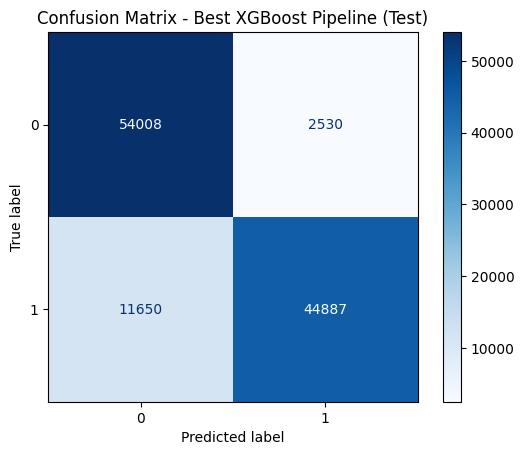

Accuracy (Test) : 0.8745965067433119
Precision (Test): 0.9466436088322754
Recall (Test)   : 0.7939402515167059
F1-score (Test) : 0.8635935125151509

Classification Report (Test):

              precision    recall  f1-score   support

           0       0.82      0.96      0.88     56538
           1       0.95      0.79      0.86     56537

    accuracy                           0.87    113075
   macro avg       0.88      0.87      0.87    113075
weighted avg       0.88      0.87      0.87    113075

ROC AUC (Test): 0.9375066198024213


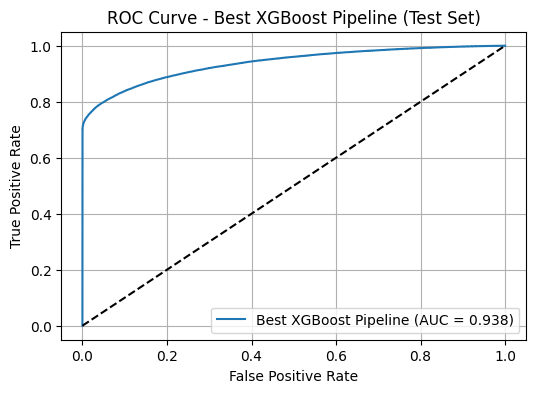

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                            roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay)

# --- Evaluation on Test Set ---
print("\n--- Evaluating Best XGBoost Pipeline on Test Set ---")
# Predict on raw test data using the fitted pipeline
y_pred_test_best_xgb_pipeline = best_xgb_pipeline.predict(X_test_raw)
y_proba_test_best_xgb_pipeline = best_xgb_pipeline.predict_proba(X_test_raw)[:, 1]

# Confusion Matrix - Test
cm_test_best_xgb_pipeline = confusion_matrix(y_test, y_pred_test_best_xgb_pipeline, labels=[0, 1])
disp_test_best_xgb_pipeline = ConfusionMatrixDisplay(confusion_matrix=cm_test_best_xgb_pipeline, display_labels=[0, 1])
disp_test_best_xgb_pipeline.plot(cmap='Blues')
plt.title('Confusion Matrix - Best XGBoost Pipeline (Test)')
plt.show()

# Metrics - Test
print("Accuracy (Test) :", accuracy_score(y_test, y_pred_test_best_xgb_pipeline))
print("Precision (Test):", precision_score(y_test, y_pred_test_best_xgb_pipeline))
print("Recall (Test)   :", recall_score(y_test, y_pred_test_best_xgb_pipeline))
print("F1-score (Test) :", f1_score(y_test, y_pred_test_best_xgb_pipeline))
print("\nClassification Report (Test):\n")
print(classification_report(y_test, y_pred_test_best_xgb_pipeline))

# ROC AUC & Curve - Test
auc_test_best_xgb_pipeline = roc_auc_score(y_test, y_proba_test_best_xgb_pipeline)
print("ROC AUC (Test):", auc_test_best_xgb_pipeline)
fpr_test_best_xgb_pipeline, tpr_test_best_xgb_pipeline, _ = roc_curve(y_test, y_proba_test_best_xgb_pipeline)
plt.figure(figsize=(6, 4))
plt.plot(fpr_test_best_xgb_pipeline, tpr_test_best_xgb_pipeline, label=f'Best XGBoost Pipeline (AUC = {auc_test_best_xgb_pipeline:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best XGBoost Pipeline (Test Set)')
plt.legend()
plt.grid()
plt.show()

## Decision Tree


In [ ]:
dt_param_grid = {
    'max_depth': [11],
    #'max_depth': [7, 9, 11],
    'min_samples_split': [2],
    #'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [10],
    #'min_samples_leaf': [2, 5, 10],
    'criterion': ['gini'],
    #'criterion': ['gini', 'entropy'],
    'max_features': [None],
    #'max_features': ['sqrt', 'log2', None],
}
print("Decision Tree hyperparameter grid defined successfully.")

Decision Tree hyperparameter grid defined successfully.


In [ ]:
# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(
    estimator=dt_model,
    param_grid=dt_param_grid,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV
print("Starting GridSearchCV for Decision Tree...")
grid_search_dt.fit(X_train, y_train)
print("GridSearchCV for Decision Tree completed.")

Starting GridSearchCV for Decision Tree...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
GridSearchCV for Decision Tree completed.


In [ ]:
best_dt_model = grid_search_dt.best_estimator_

print("Best Decision Tree Model:")
print(best_dt_model)

print("Best Parameters Found:")
print(grid_search_dt.best_params_)

print("Best ROC AUC Score (from cross-validation):")
print(grid_search_dt.best_score_)

Best Decision Tree Model:
DecisionTreeClassifier(max_depth=11, min_samples_leaf=10, random_state=42)
Best Parameters Found:
{'criterion': 'gini', 'max_depth': 11, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best ROC AUC Score (from cross-validation):
0.8781662539933069


### train



Evaluating Best Decision Tree Model on Training Set...

--- Training Set Evaluation ---
Confusion Matrix (Train):


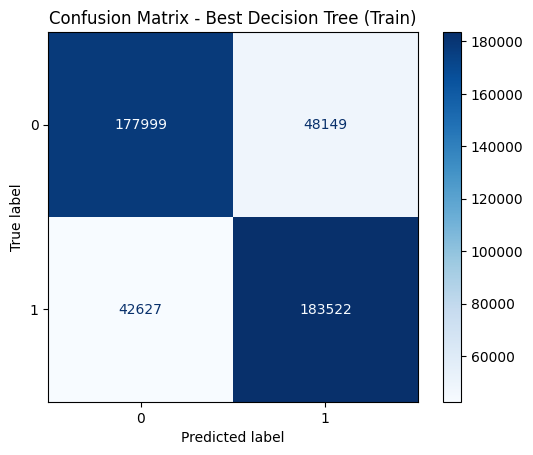

Accuracy (Train) : 0.7993000174663993
Precision (Train): 0.7921664774615726
Recall (Train)   : 0.8115092262181128
F1-score (Train) : 0.8017212004718012

Classification Report (Train):

              precision    recall  f1-score   support

           0       0.81      0.79      0.80    226148
           1       0.79      0.81      0.80    226149

    accuracy                           0.80    452297
   macro avg       0.80      0.80      0.80    452297
weighted avg       0.80      0.80      0.80    452297

ROC AUC (Train): 0.8859053612823046


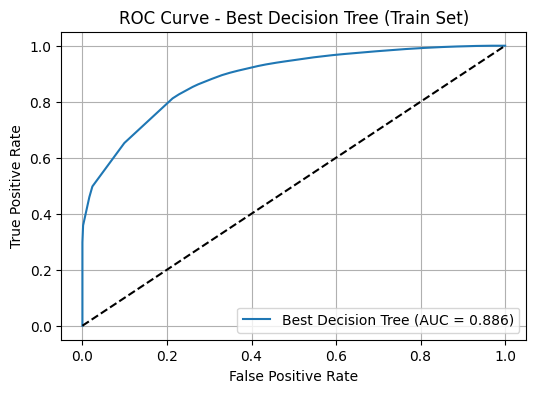

In [ ]:
print("Evaluating Best Decision Tree Model on Training Set...")
y_pred_train_dt_best = best_dt_model.predict(X_train)
y_proba_train_dt_best = best_dt_model.predict_proba(X_train)[:, 1]

print("\n--- Training Set Evaluation ---")
print("Confusion Matrix (Train):")
cm_train_dt_best = confusion_matrix(y_train, y_pred_train_dt_best, labels=[0, 1])
disp_train_dt_best = ConfusionMatrixDisplay(confusion_matrix=cm_train_dt_best, display_labels=[0, 1])
disp_train_dt_best.plot(cmap='Blues')
plt.title('Confusion Matrix - Best Decision Tree (Train)')
plt.show()

print("Accuracy (Train) :", accuracy_score(y_train, y_pred_train_dt_best))
print("Precision (Train):", precision_score(y_train, y_pred_train_dt_best))
print("Recall (Train)   :", recall_score(y_train, y_pred_train_dt_best))
print("F1-score (Train) :", f1_score(y_train, y_pred_train_dt_best))

print("\nClassification Report (Train):\n")
print(classification_report(y_train, y_pred_train_dt_best))

auc_train_dt_best = roc_auc_score(y_train, y_proba_train_dt_best)
print("ROC AUC (Train):", auc_train_dt_best)

fpr_train_dt_best, tpr_train_dt_best, _ = roc_curve(y_train, y_proba_train_dt_best)
plt.figure(figsize=(6, 4))
plt.plot(fpr_train_dt_best, tpr_train_dt_best, label=f'Best Decision Tree (AUC = {auc_train_dt_best:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best Decision Tree (Train Set)')
plt.legend()
plt.grid()
plt.show()

### test

Evaluating Best Decision Tree Model on Test Set...

--- Test Set Evaluation ---
Confusion Matrix (Test):


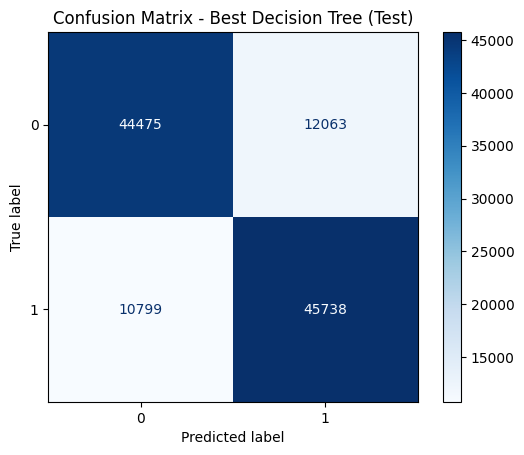

Accuracy (Test) : 0.7978156091089984
Precision (Test): 0.7913011885607515
Recall (Test)   : 0.8089923412986186
F1-score (Test) : 0.8000489775927513

Classification Report (Test):

              precision    recall  f1-score   support

           0       0.80      0.79      0.80     56538
           1       0.79      0.81      0.80     56537

    accuracy                           0.80    113075
   macro avg       0.80      0.80      0.80    113075
weighted avg       0.80      0.80      0.80    113075

ROC AUC (Test): 0.8821860270520208


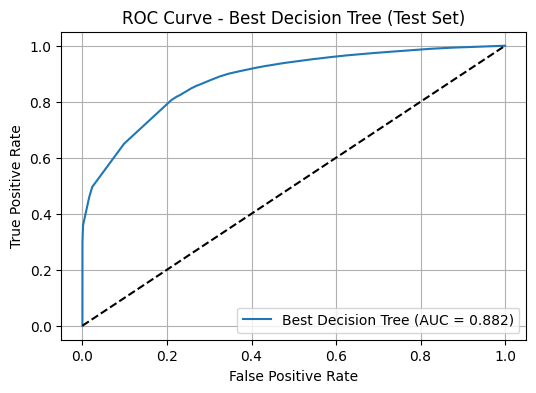

In [ ]:
print("Evaluating Best Decision Tree Model on Test Set...")
y_pred_test_dt_best = best_dt_model.predict(X_test)
y_proba_test_dt_best = best_dt_model.predict_proba(X_test)[:, 1]

print("\n--- Test Set Evaluation ---")
print("Confusion Matrix (Test):")
cm_test_dt_best = confusion_matrix(y_test, y_pred_test_dt_best, labels=[0, 1])
disp_test_dt_best = ConfusionMatrixDisplay(confusion_matrix=cm_test_dt_best, display_labels=[0, 1])
disp_test_dt_best.plot(cmap='Blues')
plt.title('Confusion Matrix - Best Decision Tree (Test)')
plt.show()

print("Accuracy (Test) :", accuracy_score(y_test, y_pred_test_dt_best))
print("Precision (Test):", precision_score(y_test, y_pred_test_dt_best))
print("Recall (Test)   :", recall_score(y_test, y_pred_test_dt_best))
print("F1-score (Test) :", f1_score(y_test, y_pred_test_dt_best))
print("\nClassification Report (Test):\n")
print(classification_report(y_test, y_pred_test_dt_best))

auc_test_dt_best = roc_auc_score(y_test, y_proba_test_dt_best)
print("ROC AUC (Test):", auc_test_dt_best)

fpr_test_dt_best, tpr_test_dt_best, _ = roc_curve(y_test, y_proba_test_dt_best)
plt.figure(figsize=(6, 4))
plt.plot(fpr_test_dt_best, tpr_test_dt_best, label=f'Best Decision Tree (AUC = {auc_test_dt_best:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best Decision Tree (Test Set)')
plt.legend()
plt.grid()
plt.show()

### Pipeline (Decision Tree dengan Hyperparameter)

In [ ]:
from sklearn.pipeline import Pipeline

# 1. Retrieve the best hyperparameters for the Decision Tree model
best_dt_params = grid_search_dt.best_params_

# 2. Create the Pipeline object
best_dt_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('dt_classifier', DecisionTreeClassifier(
        random_state=42,
        max_depth=best_dt_params['max_depth'],
        min_samples_split=best_dt_params['min_samples_split'],
        min_samples_leaf=best_dt_params['min_samples_leaf'],
        criterion=best_dt_params['criterion']
    ))
])

# 3. Fit the best_dt_pipeline to the raw training data
print("Fitting Best Decision Tree Pipeline with Tuned Hyperparameters...")
best_dt_pipeline.fit(X_train_raw, y_train)
print("Best Decision Tree Pipeline fitted successfully.")

Fitting Best Decision Tree Pipeline with Tuned Hyperparameters...
Best Decision Tree Pipeline fitted successfully.



--- Evaluating Best Decision Tree Pipeline on Training Set ---


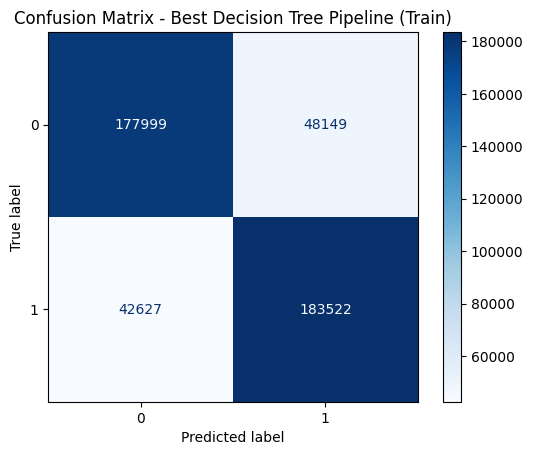

Accuracy (Train) : 0.7993000174663993
Precision (Train): 0.7921664774615726
Recall (Train)   : 0.8115092262181128
F1-score (Train) : 0.8017212004718012

Classification Report (Train):

              precision    recall  f1-score   support

           0       0.81      0.79      0.80    226148
           1       0.79      0.81      0.80    226149

    accuracy                           0.80    452297
   macro avg       0.80      0.80      0.80    452297
weighted avg       0.80      0.80      0.80    452297

ROC AUC (Train): 0.8859053612823046


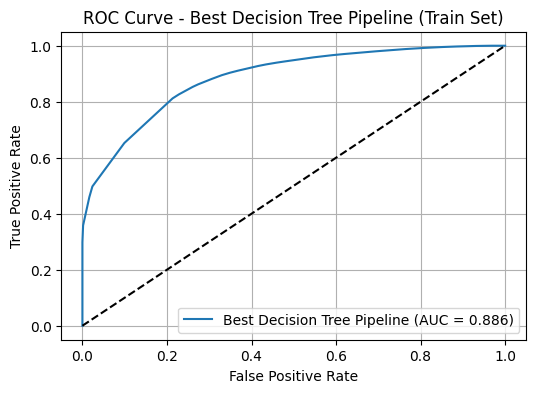

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# --- Evaluation on Training Set ---
print("\n--- Evaluating Best Decision Tree Pipeline on Training Set ---")
# Predict on raw training data using the fitted pipeline
y_pred_train_best_dt_pipeline = best_dt_pipeline.predict(X_train_raw)
y_proba_train_best_dt_pipeline = best_dt_pipeline.predict_proba(X_train_raw)[:, 1]

# Confusion Matrix - Train
cm_train_best_dt_pipeline = confusion_matrix(y_train, y_pred_train_best_dt_pipeline, labels=[0, 1])
disp_train_best_dt_pipeline = ConfusionMatrixDisplay(confusion_matrix=cm_train_best_dt_pipeline, display_labels=[0, 1])
disp_train_best_dt_pipeline.plot(cmap='Blues')
plt.title('Confusion Matrix - Best Decision Tree Pipeline (Train)')
plt.show()

# Metrics - Train
print("Accuracy (Train) :", accuracy_score(y_train, y_pred_train_best_dt_pipeline))
print("Precision (Train):", precision_score(y_train, y_pred_train_best_dt_pipeline))
print("Recall (Train)   :", recall_score(y_train, y_pred_train_best_dt_pipeline))
print("F1-score (Train) :", f1_score(y_train, y_pred_train_best_dt_pipeline))
print("\nClassification Report (Train):\n")
print(classification_report(y_train, y_pred_train_best_dt_pipeline))

# ROC AUC & Curve - Train
auc_train_best_dt_pipeline = roc_auc_score(y_train, y_proba_train_best_dt_pipeline)
print("ROC AUC (Train):", auc_train_best_dt_pipeline)
fpr_train_best_dt_pipeline, tpr_train_best_dt_pipeline, _ = roc_curve(y_train, y_proba_train_best_dt_pipeline)
plt.figure(figsize=(6, 4))
plt.plot(fpr_train_best_dt_pipeline, tpr_train_best_dt_pipeline, label=f'Best Decision Tree Pipeline (AUC = {auc_train_best_dt_pipeline:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best Decision Tree Pipeline (Train Set)')
plt.legend()
plt.grid()
plt.show()


--- Evaluating Best Decision Tree Pipeline on Test Set ---


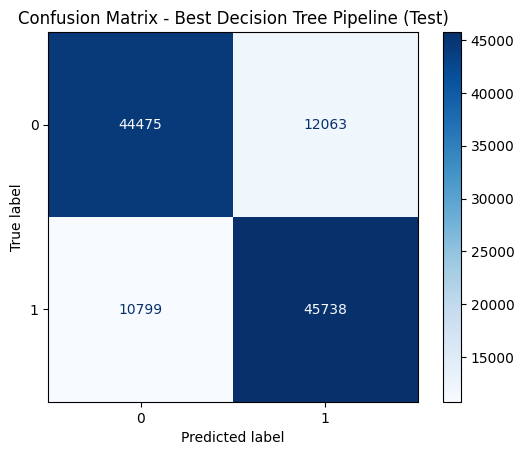

Accuracy (Test) : 0.7978156091089984
Precision (Test): 0.7913011885607515
Recall (Test)   : 0.8089923412986186
F1-score (Test) : 0.8000489775927513

Classification Report (Test):

              precision    recall  f1-score   support

           0       0.80      0.79      0.80     56538
           1       0.79      0.81      0.80     56537

    accuracy                           0.80    113075
   macro avg       0.80      0.80      0.80    113075
weighted avg       0.80      0.80      0.80    113075

ROC AUC (Test): 0.8821860270520208


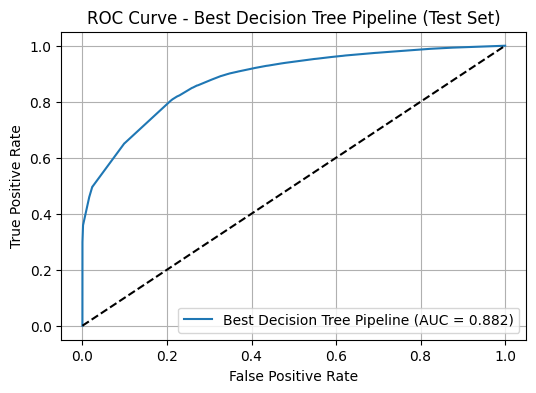

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# --- Evaluation on Test Set ---
print("\n--- Evaluating Best Decision Tree Pipeline on Test Set ---")
# Predict on raw test data using the fitted pipeline
y_pred_test_best_dt_pipeline = best_dt_pipeline.predict(X_test_raw)
y_proba_test_best_dt_pipeline = best_dt_pipeline.predict_proba(X_test_raw)[:, 1]

# Confusion Matrix - Test
cm_test_best_dt_pipeline = confusion_matrix(y_test, y_pred_test_best_dt_pipeline, labels=[0, 1])
disp_test_best_dt_pipeline = ConfusionMatrixDisplay(confusion_matrix=cm_test_best_dt_pipeline, display_labels=[0, 1])
disp_test_best_dt_pipeline.plot(cmap='Blues')
plt.title('Confusion Matrix - Best Decision Tree Pipeline (Test)')
plt.show()

# Metrics - Test
print("Accuracy (Test) :", accuracy_score(y_test, y_pred_test_best_dt_pipeline))
print("Precision (Test):", precision_score(y_test, y_pred_test_best_dt_pipeline))
print("Recall (Test)   :", recall_score(y_test, y_pred_test_best_dt_pipeline))
print("F1-score (Test) :", f1_score(y_test, y_pred_test_best_dt_pipeline))
print("\nClassification Report (Test):\n")
print(classification_report(y_test, y_pred_test_best_dt_pipeline))

# ROC AUC & Curve - Test
auc_test_best_dt_pipeline = roc_auc_score(y_test, y_proba_test_best_dt_pipeline)
print("ROC AUC (Test):", auc_test_best_dt_pipeline)
fpr_test_best_dt_pipeline, tpr_test_best_dt_pipeline, _ = roc_curve(y_test, y_proba_test_best_dt_pipeline)
plt.figure(figsize=(6, 4))
plt.plot(fpr_test_best_dt_pipeline, tpr_test_best_dt_pipeline, label=f'Best Decision Tree Pipeline (AUC = {auc_test_best_dt_pipeline:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best Decision Tree Pipeline (Test Set)')
plt.legend()
plt.grid()
plt.show()

## Random Forest

In [ ]:
rf_param_grid = {
    #'max_depth': [7, 9, 11],
    'max_depth': [11],
    #'min_samples_split': [2, 6, 10],
    'min_samples_split': [2],
    #'min_samples_leaf': [2, 6, 10], # 10
    'min_samples_leaf': [10],
    'criterion': ['gini'],
}
print("Random Forest hyperparameter grid defined successfully.")

Random Forest hyperparameter grid defined successfully.


In [ ]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_param_grid,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    n_jobs=-1,  # Use all available processor cores
    verbose=2
)

# Fit GridSearchCV
print("Starting GridSearchCV for Random Forest...")
grid_search_rf.fit(X_train, y_train)
print("GridSearchCV for Random Forest completed.")

Starting GridSearchCV for Random Forest...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
GridSearchCV for Random Forest completed.


In [ ]:
best_dt_model = grid_search_dt.best_estimator_

print("Best Decision Tree Model:")
print(best_dt_model)

print("Best Parameters Found:")
print(grid_search_dt.best_params_)

print("Best ROC AUC Score (from cross-validation):")
print(grid_search_dt.best_score_)

Best Decision Tree Model:
DecisionTreeClassifier(max_depth=11, min_samples_leaf=10, random_state=42)
Best Parameters Found:
{'criterion': 'gini', 'max_depth': 11, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best ROC AUC Score (from cross-validation):
0.8781662539933069


### train

Evaluating Best Random Forest Model on Training Set...

--- Training Set Evaluation ---
Confusion Matrix (Train):


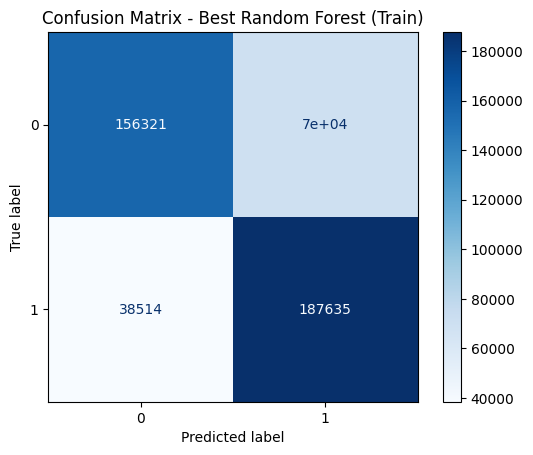

Accuracy (Train) : 0.7604649157522602
Precision (Train): 0.7287871608237332
Recall (Train)   : 0.829696350636085
F1-score (Train) : 0.7759749054508686

Classification Report (Train):

              precision    recall  f1-score   support

           0       0.80      0.69      0.74    226148
           1       0.73      0.83      0.78    226149

    accuracy                           0.76    452297
   macro avg       0.77      0.76      0.76    452297
weighted avg       0.77      0.76      0.76    452297

ROC AUC (Train): 0.8412775570906155


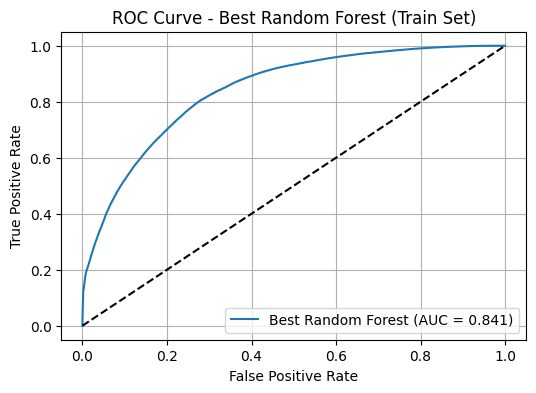

In [ ]:
print("Evaluating Best Random Forest Model on Training Set...")
best_rf_model = grid_search_rf.best_estimator_

y_pred_train_rf_best = best_rf_model.predict(X_train)
y_proba_train_rf_best = best_rf_model.predict_proba(X_train)[:, 1]

print("\n--- Training Set Evaluation ---")
print("Confusion Matrix (Train):")
cm_train_rf_best = confusion_matrix(y_train, y_pred_train_rf_best, labels=[0, 1])
disp_train_rf_best = ConfusionMatrixDisplay(confusion_matrix=cm_train_rf_best, display_labels=[0, 1])
disp_train_rf_best.plot(cmap='Blues')
plt.title('Confusion Matrix - Best Random Forest (Train)')
plt.show()

print("Accuracy (Train) :", accuracy_score(y_train, y_pred_train_rf_best))
print("Precision (Train):", precision_score(y_train, y_pred_train_rf_best))
print("Recall (Train)   :", recall_score(y_train, y_pred_train_rf_best))
print("F1-score (Train) :", f1_score(y_train, y_pred_train_rf_best))

print("\nClassification Report (Train):\n")
print(classification_report(y_train, y_pred_train_rf_best))

auc_train_rf_best = roc_auc_score(y_train, y_proba_train_rf_best)
print("ROC AUC (Train):", auc_train_rf_best)

fpr_train_rf_best, tpr_train_rf_best, _ = roc_curve(y_train, y_proba_train_rf_best)
plt.figure(figsize=(6, 4))
plt.plot(fpr_train_rf_best, tpr_train_rf_best, label=f'Best Random Forest (AUC = {auc_train_rf_best:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best Random Forest (Train Set)')
plt.legend()
plt.grid()
plt.show()

### test



Evaluating Best Random Forest Model on Test Set...

--- Test Set Evaluation ---
Confusion Matrix (Test):


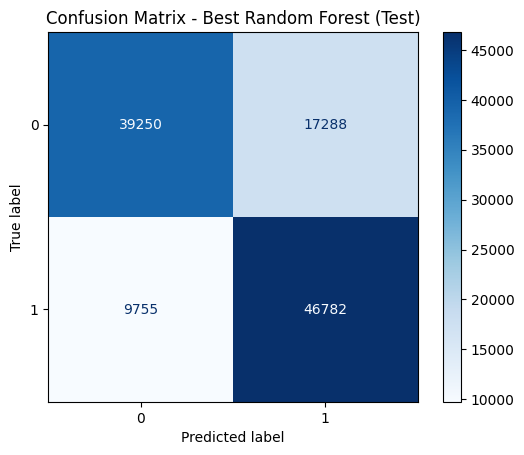

Accuracy (Test) : 0.7608401503426929
Precision (Test): 0.7301701264242235
Recall (Test)   : 0.8274581247678512
F1-score (Test) : 0.7757758670723921

Classification Report (Test):

              precision    recall  f1-score   support

           0       0.80      0.69      0.74     56538
           1       0.73      0.83      0.78     56537

    accuracy                           0.76    113075
   macro avg       0.77      0.76      0.76    113075
weighted avg       0.77      0.76      0.76    113075

ROC AUC (Test): 0.8405257449687517


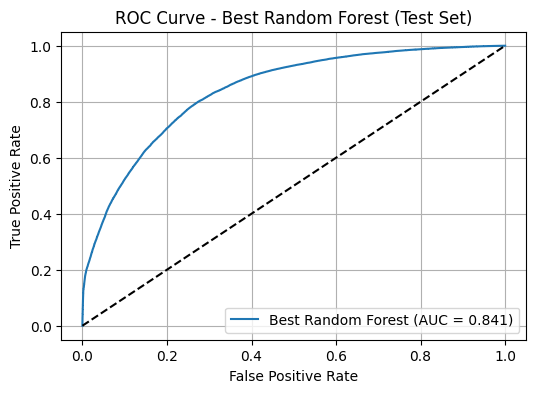

In [ ]:
print("Evaluating Best Random Forest Model on Test Set...")
best_rf_model = grid_search_rf.best_estimator_

y_pred_test_rf_best = best_rf_model.predict(X_test)
y_proba_test_rf_best = best_rf_model.predict_proba(X_test)[:, 1]

print("\n--- Test Set Evaluation ---")
print("Confusion Matrix (Test):")
cm_test_rf_best = confusion_matrix(y_test, y_pred_test_rf_best, labels=[0, 1])
disp_test_rf_best = ConfusionMatrixDisplay(confusion_matrix=cm_test_rf_best, display_labels=[0, 1])
disp_test_rf_best.plot(cmap='Blues')
plt.title('Confusion Matrix - Best Random Forest (Test)')
plt.show()

print("Accuracy (Test) :", accuracy_score(y_test, y_pred_test_rf_best))
print("Precision (Test):", precision_score(y_test, y_pred_test_rf_best))
print("Recall (Test)   :", recall_score(y_test, y_pred_test_rf_best))
print("F1-score (Test) :", f1_score(y_test, y_pred_test_rf_best))

print("\nClassification Report (Test):\n")
print(classification_report(y_test, y_pred_test_rf_best))

auc_test_rf_best = roc_auc_score(y_test, y_proba_test_rf_best)
print("ROC AUC (Test):", auc_test_rf_best)

fpr_test_rf_best, tpr_test_rf_best, _ = roc_curve(y_test, y_proba_test_rf_best)
plt.figure(figsize=(6, 4))
plt.plot(fpr_test_rf_best, tpr_test_rf_best, label=f'Best Random Forest (AUC = {auc_test_rf_best:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best Random Forest (Test Set)')
plt.legend()
plt.grid()
plt.show()

### Pipeline (Random Forest dengan Hyperparameter)

In [ ]:
from sklearn.pipeline import Pipeline

# 1. Retrieve the best hyperparameters for the Random Forest model
best_rf_params = grid_search_rf.best_params_

# 2. Create the Pipeline object
best_rf_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('rf_classifier', RandomForestClassifier(
        random_state=42,
        max_depth=best_rf_params['max_depth'],
        min_samples_split=best_rf_params['min_samples_split'],
        min_samples_leaf=best_rf_params['min_samples_leaf'],
        criterion=best_rf_params['criterion']
    ))
])

# 3. Fit the best_rf_pipeline to the raw training data
print("Fitting Best Random Forest Pipeline with Tuned Hyperparameters...")
best_rf_pipeline.fit(X_train_raw, y_train)
print("Best Random Forest Pipeline fitted successfully.")

Fitting Best Random Forest Pipeline with Tuned Hyperparameters...
Best Random Forest Pipeline fitted successfully.



--- Evaluating Best Random Forest Pipeline on Training Set ---


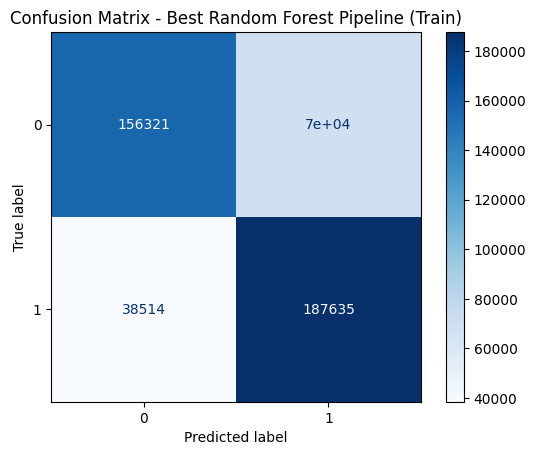

Accuracy (Train) : 0.7604649157522602
Precision (Train): 0.7287871608237332
Recall (Train)   : 0.829696350636085
F1-score (Train) : 0.7759749054508686

Classification Report (Train):

              precision    recall  f1-score   support

           0       0.80      0.69      0.74    226148
           1       0.73      0.83      0.78    226149

    accuracy                           0.76    452297
   macro avg       0.77      0.76      0.76    452297
weighted avg       0.77      0.76      0.76    452297

ROC AUC (Train): 0.8412775570906155


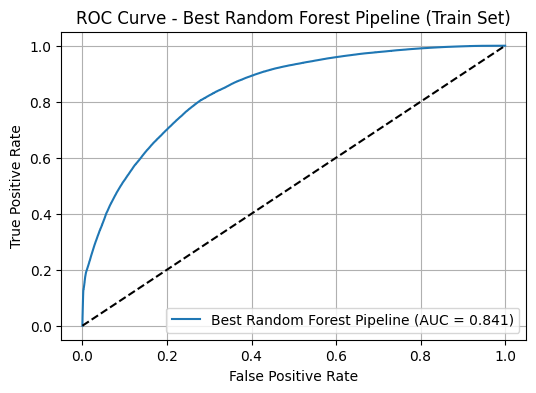

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# --- Evaluation on Training Set ---
print("\n--- Evaluating Best Random Forest Pipeline on Training Set ---")
# Predict on raw training data using the fitted pipeline
y_pred_train_best_rf_pipeline = best_rf_pipeline.predict(X_train_raw)
y_proba_train_best_rf_pipeline = best_rf_pipeline.predict_proba(X_train_raw)[:, 1]

# Confusion Matrix - Train
cm_train_best_rf_pipeline = confusion_matrix(y_train, y_pred_train_best_rf_pipeline, labels=[0, 1])
disp_train_best_rf_pipeline = ConfusionMatrixDisplay(confusion_matrix=cm_train_best_rf_pipeline, display_labels=[0, 1])
disp_train_best_rf_pipeline.plot(cmap='Blues')
plt.title('Confusion Matrix - Best Random Forest Pipeline (Train)')
plt.show()

# Metrics - Train
print("Accuracy (Train) :", accuracy_score(y_train, y_pred_train_best_rf_pipeline))
print("Precision (Train):", precision_score(y_train, y_pred_train_best_rf_pipeline))
print("Recall (Train)   :", recall_score(y_train, y_pred_train_best_rf_pipeline))
print("F1-score (Train) :", f1_score(y_train, y_pred_train_best_rf_pipeline))
print("\nClassification Report (Train):\n")
print(classification_report(y_train, y_pred_train_best_rf_pipeline))

# ROC AUC & Curve - Train
auc_train_best_rf_pipeline = roc_auc_score(y_train, y_proba_train_best_rf_pipeline)
print("ROC AUC (Train):", auc_train_best_rf_pipeline)
fpr_train_best_rf_pipeline, tpr_train_best_rf_pipeline, _ = roc_curve(y_train, y_proba_train_best_rf_pipeline)
plt.figure(figsize=(6, 4))
plt.plot(fpr_train_best_rf_pipeline, tpr_train_best_rf_pipeline, label=f'Best Random Forest Pipeline (AUC = {auc_train_best_rf_pipeline:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best Random Forest Pipeline (Train Set)')
plt.legend()
plt.grid()
plt.show()


--- Evaluating Best Random Forest Pipeline on Test Set ---


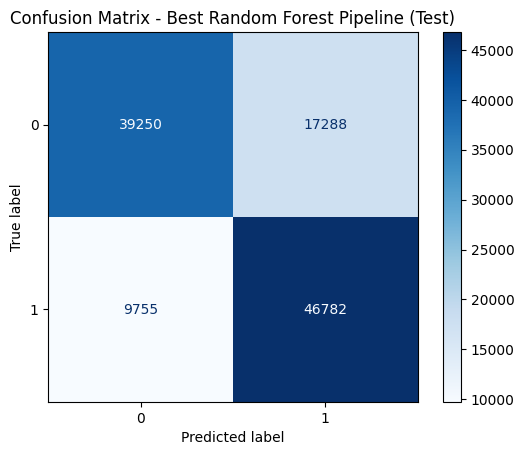

Accuracy (Test) : 0.7608401503426929
Precision (Test): 0.7301701264242235
Recall (Test)   : 0.8274581247678512
F1-score (Test) : 0.7757758670723921

Classification Report (Test):

              precision    recall  f1-score   support

           0       0.80      0.69      0.74     56538
           1       0.73      0.83      0.78     56537

    accuracy                           0.76    113075
   macro avg       0.77      0.76      0.76    113075
weighted avg       0.77      0.76      0.76    113075

ROC AUC (Test): 0.8405257449687517


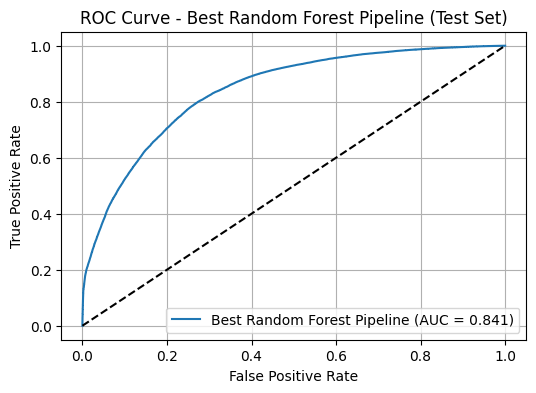

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# --- Evaluation on Test Set ---
print("\n--- Evaluating Best Random Forest Pipeline on Test Set ---")
# Predict on raw test data using the fitted pipeline
y_pred_test_best_rf_pipeline = best_rf_pipeline.predict(X_test_raw)
y_proba_test_best_rf_pipeline = best_rf_pipeline.predict_proba(X_test_raw)[:, 1]

# Confusion Matrix - Test
cm_test_best_rf_pipeline = confusion_matrix(y_test, y_pred_test_best_rf_pipeline, labels=[0, 1])
disp_test_best_rf_pipeline = ConfusionMatrixDisplay(confusion_matrix=cm_test_best_rf_pipeline, display_labels=[0, 1])
disp_test_best_rf_pipeline.plot(cmap='Blues')
plt.title('Confusion Matrix - Best Random Forest Pipeline (Test)')
plt.show()

# Metrics - Test
print("Accuracy (Test) :", accuracy_score(y_test, y_pred_test_best_rf_pipeline))
print("Precision (Test):", precision_score(y_test, y_pred_test_best_rf_pipeline))
print("Recall (Test)   :", recall_score(y_test, y_pred_test_best_rf_pipeline))
print("F1-score (Test) :", f1_score(y_test, y_pred_test_best_rf_pipeline))
print("\nClassification Report (Test):\n")
print(classification_report(y_test, y_pred_test_best_rf_pipeline))

# ROC AUC & Curve - Test
auc_test_best_rf_pipeline = roc_auc_score(y_test, y_proba_test_best_rf_pipeline)
print("ROC AUC (Test):", auc_test_best_rf_pipeline)
fpr_test_best_rf_pipeline, tpr_test_best_rf_pipeline, _ = roc_curve(y_test, y_proba_test_best_rf_pipeline)
plt.figure(figsize=(6, 4))
plt.plot(fpr_test_best_rf_pipeline, tpr_test_best_rf_pipeline, label=f'Best Random Forest Pipeline (AUC = {auc_test_best_rf_pipeline:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best Random Forest Pipeline (Test Set)')
plt.legend()
plt.grid()
plt.show()

# Feature Importance for Best XGBoost Model

XGBoost setelah dituning merupakan model yang paling baik karena memiliki nilai Area Under Curve paling tinggi yaitu 0.94 yang menunjukkan bahwa model mampu membedakan dengan sangat baik antara debitur yang akan membayar kembali kredit dan yang tidak. Selain itu, model ini juga memiliki nilai precision paling tinggi yaitu 0.95, yang menunjukkan bahwa hampir semua debitur yang diprediksi “akan gagal bayar” oleh model memang benar-benar berisiko gagal bayar.

## Data Test Preparation

Top 10 Feature Importances from Best XGBoost Model:


Feature  Importance
7      EDUCATION_LEVEL_Encoded    0.433621
4   REGION_POPULATION_RELATIVE    0.277783
6  REGION_RATING_CLIENT_W_CITY    0.129088
3                 CNT_CHILDREN    0.084702
5                   DAYS_BIRTH    0.027672
0              AVG_DAYS_CREDIT    0.019876
1                   AMT_CREDIT    0.014958
2             AMT_INCOME_TOTAL    0.012299

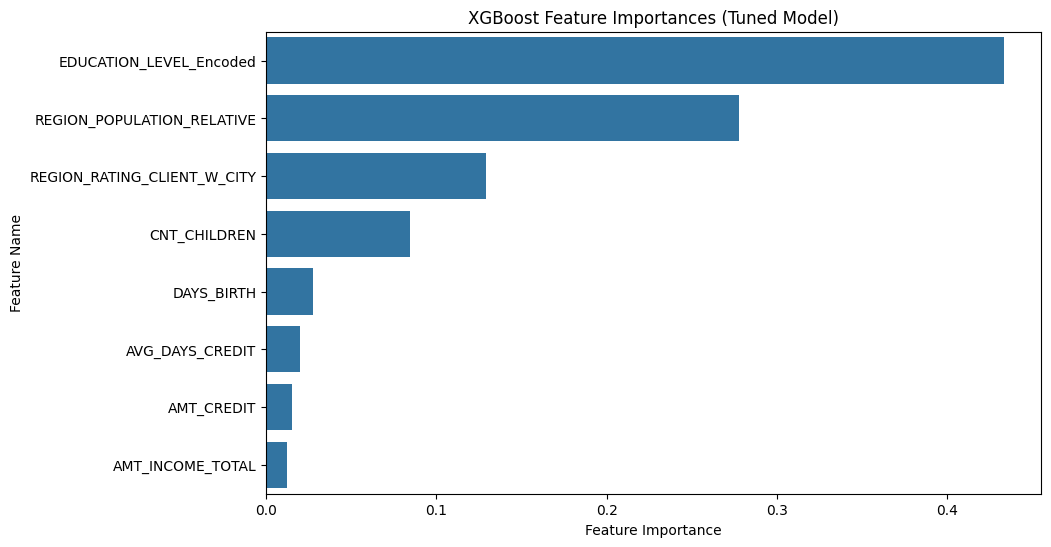

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances from the best XGBoost model
feature_importances = best_xgb_model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_names = X_train_raw.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Top 10 Feature Importances from Best XGBoost Model:")
display(importance_df.head(10))

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('XGBoost Feature Importances (Tuned Model)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.show()

Tingkatan pendidikan (pendidikan tinggi atau rendah) merupakan salah satu fitur yang paling memengaruhi tingkat keberhasilan pengembalian. Tingkatan pendidikan menyumbang faktor tertinggi terhadap faktor keberhasilan pengembalian kredit (40%) dibanding sebelumnya.

Pada eksplorasi awal kita mendapati bahwa tingkat pendidikan lebih tinggi memiliki resiko kredit macet yang lebih rendah sehingga Home Credit perlu lebih berhati-hati dalam meminjamkan hkredit kepada orang dengan pendidikan lebih rendah.

In [ ]:
test

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0          100001         Cash loans           F            N               Y   
1          100005         Cash loans           M            N               Y   
2          100013         Cash loans           M            Y               Y   
3          100028         Cash loans           F            N               Y   
4          100038         Cash loans           M            Y               N   
...           ...                ...         ...          ...             ...   
48739      456221         Cash loans           F            N               Y   
48740      456222         Cash loans           F            N               N   
48741      456223         Cash loans           F            Y               Y   
48742      456224         Cash loans           M            N               N   
48743      456250         Cash loans           F            Y               N   

       CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                 0          135000.0    568800.0      20560.5   
1                 0           99000.0    222768.0      17370.0   
2                 0          202500.0    663264.0      69777.0   
3                 2          315000.0   1575000.0      49018.5   
4                 1          180000.0    625500.0      32067.0   
...             ...               ...         ...          ...   
48739             0          121500.0    412560.0      17473.5   
48740             2          157500.0    622413.0      31909.5   
48741             1          202500.0    315000.0      33205.5   
48742             0          225000.0    450000.0      25128.0   
48743             0          135000.0    312768.0      24709.5   

       AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0             450000.0   Unaccompanied               Working   
1             180000.0   Unaccompanied               Working   
2             630000.0             NaN               Working   
3            1575000.0   Unaccompanied               Working   
4             625500.0   Unaccompanied               Working   
...                ...             ...                   ...   
48739         270000.0   Unaccompanied               Working   
48740         495000.0   Unaccompanied  Commercial associate   
48741         315000.0   Unaccompanied  Commercial associate   
48742         450000.0          Family  Commercial associate   
48743         270000.0   Unaccompanied               Working   

                 NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0                   Higher education            Married  House / apartment   
1      Secondary / secondary special            Married  House / apartment   
2                   Higher education            Married  House / apartment   
3      Secondary / secondary special            Married  House / apartment   
4      Secondary / secondary special            Married  House / apartment   
...                              ...                ...                ...   
48739  Secondary / secondary special              Widow  House / apartment   
48740  Secondary / secondary special            Married  House / apartment   
48741  Secondary / secondary special            Married  House / apartment   
48742               Higher education            Married  House / apartment   
48743  Secondary / secondary special            Married  House / apartment   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                        0.018850      -19241          -2329   
1                        0.035792      -18064          -4469   
2                        0.019101      -20038          -4458   
3                        0.026392      -13976          -1866   
4                        0.010032      -13040          -2191   
...                           ...         ...            ...   
48739                    0.002042      -19970          -5169   
48740                  

Sebelum implementasi model XGBoost, kita menyeleksi kolom test agar menghasilkan kolom-kolom yang sesuai

### Merge `bureau` data

In [ ]:
# Merge 'bureau' data with the 'test' DataFrame
test = pd.merge(test, bureau, on='SK_ID_CURR', how='left')

print("Shape of test after merging bureau:", test.shape)

Shape of test after merging bureau: (48744, 122)


### Add `EDUCATION_LEVEL` and `EDUCATION_LEVEL_Encoded`

In [ ]:
# Define the mapping function (re-define to ensure availability)
def map_education(x):
    if x in ['Academic degree', 'Higher education']:
        return 'Higher Education'
    else:
        return 'Lower Education'

# Apply the function to create EDUCATION_LEVEL
test['EDUCATION_LEVEL'] = test['NAME_EDUCATION_TYPE'].apply(map_education)

# Define the order for encoding (re-define to ensure availability)
education_order = {
    'Lower Education': 0,
    'Higher Education': 1
}

# Apply mapping to create EDUCATION_LEVEL_Encoded
test['EDUCATION_LEVEL_Encoded'] = test['EDUCATION_LEVEL'].map(education_order)

print("EDUCATION_LEVEL_Encoded created in test DataFrame.")
display(test[['NAME_EDUCATION_TYPE', 'EDUCATION_LEVEL', 'EDUCATION_LEVEL_Encoded']].head())

EDUCATION_LEVEL_Encoded created in test DataFrame.


NAME_EDUCATION_TYPE   EDUCATION_LEVEL  EDUCATION_LEVEL_Encoded
0               Higher education  Higher Education                        1
1  Secondary / secondary special   Lower Education                        0
2               Higher education  Higher Education                        1
3  Secondary / secondary special   Lower Education                        0
4  Secondary / secondary special   Lower Education                        0

### Handle `AVG_DAYS_CREDIT` Missing Values

In [ ]:
# Fill missing values in AVG_DAYS_CREDIT using the same logic as train
# We first need to check if AVG_DAYS_CREDIT has been introduced into the test set
# and then fill its NaN values with the minimum value observed in the test set's AVG_DAYS_CREDIT
if 'AVG_DAYS_CREDIT' in test.columns:
    # Create HAS_CREDIT_BUREAU as it was part of feature engineering initially, even if dropped later for X_res
    test['HAS_CREDIT_BUREAU'] = test['AVG_DAYS_CREDIT'].notna().astype(int)
    # Fill NaNs in AVG_DAYS_CREDIT with its minimum value in the test set
    # Use .copy() to avoid SettingWithCopyWarning
    test.loc[:, 'AVG_DAYS_CREDIT'] = test['AVG_DAYS_CREDIT'].fillna(test['AVG_DAYS_CREDIT'].min())
    print("AVG_DAYS_CREDIT NaNs filled and HAS_CREDIT_BUREAU created for test DataFrame.")
else:
    print("AVG_DAYS_CREDIT column not found in test DataFrame after merge. Please ensure merge was successful.")

display(test[['SK_ID_CURR', 'AVG_DAYS_CREDIT', 'HAS_CREDIT_BUREAU']].head())

AVG_DAYS_CREDIT NaNs filled and HAS_CREDIT_BUREAU created for test DataFrame.


SK_ID_CURR  AVG_DAYS_CREDIT  HAS_CREDIT_BUREAU
0      100001      -735.000000                  1
1      100005      -190.666667                  1
2      100013     -1737.500000                  1
3      100028     -1401.750000                  1
4      100038     -2921.000000                  0

### Select final features

In [ ]:
# Define the list of final features used in X_res
final_features = [
    'AVG_DAYS_CREDIT',
    'CNT_CHILDREN',
    'AMT_CREDIT',
    'AMT_INCOME_TOTAL',
    'DAYS_BIRTH',
    'REGION_POPULATION_RELATIVE',
    'REGION_RATING_CLIENT_W_CITY',
    'EDUCATION_LEVEL_Encoded'
]

# Create the final test feature set (X_test_final) by selecting only the final_features
X_test_final = test[final_features].copy()

print("Final test feature set (X_test_final) prepared.")
display(X_test_final.head())
print("Missing values in X_test_final:")
display(X_test_final.isnull().sum())

Final test feature set (X_test_final) prepared.


AVG_DAYS_CREDIT  CNT_CHILDREN  AMT_CREDIT  AMT_INCOME_TOTAL  DAYS_BIRTH  \
0      -735.000000             0    568800.0          135000.0      -19241   
1      -190.666667             0    222768.0           99000.0      -18064   
2     -1737.500000             0    663264.0          202500.0      -20038   
3     -1401.750000             2   1575000.0          315000.0      -13976   
4     -2921.000000             1    625500.0          180000.0      -13040   

   REGION_POPULATION_RELATIVE  REGION_RATING_CLIENT_W_CITY  \
0                    0.018850                            2   
1                    0.035792                            2   
2                    0.019101                            2   
3                    0.026392                            2   
4                    0.010032                            2   

   EDUCATION_LEVEL_Encoded  
0                        1  
1                        0  
2                        1  
3                        0  
4                        0

Missing values in X_test_final:


AVG_DAYS_CREDIT                0
CNT_CHILDREN                   0
AMT_CREDIT                     0
AMT_INCOME_TOTAL               0
DAYS_BIRTH                     0
REGION_POPULATION_RELATIVE     0
REGION_RATING_CLIENT_W_CITY    0
EDUCATION_LEVEL_Encoded        0
dtype: int64

### Predict on Test Data using Best XGBoost Model and Generate Submission

In [ ]:
from sklearn.preprocessing import RobustScaler

# Ensure X_test_final has the same column order as X_train_raw
# Get the column names from X_train_raw to ensure correct order
feature_order = X_train_raw.columns.tolist()
X_test_final = X_test_final[feature_order]

# Predict probabilities using the best XGBoost pipeline (which includes scaling)
predictions = best_xgb_pipeline.predict_proba(X_test_final)[:, 1]

# Create a submission DataFrame
submission = pd.DataFrame({'SK_ID_CURR': test['SK_ID_CURR'], 'TARGET': predictions})

# Display the first few rows of the submission file
print("Submission file generated:")
submission

# Optionally, save the submission file to a CSV
submission.to_csv('submission_xgboost_tuned.csv', index=False)
print("Submission file saved as 'submission_xgboost_tuned.csv'")

Submission file generated:
Submission file saved as 'submission_xgboost_tuned.csv'


In [ ]:
submission

SK_ID_CURR    TARGET
0          100001  0.102180
1          100005  0.109621
2          100013  0.089877
3          100028  0.032950
4          100038  0.264118
...           ...       ...
48739      456221  0.108678
48740      456222  0.092088
48741      456223  0.196513
48742      456224  0.120738
48743      456250  0.394441

[48744 rows x 2 columns]

In [ ]:
# Hitung jumlah SK_ID_CURR dengan TARGET kurang dari 0.5
count_less_than_0_5 = submission[submission['TARGET'] < 0.5].shape[0]

# Hitung jumlah SK_ID_CURR dengan TARGET lebih dari atau sama dengan 0.5
count_greater_than_0_5 = submission[submission['TARGET'] >= 0.5].shape[0]

print(f"Jumlah SK_ID_CURR dengan TARGET < 0.5: {count_less_than_0_5}")
print(f"Jumlah SK_ID_CURR dengan TARGET >= 0.5: {count_greater_than_0_5}")

Jumlah SK_ID_CURR dengan TARGET < 0.5: 46415
Jumlah SK_ID_CURR dengan TARGET >= 0.5: 2329


Nilai threshold 0,5 umumnya digunakan sebagai batas keputusan probabilitas (ya/tidak). Namun, threshold ini dapat disesuaikan sesuai dengan kebijakan tim internal perusahaan yang bersangkutan.

# Machine Learning Model Performance Comparison

Dalam menentukan model machine learning paling baik, kita memilih metrics AUC dan ROC. AUC penting karena merepresentasikan kemampuan untuk membedakan peminjam berisiko (1) dan tidak berisiko. Dengan AUC, kita bisa melihat konsistensi model dalam mengidentifikasi pola-pola risiko secara menyeluruh tidak hanya satu keputusan saja (target 0 atau target 1).

Recall digunakan karena fokus utama kita adalah mengidentifiasi kredit macet. Recall mengkalkulasi seberapa banyak kasus kredit macet yang berhasil diprediksi benar oleh model. Semakin tinggi recall maka semakin kecil risiko peminjam bermasalah untuk diloloskan.

## Area Under Curve

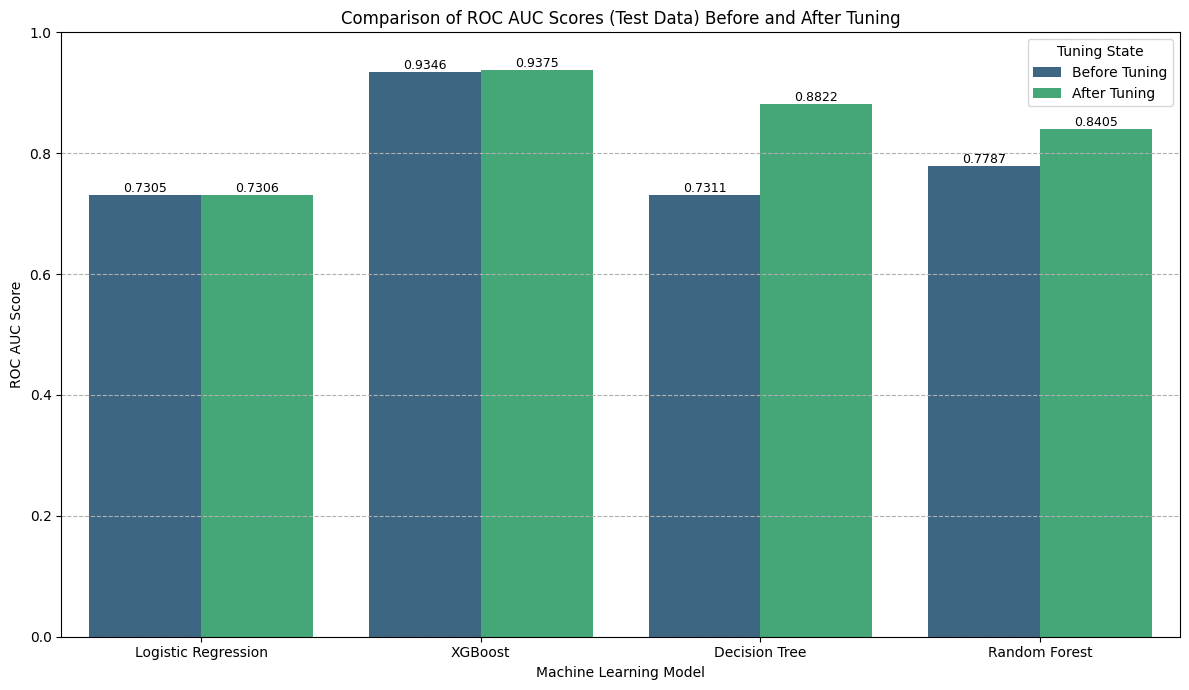

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Collected AUC scores from test set evaluations
# Untuned Pipelines
auc_lr_untuned = 0.730541343227174  # from cell iipp4SCyYIb2
auc_xgb_untuned = 0.9346163300902757 # from cell 5b06d436
auc_dt_untuned = 0.7310870202344446 # from cell 0f6d141c
auc_rf_untuned = 0.7786987468743619 # from cell 564bd421

# Tuned Pipelines (from GridSearchCV best_estimator_ evaluated on test set)
auc_lr_tuned = 0.7305815342003881 # from cell xfmkXwwPyjQ6
auc_xgb_tuned = 0.9375066198024213 # from cell crwetoZl1nOM
auc_dt_tuned = 0.8821860270520208 # from cell Z_spxDfz-Cs6
auc_rf_tuned = 0.8405257449687517 # from cell raOrOXtM_mix

# Create a DataFrame for plotting
metrics_data = pd.DataFrame({
    'Model': [
        'Logistic Regression', 'Logistic Regression',
        'XGBoost', 'XGBoost',
        'Decision Tree', 'Decision Tree',
        'Random Forest', 'Random Forest'
    ],
    'Tuning': [
        'Before Tuning', 'After Tuning',
        'Before Tuning', 'After Tuning',
        'Before Tuning', 'After Tuning',
        'Before Tuning', 'After Tuning'
    ],
    'AUC': [
        auc_lr_untuned, auc_lr_tuned,
        auc_xgb_untuned, auc_xgb_tuned,
        auc_dt_untuned, auc_dt_tuned,
        auc_rf_untuned, auc_rf_tuned
    ]
})

# Convert AUC to numeric, coercing None to NaN for plotting
metrics_data['AUC'] = pd.to_numeric(metrics_data['AUC'], errors='coerce')

# Plotting
plt.figure(figsize=(12, 7))
sns.barplot(x='Model', y='AUC', hue='Tuning', data=metrics_data, palette='viridis')

# Add AUC values on top of the bars
for container in plt.gca().containers:
    for bar in container:
        height = bar.get_height()
        if pd.notna(height):
            plt.text(bar.get_x() + bar.get_width() / 2, height,
                     f'{height:.4f}', ha='center', va='bottom', fontsize=9)

plt.title('Comparison of ROC AUC Scores (Test Data) Before and After Tuning')
plt.xlabel('Machine Learning Model')
plt.ylabel('ROC AUC Score')
plt.ylim(0, 1) # AUC scores are between 0 and 1
plt.legend(title='Tuning State')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## Recall

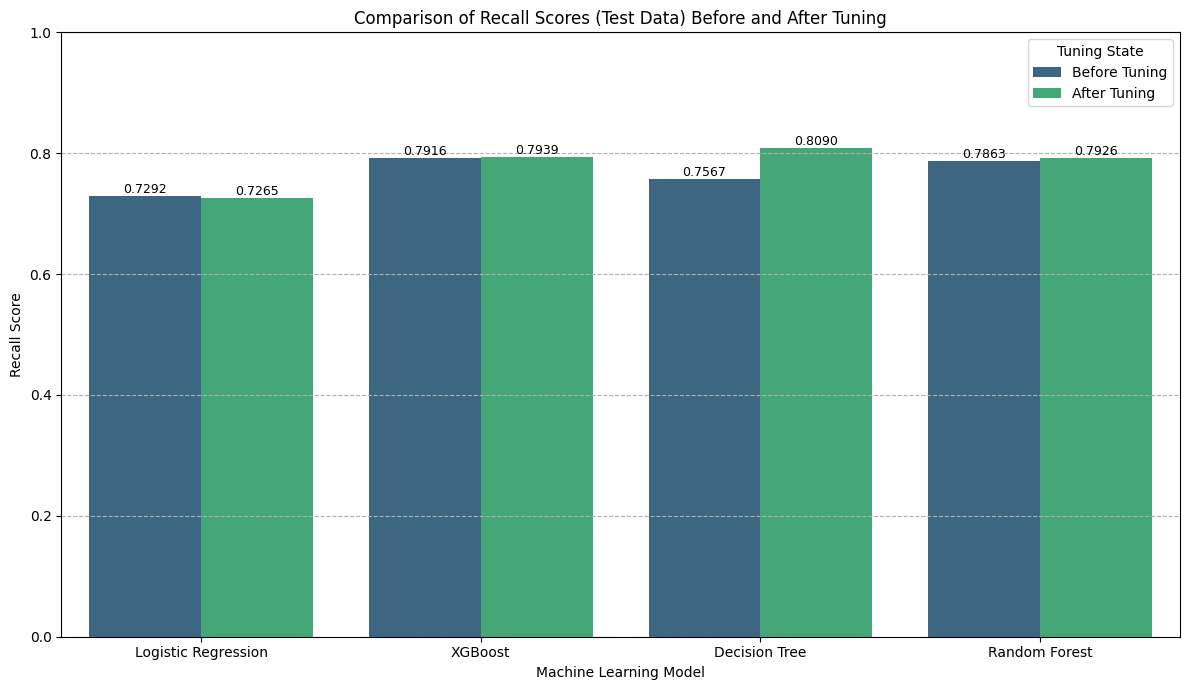

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Collected Recall scores from test set evaluations
# Untuned Pipelines
recall_lr_untuned = 0.7291861966499814
recall_xgb_untuned = 0.7916231848170224
recall_dt_untuned = 0.7567256840653024
recall_rf_untuned = 0.786316925199427

# Tuned Pipelines
recall_lr_tuned = 0.7265330668411837
recall_xgb_tuned = 0.7939402515167059
recall_dt_tuned = 0.8089923412986186
recall_rf_tuned = 0.7925829670697228

# Create a DataFrame for plotting
metrics_data_recall = pd.DataFrame({
    'Model': [
        'Logistic Regression', 'Logistic Regression',
        'XGBoost', 'XGBoost',
        'Decision Tree', 'Decision Tree',
        'Random Forest', 'Random Forest'
    ],
    'Tuning': [
        'Before Tuning', 'After Tuning',
        'Before Tuning', 'After Tuning',
        'Before Tuning', 'After Tuning',
        'Before Tuning', 'After Tuning'
    ],
    'Recall': [
        recall_lr_untuned, recall_lr_tuned,
        recall_xgb_untuned, recall_xgb_tuned,
        recall_dt_untuned, recall_dt_tuned,
        recall_rf_untuned, recall_rf_tuned
    ]
})

# Convert Recall to numeric, coercing None to NaN for plotting
metrics_data_recall['Recall'] = pd.to_numeric(metrics_data_recall['Recall'], errors='coerce')

# Plotting
plt.figure(figsize=(12, 7))
sns.barplot(x='Model', y='Recall', hue='Tuning', data=metrics_data_recall, palette='viridis')

# Add Recall values on top of the bars
for container in plt.gca().containers:
    for bar in container:
        height = bar.get_height()
        if pd.notna(height):
            plt.text(bar.get_x() + bar.get_width() / 2, height,
                     f'{height:.4f}', ha='center', va='bottom', fontsize=9)

plt.title('Comparison of Recall Scores (Test Data) Before and After Tuning')
plt.xlabel('Machine Learning Model')
plt.ylabel('Recall Score')
plt.ylim(0, 1) # Recall scores are between 0 and 1
plt.legend(title='Tuning State')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

Random forest lebih sensitif terhadap kelas gagal, dengan nilai AUC 0.82 dan 0.79 untuk XGBoost, tetapi XGBoost secara keseluruhan lebih unggul dalam membedakan kedua kelas, dengan recall 0.93 dan 0.84 untuk Random Forest.

# Top 2 Insight

Education level (Higher Education: Sarjana hingga lulusan Ph.D., atau Lower Education Level: SMP ke bawah) terbukti menjadi faktor yang cukup memengaruhi keberhasilan pengembalian kredit jika dilihat dari nilai feature importance pada model XGBoost setelah dituning. Selain itu, occupation_type juga masih berkaitan dengan tingkat pendidikan, di mana kelompok dengan higher education menunjukkan persentase pengembalian kredit yang lebih tinggi. Profesi-profesi yang hampir sepenuhnya diisi oleh individu berpendidikan tinggi pun cenderung memiliki tingkat pengembalian kredit yang lebih baik.

## OCCUPATION_TYPE

In [ ]:
# Repaid loans percentage
repaid_loans_percentage = (
    result_occupation_type_target
    .xs(0, level='TARGET')[['count', 'percentage']]
    .reset_index()
)
repaid_loans_percentage = repaid_loans_percentage.rename(
    columns={'percentage': 'Repaid_Percentage'}
)

# Bulatkan 2 angka di belakang koma
repaid_loans_percentage['Repaid_Percentage'] = repaid_loans_percentage['Repaid_Percentage'].round(2)


# Approved loans percentage
approved_loans_percentage = (
    result_occupation_type_status
    .xs('Approved', level='NAME_CONTRACT_STATUS')[['count', 'percentage']]
    .reset_index()
)
approved_loans_percentage = approved_loans_percentage.rename(
    columns={'percentage': 'Approved_Percentage'}
)

# Bulatkan 2 angka di belakang koma
approved_loans_percentage['Approved_Percentage'] = approved_loans_percentage['Approved_Percentage'].round(2)


# Display
print("Repaid loans percentage by occupation type:")
display(repaid_loans_percentage.head())

print("\nApproved loans percentage by occupation type:")
display(approved_loans_percentage.head())


Repaid loans percentage by occupation type:


OCCUPATION_TYPE  count  Repaid_Percentage
0     Accountants   9339              95.17
1  Cleaning staff   4206              90.39
2   Cooking staff   5325              89.56
3      Core staff  25832              93.70
4         Drivers  16496              88.67


Approved loans percentage by occupation type:


OCCUPATION_TYPE  count  Approved_Percentage
0     Accountants  26957                64.25
1  Cleaning staff  14888                61.20
2   Cooking staff  17925                62.40
3      Core staff  75415                63.76
4         Drivers  52300                62.21

In [ ]:
merged_occupation_data = pd.merge(repaid_loans_percentage, approved_loans_percentage, on='OCCUPATION_TYPE', how='inner')

print("Merged data of repaid and approved loans percentage by occupation type:")
display(merged_occupation_data.head())

Merged data of repaid and approved loans percentage by occupation type:


OCCUPATION_TYPE  count_x  Repaid_Percentage  count_y  Approved_Percentage
0     Accountants     9339              95.17    26957                64.25
1  Cleaning staff     4206              90.39    14888                61.20
2   Cooking staff     5325              89.56    17925                62.40
3      Core staff    25832              93.70    75415                63.76
4         Drivers    16496              88.67    52300                62.21

In [ ]:
# Hitung Difference_Percentage
merged_occupation_data['Difference_Percentage'] = (
    merged_occupation_data['Repaid_Percentage'] - merged_occupation_data['Approved_Percentage']
)

# Urutkan berdasarkan Difference_Percentage (descending) dan reset index
merged_occupation_data_sorted = merged_occupation_data.sort_values(
    by='Difference_Percentage',
    ascending=False
).reset_index(drop=True)  # drop=True supaya index lama hilang

# Tampilkan hasil
print("Merged data with difference percentage (sorted & reset index):")
display(merged_occupation_data_sorted)

Merged data with difference percentage (sorted & reset index):


OCCUPATION_TYPE  count_x  Repaid_Percentage  count_y  \
0                HR staff      527              93.61     1404   
1                Managers    20043              93.79    58371   
2   Private service staff     2477              93.40     7498   
3           Realty agents      692              92.14     2161   
4             Accountants     9339              95.17    26957   
5              Core staff    25832              93.70    75415   
6          Medicine staff     7965              93.30    25574   
7   High skill tech staff    10679              93.84    31306   
8          Cleaning staff     4206              90.39    14888   
9             Sales staff    29010              90.37    93060   
10            Secretaries     1213              92.95     3732   
11          Cooking staff     5325              89.56    17925   
12         Security staff     5999              89.26    19822   
13                Drivers    16496              88.67    52300   
14               IT staff      492              93.54     1148   
15               Laborers    49348              89.42   159468   
16   Waiters/barmen staff     1196              88.72     3865   
17     Low-skill Laborers     1734              82.85     5686   

    Approved_Percentage  Difference_Percentage  
0                 60.70                  32.91  
1                 61.48                  32.31  
2                 61.27                  32.13  
3                 60.98                  31.16  
4                 64.25                  30.92  
5                 63.76                  29.94  
6                 63.94                  29.36  
7                 64.57                  29.27  
8                 61.20                  29.19  
9                 61.48                  28.89  
10                65.04                  27.91  
11                62.40                  27.16  
12                62.53                  26.73  
13                62.21                  26.46  
14                67.41                  26.13  
15                63.46                  25.96  
16                63.03                  25.69  
17                61.01                  21.84

In [ ]:
# Save the DataFrame to a CSV file
merged_occupation_data_sorted.to_csv('merged_occupation_data_sorted.csv', index=False)
print("merged_occupation_data.csv has been saved.")

merged_occupation_data.csv has been saved.


/tmp/ipython-input-1207955953.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Difference_Percentage', y='OCCUPATION_TYPE', data=merged_occupation_data.sort_values(by='Difference_Percentage', ascending=False), palette='viridis')


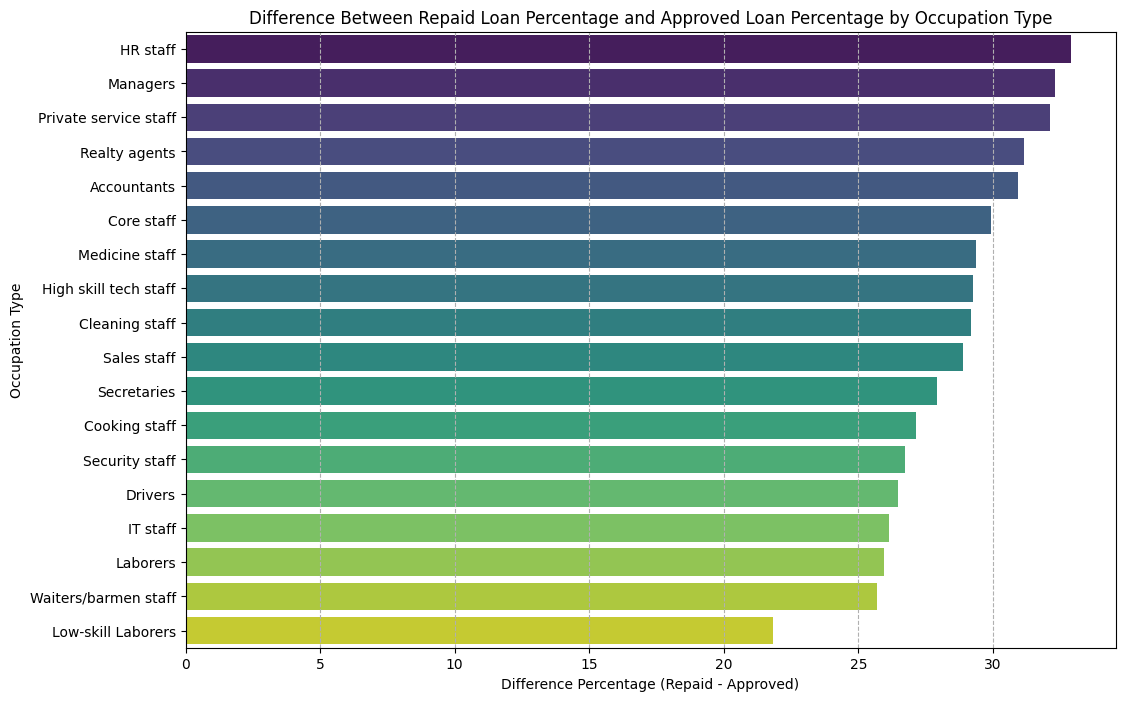

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Difference_Percentage', y='OCCUPATION_TYPE', data=merged_occupation_data.sort_values(by='Difference_Percentage', ascending=False), palette='viridis')
plt.title('Difference Between Repaid Loan Percentage and Approved Loan Percentage by Occupation Type')
plt.xlabel('Difference Percentage (Repaid - Approved)')
plt.ylabel('Occupation Type')
plt.grid(axis='x', linestyle='--')
plt.show()

/tmp/ipython-input-2102362554.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Difference_Percentage', y='OCCUPATION_TYPE', data=top_10_diff, palette='viridis')


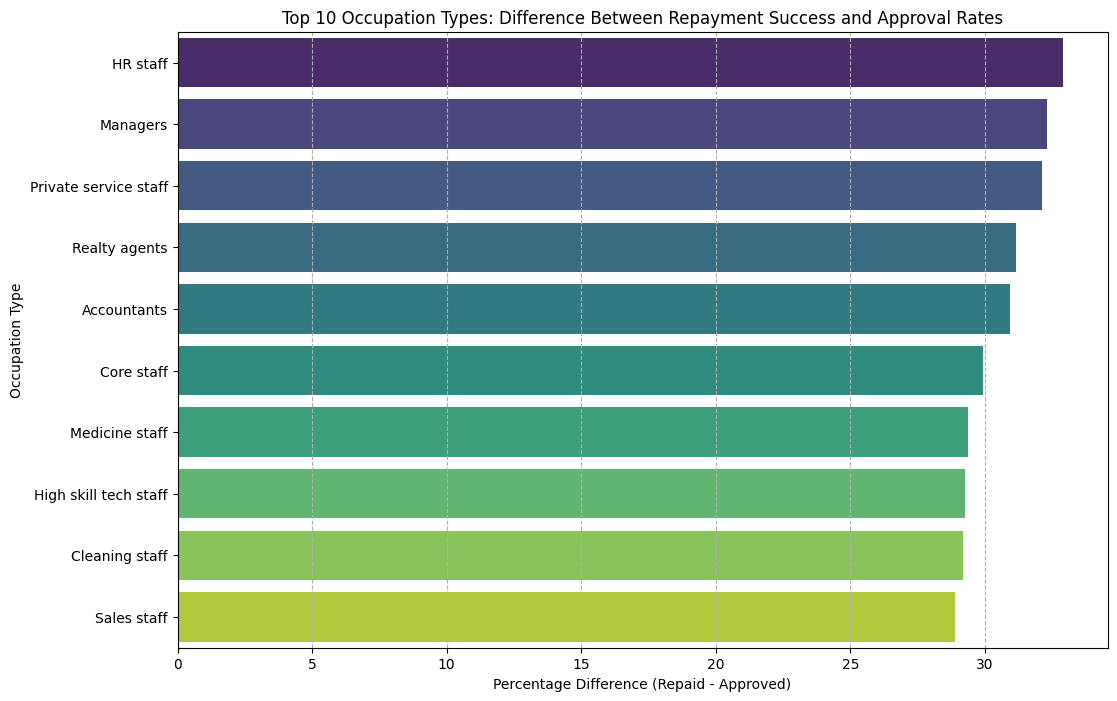

In [ ]:
top_10_diff = merged_occupation_data.sort_values(by='Difference_Percentage', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Difference_Percentage', y='OCCUPATION_TYPE', data=top_10_diff, palette='viridis')
plt.title('Top 10 Occupation Types: Difference Between Repayment Success and Approval Rates')
plt.xlabel('Percentage Difference (Repaid - Approved)')
plt.ylabel('Occupation Type')
plt.grid(axis='x', linestyle='--')
plt.show()

In [ ]:
sorted_occupation_data = merged_occupation_data.sort_values(
    by='Difference_Percentage', ascending=False
)

# Bulatkan 2 angka desimal
sorted_occupation_data[['Repaid_Percentage', 'Approved_Percentage', 'Difference_Percentage']] = \
    sorted_occupation_data[['Repaid_Percentage', 'Approved_Percentage', 'Difference_Percentage']].round(2)

display(sorted_occupation_data[['OCCUPATION_TYPE',
                                'Repaid_Percentage',
                                'Approved_Percentage',
                                'Difference_Percentage']])

OCCUPATION_TYPE  Repaid_Percentage  Approved_Percentage  \
5                HR staff              93.61                60.70   
10               Managers              93.79                61.48   
12  Private service staff              93.40                61.27   
13          Realty agents              92.14                60.98   
0             Accountants              95.17                64.25   
3              Core staff              93.70                63.76   
11         Medicine staff              93.30                63.94   
6   High skill tech staff              93.84                64.57   
1          Cleaning staff              90.39                61.20   
14            Sales staff              90.37                61.48   
15            Secretaries              92.95                65.04   
2           Cooking staff              89.56                62.40   
16         Security staff              89.26                62.53   
4                 Drivers              88.67                62.21   
7                IT staff              93.54                67.41   
8                Laborers              89.42                63.46   
17   Waiters/barmen staff              88.72                63.03   
9      Low-skill Laborers              82.85                61.01   

    Difference_Percentage  
5                   32.91  
10                  32.31  
12                  32.13  
13                  31.16  
0                   30.92  
3                   29.94  
11                  29.36  
6                   29.27  
1                   29.19  
14                  28.89  
15                  27.91  
2                   27.16  
16                  26.73  
4                   26.46  
7                   26.13  
8                   25.96  
17                  25.69  
9                   21.84

## EDUCATION_TYPE


In [ ]:
repaid_education_percentage = result_education_type_target.loc[(slice(None), 0), :].reset_index()
repaid_education_percentage = repaid_education_percentage.drop('TARGET', axis=1)
repaid_education_percentage = repaid_education_percentage.rename(columns={'percentage': 'Repaid_Percentage'})

print("Repaid loans percentage by education type:")
display(repaid_education_percentage.head())

Repaid loans percentage by education type:


NAME_EDUCATION_TYPE   count  Repaid_Percentage
0                Academic degree     161          98.170732
1               Higher education   70854          94.644885
2              Incomplete higher    9405          91.515034
3                Lower secondary    3399          89.072327
4  Secondary / secondary special  198867          91.060071

In [ ]:
approved_education_percentage = result_education_type_ncs.loc[(slice(None), 'Approved'), :].reset_index()
approved_education_percentage = approved_education_percentage.drop('NAME_CONTRACT_STATUS', axis=1)
approved_education_percentage = approved_education_percentage.rename(columns={'percentage': 'Approved_Percentage'})

print("Approved loans percentage by education type:")
display(approved_education_percentage.head())

Approved loans percentage by education type:


NAME_EDUCATION_TYPE   count  Approved_Percentage
0                Academic degree     418            72.193437
1               Higher education  195002            62.331826
2              Incomplete higher   27676            61.215191
3                Lower secondary   10929            63.673969
4  Secondary / secondary special  652074            62.826163

In [ ]:
merged_education_data = pd.merge(repaid_education_percentage, approved_education_percentage, on='NAME_EDUCATION_TYPE', how='inner')

print("Merged data of repaid and approved loans percentage by education type:")
display(merged_education_data.head())

Merged data of repaid and approved loans percentage by education type:


NAME_EDUCATION_TYPE  count_x  Repaid_Percentage  count_y  \
0                Academic degree      161          98.170732      418   
1               Higher education    70854          94.644885   195002   
2              Incomplete higher     9405          91.515034    27676   
3                Lower secondary     3399          89.072327    10929   
4  Secondary / secondary special   198867          91.060071   652074   

   Approved_Percentage  
0            72.193437  
1            62.331826  
2            61.215191  
3            63.673969  
4            62.826163

In [ ]:
# Setelah menghitung Difference_Percentage
merged_education_data['Difference_Percentage'] = (
    merged_education_data['Repaid_Percentage']
    - merged_education_data['Approved_Percentage']
)

# Bulatkan kolom persentase ke 2 decimal
merged_education_data[['Repaid_Percentage', 'Approved_Percentage', 'Difference_Percentage']] = \
    merged_education_data[['Repaid_Percentage', 'Approved_Percentage', 'Difference_Percentage']].round(2)

# Urutkan berdasarkan Difference_Percentage
merged_education_data_sorted = merged_education_data.sort_values(
    by='Difference_Percentage', ascending=False
)

print("Merged data with difference percentage for education type (sorted & rounded):")
display(merged_education_data_sorted)

Merged data with difference percentage for education type (sorted & rounded):


NAME_EDUCATION_TYPE  count_x  Repaid_Percentage  count_y  \
1               Higher education    70854              94.64   195002   
2              Incomplete higher     9405              91.52    27676   
4  Secondary / secondary special   198867              91.06   652074   
0                Academic degree      161              98.17      418   
3                Lower secondary     3399              89.07    10929   

   Approved_Percentage  Difference_Percentage  
1                62.33                  32.31  
2                61.22                  30.30  
4                62.83                  28.23  
0                72.19                  25.98  
3                63.67                  25.40

In [ ]:
# Simpan ke file CSV
merged_education_data_sorted.to_csv('merged_education_data.csv', index=False)

/tmp/ipython-input-1928363503.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Difference_Percentage', y='NAME_EDUCATION_TYPE', data=merged_education_data.sort_values(by='Difference_Percentage', ascending=False), palette='viridis')


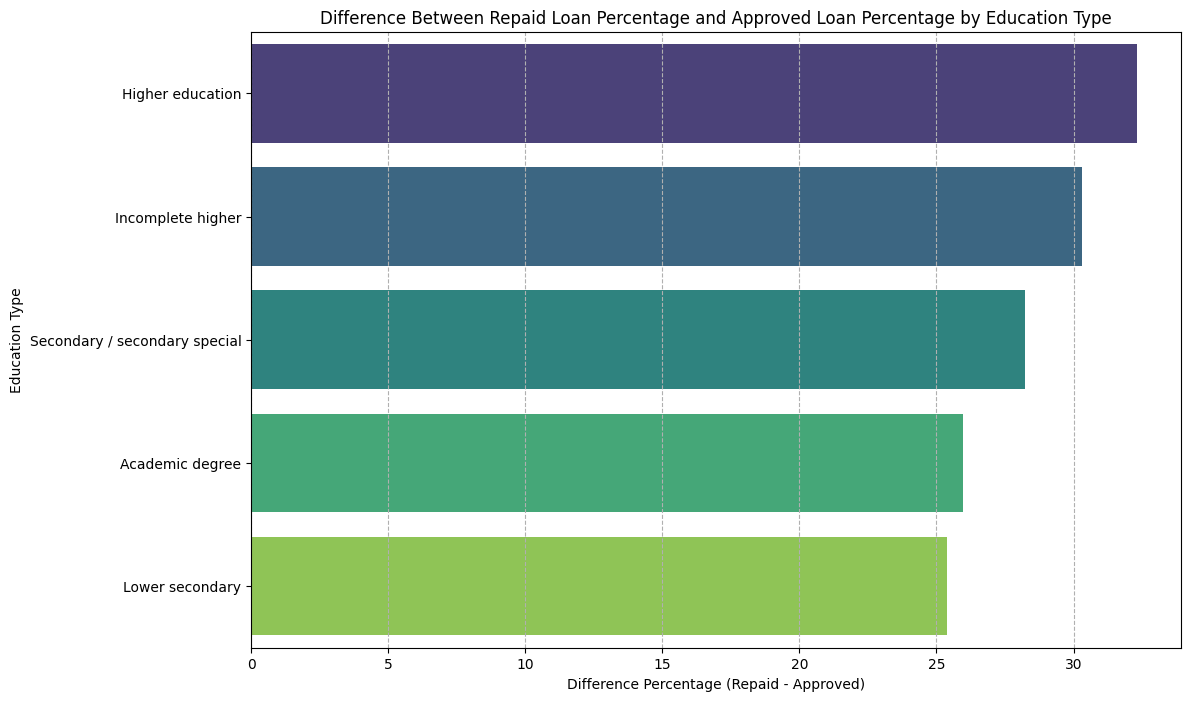

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Difference_Percentage', y='NAME_EDUCATION_TYPE', data=merged_education_data.sort_values(by='Difference_Percentage', ascending=False), palette='viridis')
plt.title('Difference Between Repaid Loan Percentage and Approved Loan Percentage by Education Type')
plt.xlabel('Difference Percentage (Repaid - Approved)')
plt.ylabel('Education Type')
plt.grid(axis='x', linestyle='--')
plt.show()

# Rekomendasi

1. Untuk meningkatkan kemudahan proses persetujuan, pendekatannya fokus pada percepatan dan otomatisasi. Proses fast auto-approve bisa diterapkan selama tidak ada masalah pada histori kredit dan probability return pengguna tetap tinggi. Selain itu, menawarkan pinjaman kedua secara otomatis kepada peminjam yang terbukti lancar dalam 3–6 bulan pertama dapat membantu mendorong retensi serta meningkatkan performa portofolio. Dengan implementasi ini, target keberhasilan yang ingin dicapai mencakup peningkatan return rate sebesar 5% dalam satu tahun serta pemangkasan waktu proses persetujuan hingga 20–30%.

2. Sementara itu, untuk mengurangi angka cancel atau unused credit, pendekatan lebih diarahkan pada penyesuaian produk dan pemahaman perilaku pengguna. Penetapan bunga yang lebih rendah—misalnya 0.3–0.5%—bagi segmen HR, Manager, serta lulusan Sarjana dan Magister, atau bagi pengguna dengan histori kredit baik, dapat menjadi insentif yang efektif. Ditambah lagi, pelaksanaan customer insight survey kepada peminjam Home Credit akan membantu mengidentifikasi faktor penyebab keputusan pembatalan atau ketidakgunaan kredit. Target KPI yang ingin dicapai adalah tingkat partisipasi survey minimal 50% dalam enam bulan serta penurunan cancel/unused rate sebesar 5% dalam satu tahun.